In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
from scipy.stats import norm
from astroML.plotting import scatter_contour
import seaborn as sns
import astropy
from astropy.io import fits
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.coordinates import SkyCoord
cosmo = FlatLambdaCDM(H0=100. * u.km / u.s / u.Mpc, Om0=0.31)
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec
from IPython.display import display, Math
import corner
import getdist.plots as gdplt
import getdist.mcsamples
from getdist import MCSamples, plots
import pvhub
c = 299792.458

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
fuji_pv = pd.read_csv("DESI_FP_logdists_fiducial.csv")
fuji_pv

#fibermap_targetid  fibermap_i        ra_1      dec_1  \
0      39628417112478213         400  192.260477  26.893112   
1      39628417133447721         426  193.579225  27.068031   
2      39627769709071900         191  184.913600  -0.750861   
3      39633076111803113          63  119.188267  39.927879   
4      39628422523128777         203  193.922076  27.250763   
...                  ...         ...         ...        ...   
4186   39632986789905375         570  252.485796  35.198279   
4187   39627652587330772          44   36.125245  -5.566223   
4188   39627628545578443          30   36.097224  -6.412998   
4189   39633307725466372         337  173.525018  53.919783   
4190   39627586577372913         174   35.756452  -8.314618   

               targetid    id  healpix survey program         targetid.1  ...  \
0     39628417112478213  1301    28148    sv1  bright  39628417112478213  ...   
1     39628417133447721  1304    28149    sv1  bright  39628417133447721  ...   
2     39627769709071900  1516    26254    sv1  bright  39627769709071900  ...   
3     39633076111803113   996     6541    sv1  bright  39633076111803113  ...   
4     39628422523128777  1304    28149    sv1  bright  39628422523128777  ...   
...                 ...   ...      ...    ...     ...                ...  ...   
4186  39632986789905375  3347     9429    sv3  bright  39632986789905375  ...   
4187  39627652587330772   933    17683    sv1  bright  39627652587330772  ...   
4188  39627628545578443   922    17680    sv1  bright  39627628545578443  ...   
4189  39633307725466372  2657     5976    sv2  bright  39633307725466372  ...   
4190  39627586577372913  1187    36782    sv1  bright  39627586577372913  ...   

            ei         s        es   absmag_r        Sn   logdist  \
0     0.000279  2.154577  0.004325 -19.925132  1.000000  0.040823   
1     0.000122  2.422567  0.002484 -22.520143  1.000000  0.184259   
2     0.000486  2.177125  0.004492 -19.991908  1.000000 -0.100140   
3     0.000241  2.298011  0.001769 -20.724064  1.000000  0.002332   
4     0.000123  2.436203  0.002673 -20.874334  1.000000 -0.065115   
...        ...       ...       ...        ...       ...       ...   
4186  0.003336  1.892140  0.148222 -19.633656  1.000000  0.023497   
4187  0.000611  2.048037  0.049742 -19.271366  0.685189 -0.052879   
4188  0.000820  2.072414  0.050651 -19.378259  0.793512 -0.155076   
4189  0.002153  2.167417  0.160353 -19.978571  1.000000 -0.239747   
4190  0.000316  2.178451  0.046802 -20.857757  1.000000  0.039694   

      logdist_err  logdist_alpha            pv         pverr  
0        0.100876      -0.211552    715.900844   1769.034190  
1        0.100492       0.135647   3630.261093   1979.890546  
2        0.101378      -0.438164  -2132.960665   2159.343503  
3        0.104726       0.319311     20.932642    939.867093  
4        0.101095      -0.311079  -1099.996339   1707.819657  
...           ...            ...           ...           ...  
4186     0.184570      -0.998433   1567.827904  12315.564270  
4187     0.114779      -0.573969  -1610.026917   3494.709956  
4188     0.118115      -0.618295  -5257.334901   4004.290864  
4189     0.200601      -1.013735 -11674.944029   9768.632841  
4190     0.113165      -0.561532   1452.005615   4139.562548  

[4191 rows x 117 columns]

In [4]:
pv = pvhub.calculate_pv(np.array(fuji_pv['ra_1']), np.array(fuji_pv['dec_1']), fuji_pv['zcmb'])
zp = pv/c
zhd = ((1.+fuji_pv['zcmb'])/(1.+zp)) - 1.
fuji_pv['zp'] = zp
fuji_pv['zhd'] = zhd 

No model specified with choose_model(); will load default model.
Loading model 0 (2M++_SDSS)


In [5]:
fuji_pv

#fibermap_targetid  fibermap_i        ra_1      dec_1  \
0      39628417112478213         400  192.260477  26.893112   
1      39628417133447721         426  193.579225  27.068031   
2      39627769709071900         191  184.913600  -0.750861   
3      39633076111803113          63  119.188267  39.927879   
4      39628422523128777         203  193.922076  27.250763   
...                  ...         ...         ...        ...   
4186   39632986789905375         570  252.485796  35.198279   
4187   39627652587330772          44   36.125245  -5.566223   
4188   39627628545578443          30   36.097224  -6.412998   
4189   39633307725466372         337  173.525018  53.919783   
4190   39627586577372913         174   35.756452  -8.314618   

               targetid    id  healpix survey program         targetid.1  ...  \
0     39628417112478213  1301    28148    sv1  bright  39628417112478213  ...   
1     39628417133447721  1304    28149    sv1  bright  39628417133447721  ...   
2     39627769709071900  1516    26254    sv1  bright  39627769709071900  ...   
3     39633076111803113   996     6541    sv1  bright  39633076111803113  ...   
4     39628422523128777  1304    28149    sv1  bright  39628422523128777  ...   
...                 ...   ...      ...    ...     ...                ...  ...   
4186  39632986789905375  3347     9429    sv3  bright  39632986789905375  ...   
4187  39627652587330772   933    17683    sv1  bright  39627652587330772  ...   
4188  39627628545578443   922    17680    sv1  bright  39627628545578443  ...   
4189  39633307725466372  2657     5976    sv2  bright  39633307725466372  ...   
4190  39627586577372913  1187    36782    sv1  bright  39627586577372913  ...   

            es   absmag_r        Sn   logdist  logdist_err  logdist_alpha  \
0     0.004325 -19.925132  1.000000  0.040823     0.100876      -0.211552   
1     0.002484 -22.520143  1.000000  0.184259     0.100492       0.135647   
2     0.004492 -19.991908  1.000000 -0.100140     0.101378      -0.438164   
3     0.001769 -20.724064  1.000000  0.002332     0.104726       0.319311   
4     0.002673 -20.874334  1.000000 -0.065115     0.101095      -0.311079   
...        ...        ...       ...       ...          ...            ...   
4186  0.148222 -19.633656  1.000000  0.023497     0.184570      -0.998433   
4187  0.049742 -19.271366  0.685189 -0.052879     0.114779      -0.573969   
4188  0.050651 -19.378259  0.793512 -0.155076     0.118115      -0.618295   
4189  0.160353 -19.978571  1.000000 -0.239747     0.200601      -1.013735   
4190  0.046802 -20.857757  1.000000  0.039694     0.113165      -0.561532   

                pv         pverr        zp       zhd  
0       715.900844   1769.034190 -0.001541  0.027153  
1      3630.261093   1979.890546 -0.001604  0.030405  
2     -2132.960665   2159.343503 -0.000654  0.031779  
3        20.932642    939.867093 -0.000137  0.013181  
4     -1099.996339   1707.819657 -0.000073  0.024700  
...            ...           ...       ...       ...  
4186   1567.827904  12315.564270 -0.000143  0.099817  
4187  -1610.026917   3494.709956 -0.000894  0.045573  
4188  -5257.334901   4004.290864 -0.000183  0.049973  
4189 -11674.944029   9768.632841 -0.000250  0.072290  
4190   1452.005615   4139.562548 -0.000427  0.054231  

[4191 rows x 119 columns]

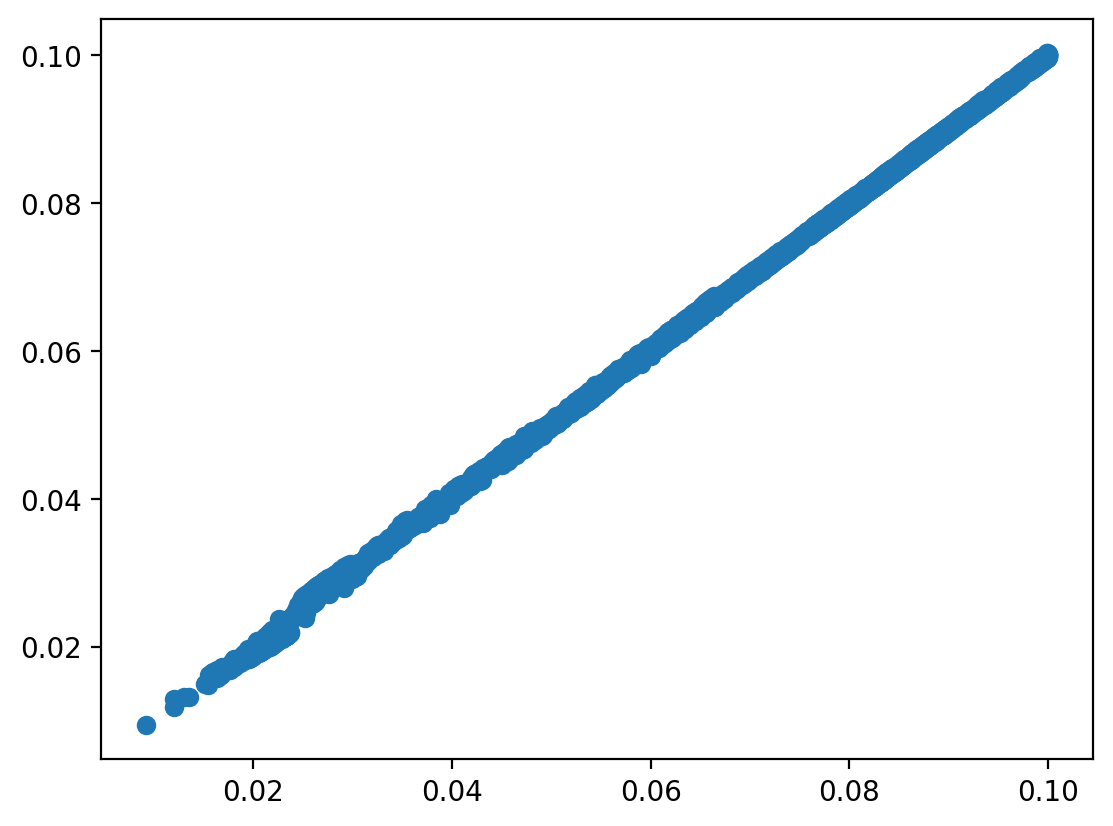

In [6]:
plt.scatter(fuji_pv['zcmb'],zhd)
plt.show()

In [7]:
fuji_pv.columns.values

array(['#fibermap_targetid', 'fibermap_i', 'ra_1', 'dec_1', 'targetid',
       'id', 'healpix', 'survey', 'program', 'targetid.1', 'z_x', 'zerr',
       'zwarn', 'spectype', 'subtype', 'deltachi2', 'healpix_id',
       'targetid.2', 'target_ra', 'target_dec', 'obsconditions',
       'release', 'brickid_1', 'brick_objid', 'fiberflux_ivar_g',
       'fiberflux_ivar_r', 'fiberflux_ivar_z', 'morphtype', 'flux_g',
       'flux_r', 'flux_z', 'flux_ivar_g', 'flux_ivar_r', 'flux_ivar_z',
       'ebv', 'flux_w1', 'flux_w2', 'flux_ivar_w1', 'flux_ivar_w2',
       'fiberflux_g', 'fiberflux_r', 'fiberflux_z', 'fibertotflux_g',
       'fibertotflux_r', 'fibertotflux_z', 'sersic_1', 'coadd_numexp',
       'coadd_exptime', 'coadd_numnight', 'coadd_numtile', 'healpix_id.1',
       'objid_1', 'brickid.1', 'brickname_1', 'ra.1', 'dec.1',
       'ppxf_sigma', 'ppxf_sigma_error', 'DER_SNR', 'snr_ppxf', 'OBJID_2',
       'BRICKID_2', 'BRICKNAME_2', 'RA_2', 'DEC_2', 'TYPE', 'SERSIC_2',
       'Z_PHOT_MEDIAN

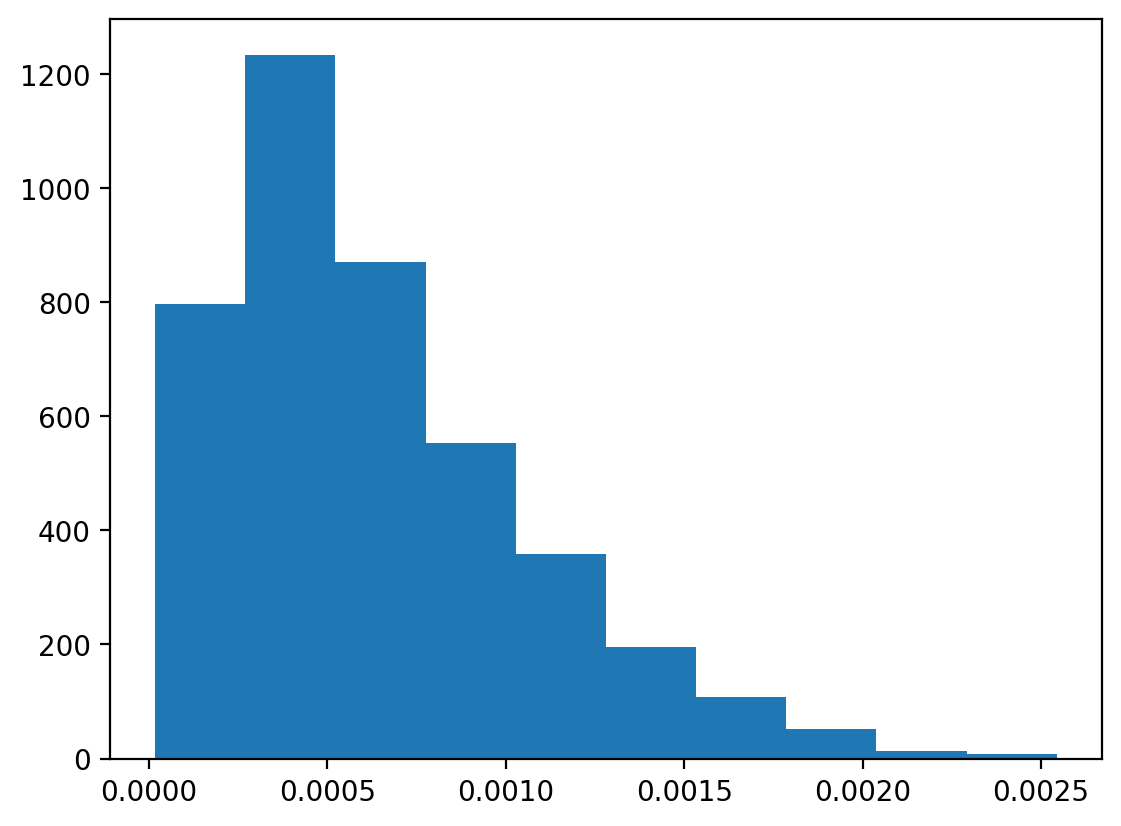

In [8]:
plt.hist(fuji_pv.er)
plt.show()

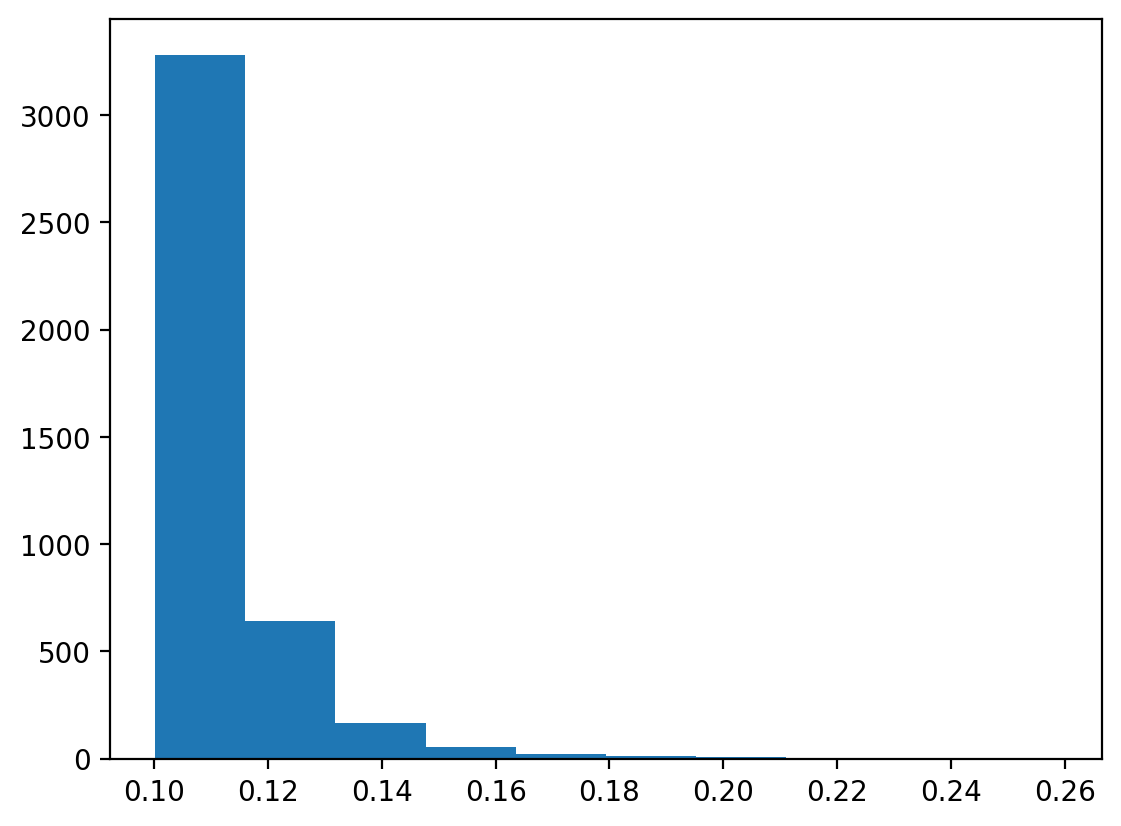

In [9]:
plt.hist(fuji_pv.logdist_err)
plt.show()

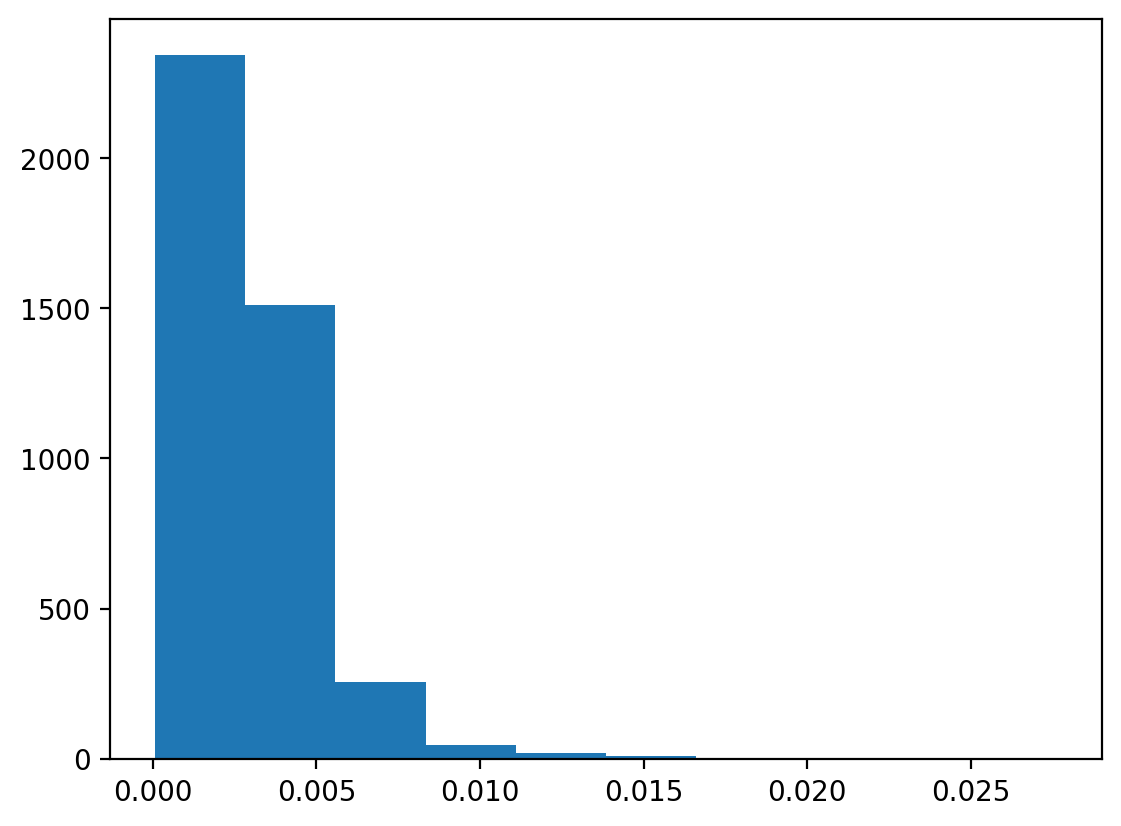

In [10]:
plt.hist(fuji_pv.uncor_radius_err)
plt.show()

In [11]:
sdss_pv = pd.read_csv("sdss_pv.csv")
sdss_pv

PGC            coords                objid            specObjId  \
0      1233903  J112934.7+023941  1237654030328922362   576621864177133568   
1      2180626  J161531.4+412425  1237659329777107022  1318559404106213120   
2      3112054  J134427.9-001000  1237671957519794394   336665265779533824   
3      3124224  J114611.6+032743  1237651755082580040   578859370373212160   
4      3122691  J114947.6+025635  1237671129127059618   578885758652278784   
...        ...               ...                  ...                  ...   
34054  1824143  J135945.7+280117  1237665429169307943  2384816045723510784   
34055    56786  J160218.0+162158  1237665531723317440  2472613143914768384   
34056    58348  J162944.9+404842  1237655373573062713   919958120371873792   
34057    58191  J162741.1+405537  1237655472357114000   918822324826826880   
34058    52441  J144042.8+032755  1237654879665586207   659793872024528896   

       plate          RA        Dec           l          b  deVMag_g  ...  \
0        512  172.394795   2.661484  260.750209  58.659639  17.54882  ...   
1       1171  243.880668  41.407020   65.575776  46.176954  15.44160  ...   
2        299  206.116130  -0.166644  330.119970  59.876092  17.43604  ...   
3        514  176.548500   3.461874  266.736098  61.659548  17.88573  ...   
4        514  177.448413   2.942938  268.922247  61.674524  17.43210  ...   
...      ...         ...        ...         ...        ...       ...  ...   
34054   2118  209.940589  28.021406   40.259214  74.845291  17.31200  ...   
34055   2196  240.575050  16.366201   29.418294  44.669599  15.29424  ...   
34056    817  247.437155  40.811611   64.680181  43.506581  12.81371  ...   
34057    816  246.921342  40.926966   64.835897  43.897452  13.70092  ...   
34058    586  220.178481   3.465423  355.504857  54.769715  13.34574  ...   

            ei        s       es       Sn   logdist  logdist_err  \
0      0.01661  2.20262  0.01513  1.00000  0.132164     0.102798   
1      0.00634  2.29344  0.00724  0.40271  0.046916     0.095898   
2      0.01837  2.29858  0.01343  1.00000  0.021033     0.104337   
3      0.02286  2.21004  0.02223  0.81233 -0.018901     0.107711   
4      0.01599  2.26756  0.01529  0.52220 -0.067468     0.104233   
...        ...      ...      ...      ...       ...          ...   
34054  0.01266  2.23033  0.01420  0.92185  0.085468     0.102212   
34055  0.00651  2.38024  0.00811  1.00000 -0.060779     0.098943   
34056  0.00446  2.46024  0.00579  1.00000  0.225224     0.095139   
34057  0.00441  2.39683  0.00828  1.00000  0.026271     0.096306   
34058  0.00521  2.41352  0.00808  1.00000  0.039805     0.096050   

       logdist_alpha  logdist_corr  logdist_corr_err  logdist_corr_alpha  
0          -0.576760      0.108613          0.102597           -0.680995  
1          -0.375417      0.027767          0.093567           -0.349573  
2          -0.530621      0.003093          0.105062           -0.623428  
3          -0.519613     -0.047273          0.108915           -0.598469  
4          -0.550741     -0.087197          0.104653           -0.649119  
...              ...           ...               ...                 ...  
34054      -0.580367      0.139850          0.096897           -0.410401  
34055      -0.584279     -0.065817          0.095355           -0.438518  
34056      -0.197331      0.221563          0.091369           -0.366103  
34057      -0.476559     -0.000887          0.093916           -0.502596  
34058      -0.418822      0.007425          0.093551           -0.502320  

[34059 rows x 46 columns]

In [12]:
#fuji_sdss = pd.merge(fuji_pv,sdss_pv, left_on = )
#print (sdss_pv['RA'])
delta_degree=(1/3600.)
coord_sdss = SkyCoord(ra = np.array(sdss_pv['RA'])*u.degree, dec = np.array(sdss_pv['Dec'])*u.degree)
coord_fuji = SkyCoord(ra = np.array(fuji_pv['ra_1'])*u.degree, dec = np.array(fuji_pv['dec_1'])*u.degree)
#print (coord_sdss)
idx, d2d, d3d = coord_fuji.match_to_catalog_sky(coord_sdss)
sdss_overlap = (d2d < (delta_degree*u.degree))
sdss_overlap_indices = idx[sdss_overlap]
print(len(sdss_overlap_indices))
#print(sdss_overlap_indices)
print(len(idx),idx[0],sdss_pv[idx[0]:idx[0]+1],d2d[0])
print(idx)

926
4191 6192           PGC            coords                objid            specObjId  \
6192  4537865  J124847.9+270157  1237667322722910284  2522100517862139904   

      plate          RA        Dec           l          b  deVMag_g  ...  \
6192   2240  192.199502  27.032552  222.041301  89.404581  17.54655  ...   

           ei        s       es       Sn   logdist  logdist_err  \
6192  0.02241  2.16984  0.01945  0.50084 -0.000251     0.104901   

      logdist_alpha  logdist_corr  logdist_corr_err  logdist_corr_alpha  
6192       -0.57045     -0.026521          0.105119           -0.670825  

[1 rows x 46 columns] 0d08m58.76369507s
[ 6192 33995  3391 ...  7038 25868  7038]


In [13]:
fuji_pv['idx'] = idx
fuji_pv['d2d'] = d2d.value
fuji_pv

#fibermap_targetid  fibermap_i        ra_1      dec_1  \
0      39628417112478213         400  192.260477  26.893112   
1      39628417133447721         426  193.579225  27.068031   
2      39627769709071900         191  184.913600  -0.750861   
3      39633076111803113          63  119.188267  39.927879   
4      39628422523128777         203  193.922076  27.250763   
...                  ...         ...         ...        ...   
4186   39632986789905375         570  252.485796  35.198279   
4187   39627652587330772          44   36.125245  -5.566223   
4188   39627628545578443          30   36.097224  -6.412998   
4189   39633307725466372         337  173.525018  53.919783   
4190   39627586577372913         174   35.756452  -8.314618   

               targetid    id  healpix survey program         targetid.1  ...  \
0     39628417112478213  1301    28148    sv1  bright  39628417112478213  ...   
1     39628417133447721  1304    28149    sv1  bright  39628417133447721  ...   
2     39627769709071900  1516    26254    sv1  bright  39627769709071900  ...   
3     39633076111803113   996     6541    sv1  bright  39633076111803113  ...   
4     39628422523128777  1304    28149    sv1  bright  39628422523128777  ...   
...                 ...   ...      ...    ...     ...                ...  ...   
4186  39632986789905375  3347     9429    sv3  bright  39632986789905375  ...   
4187  39627652587330772   933    17683    sv1  bright  39627652587330772  ...   
4188  39627628545578443   922    17680    sv1  bright  39627628545578443  ...   
4189  39633307725466372  2657     5976    sv2  bright  39633307725466372  ...   
4190  39627586577372913  1187    36782    sv1  bright  39627586577372913  ...   

            Sn   logdist  logdist_err logdist_alpha            pv  \
0     1.000000  0.040823     0.100876     -0.211552    715.900844   
1     1.000000  0.184259     0.100492      0.135647   3630.261093   
2     1.000000 -0.100140     0.101378     -0.438164  -2132.960665   
3     1.000000  0.002332     0.104726      0.319311     20.932642   
4     1.000000 -0.065115     0.101095     -0.311079  -1099.996339   
...        ...       ...          ...           ...           ...   
4186  1.000000  0.023497     0.184570     -0.998433   1567.827904   
4187  0.685189 -0.052879     0.114779     -0.573969  -1610.026917   
4188  0.793512 -0.155076     0.118115     -0.618295  -5257.334901   
4189  1.000000 -0.239747     0.200601     -1.013735 -11674.944029   
4190  1.000000  0.039694     0.113165     -0.561532   1452.005615   

             pverr        zp       zhd    idx        d2d  
0      1769.034190 -0.001541  0.027153   6192   0.149657  
1      1979.890546 -0.001604  0.030405  33995   0.020194  
2      2159.343503 -0.000654  0.031779   3391   0.000032  
3       939.867093 -0.000137  0.013181  21262   0.237557  
4      1707.819657 -0.000073  0.024700  32909   0.000008  
...            ...       ...       ...    ...        ...  
4186  12315.564270 -0.000143  0.099817  12827   0.013831  
4187   3494.709956 -0.000894  0.045573   7941  80.027029  
4188   4004.290864 -0.000183  0.049973   7038  80.393518  
4189   9768.632841 -0.000250  0.072290  25868   0.278661  
4190   4139.562548 -0.000427  0.054231   7038  81.350138  

[4191 rows x 121 columns]

In [14]:
fuji_sdss_n = pd.merge(fuji_pv, sdss_pv, left_on='idx', right_index = True)
fuji_sdss = fuji_sdss_n.drop(fuji_sdss_n[fuji_sdss_n['d2d'] > (0.1/3600.)].index)
fuji_sdss

#fibermap_targetid  fibermap_i        ra_1      dec_1  \
260    39628417133448023         529  193.592834  27.084179   
4      39628422523128777         203  193.922076  27.250763   
14     39628438604091708        1276  194.124215  27.939990   
9      39632940354767051         233  155.787603  32.907518   
10     39633207917808010          75  163.673104  47.451925   
...                  ...         ...         ...        ...   
3923   39633123280945563        1142  247.703678  42.392285   
3956   39627811408840959          74  150.358020   1.038920   
3966   39627786985408035          75  134.577750   0.104381   
3979   39627884997904170         645  218.374730   3.905292   
4025   39627824616705371        2192  217.650282   1.530603   

               targetid    id  healpix survey program         targetid.1  ...  \
260   39628417133448023  3418    28149    sv3  bright  39628417133448023  ...   
4     39628422523128777  1304    28149    sv1  bright  39628422523128777  ...   
14    39628438604091708  3319    10400    sv3  bright  39628438604091708  ...   
9     39632940354767051   764     5322    sv1  bright  39632940354767051  ...   
10    39633207917808010   830     5907    sv1  bright  39633207917808010  ...   
...                 ...   ...      ...    ...     ...                ...  ...   
3923  39633123280945563  3340     9984    sv3  bright  39633123280945563  ...   
3956  39627811408840959  3278    27239    sv3  bright  39627811408840959  ...   
3966  39627786985408035  1370    21845    sv1  bright  39627786985408035  ...   
3979  39627884997904170  3368    25982    sv3  bright  39627884997904170  ...   
4025  39627824616705371  3381    25976    sv3  bright  39627824616705371  ...   

         ei_y      s_y     es_y     Sn_y  logdist_y  logdist_err_y  \
260   0.00729  2.17579  0.00819  0.17525  -0.064625       0.096382   
4     0.00431  2.41535  0.00538  1.00000  -0.001810       0.096055   
14    0.00720  2.32626  0.00590  0.44381  -0.170886       0.098173   
9     0.00730  2.31762  0.00928  1.00000  -0.011851       0.097986   
10    0.00892  2.01695  0.01267  0.18011   0.082435       0.096777   
...       ...      ...      ...      ...        ...            ...   
3923  0.01345  2.24241  0.01450  1.00000   0.134279       0.102902   
3956  0.02337  2.22808  0.01501  1.00000  -0.026997       0.105730   
3966  0.02011  2.13913  0.01791  0.64823  -0.042501       0.105059   
3979  0.01777  2.24813  0.01876  0.88026   0.052369       0.105099   
4025  0.02458  2.28501  0.01809  1.00000  -0.059109       0.107109   

      logdist_alpha_y  logdist_corr  logdist_corr_err  logdist_corr_alpha  
260         -0.466227      0.001065          0.092887           -0.485523  
4           -0.397190      0.038192          0.092604           -0.463153  
14          -0.549678     -0.149937          0.095102           -0.496969  
9           -0.566901     -0.017032          0.095540           -0.611431  
10          -0.257630      0.096190          0.086367           -0.210012  
...               ...           ...               ...                 ...  
3923        -0.570189      0.121443          0.105674           -0.674806  
3956        -0.499645     -0.024988          0.097183           -0.479355  
3966        -0.552609     -0.065872          0.105575           -0.648807  
3979        -0.555680      0.055738          0.096673           -0.529588  
4025        -0.482099     -0.080966          0.108581           -0.553321  

[815 rows x 167 columns]

In [15]:
# fuji_sdss = pd.read_csv("fuji_pv_vs_sdss.csv")
# fuji_sdss

In [16]:
fuji_sdss.columns.values

array(['#fibermap_targetid', 'fibermap_i', 'ra_1', 'dec_1', 'targetid',
       'id', 'healpix', 'survey', 'program', 'targetid.1', 'z_x', 'zerr',
       'zwarn', 'spectype', 'subtype', 'deltachi2', 'healpix_id',
       'targetid.2', 'target_ra', 'target_dec', 'obsconditions',
       'release', 'brickid_1', 'brick_objid', 'fiberflux_ivar_g',
       'fiberflux_ivar_r', 'fiberflux_ivar_z', 'morphtype', 'flux_g',
       'flux_r', 'flux_z', 'flux_ivar_g', 'flux_ivar_r', 'flux_ivar_z',
       'ebv', 'flux_w1', 'flux_w2', 'flux_ivar_w1', 'flux_ivar_w2',
       'fiberflux_g', 'fiberflux_r', 'fiberflux_z', 'fibertotflux_g',
       'fibertotflux_r', 'fibertotflux_z', 'sersic_1', 'coadd_numexp',
       'coadd_exptime', 'coadd_numnight', 'coadd_numtile', 'healpix_id.1',
       'objid_1', 'brickid.1', 'brickname_1', 'ra.1', 'dec.1',
       'ppxf_sigma', 'ppxf_sigma_error', 'DER_SNR', 'snr_ppxf', 'OBJID_2',
       'BRICKID_2', 'BRICKNAME_2', 'RA_2', 'DEC_2', 'TYPE', 'SERSIC_2',
       'Z_PHOT_MEDIAN

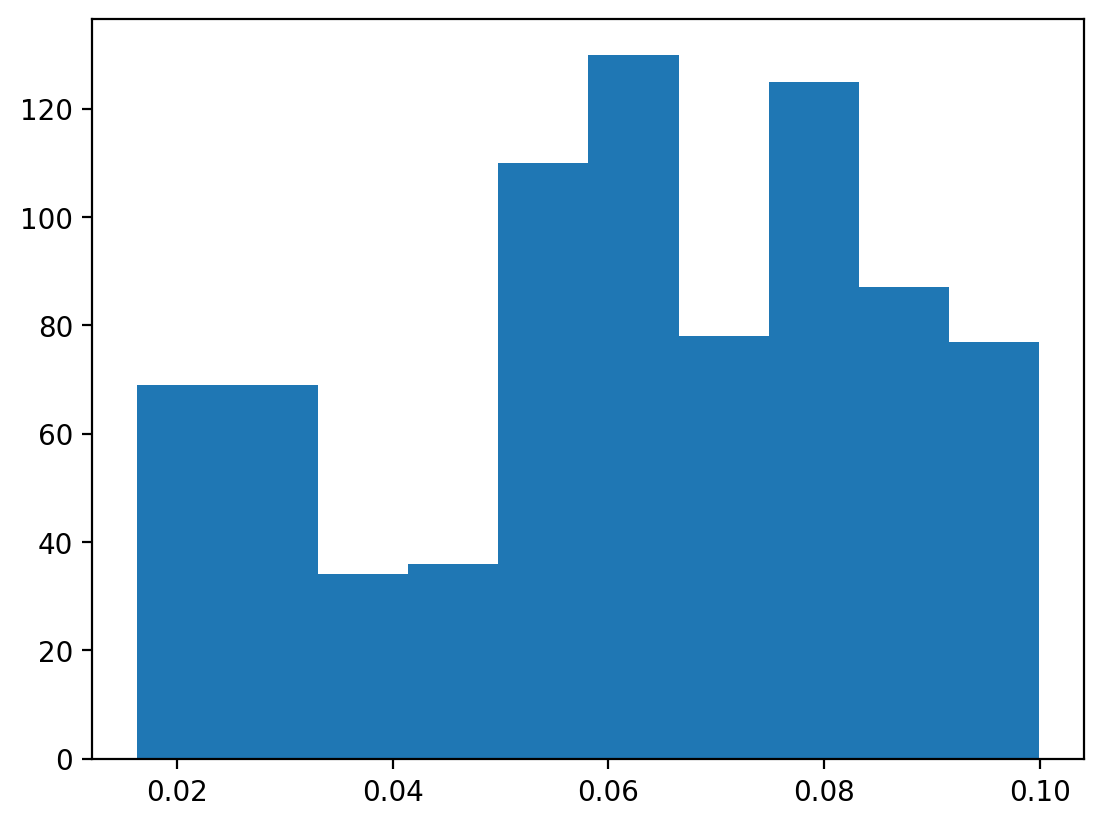

In [17]:
plt.hist(fuji_sdss.zcmb_group_x)
plt.show()

In [18]:
print (cosmo.comoving_distance(0.02))

59.67858912830972 Mpc


In [19]:
pull_pipe = (fuji_sdss.logdist_y - fuji_sdss.logdist_x)/(np.sqrt((fuji_sdss.logdist_err_x*fuji_sdss.logdist_err_x)+(fuji_sdss.logdist_err_y*fuji_sdss.logdist_err_y)))

In [20]:
diff = fuji_sdss.logdist_x - fuji_sdss.logdist_y
diff_err = np.sqrt((fuji_sdss.logdist_err_x**2)+(fuji_sdss.logdist_err_y**2))
print (np.average(diff, weights=1./diff_err))
print (np.mean(diff))
print (np.std(diff)/np.sqrt(len(diff)))
delta_eta = np.average(diff, weights=1./diff_err**2)
print (round(np.average(diff, weights=1./diff_err**2),4),"+/-",round(np.std(diff)/np.sqrt(len(diff)),4))
print (delta_eta)

0.011568590762885276
0.012208255329686002
0.0017504909008418685
0.0109 +/- 0.0018
0.010933309415534479


In [21]:
fuji_pv["logdist_corr"] = fuji_pv["logdist"] - delta_eta
fuji_pv["logdist_err_corr"] = np.sqrt(fuji_pv["logdist_err"]**2 + 0.0017**2)
fuji_pv

#fibermap_targetid  fibermap_i        ra_1      dec_1  \
0      39628417112478213         400  192.260477  26.893112   
1      39628417133447721         426  193.579225  27.068031   
2      39627769709071900         191  184.913600  -0.750861   
3      39633076111803113          63  119.188267  39.927879   
4      39628422523128777         203  193.922076  27.250763   
...                  ...         ...         ...        ...   
4186   39632986789905375         570  252.485796  35.198279   
4187   39627652587330772          44   36.125245  -5.566223   
4188   39627628545578443          30   36.097224  -6.412998   
4189   39633307725466372         337  173.525018  53.919783   
4190   39627586577372913         174   35.756452  -8.314618   

               targetid    id  healpix survey program         targetid.1  ...  \
0     39628417112478213  1301    28148    sv1  bright  39628417112478213  ...   
1     39628417133447721  1304    28149    sv1  bright  39628417133447721  ...   
2     39627769709071900  1516    26254    sv1  bright  39627769709071900  ...   
3     39633076111803113   996     6541    sv1  bright  39633076111803113  ...   
4     39628422523128777  1304    28149    sv1  bright  39628422523128777  ...   
...                 ...   ...      ...    ...     ...                ...  ...   
4186  39632986789905375  3347     9429    sv3  bright  39632986789905375  ...   
4187  39627652587330772   933    17683    sv1  bright  39627652587330772  ...   
4188  39627628545578443   922    17680    sv1  bright  39627628545578443  ...   
4189  39633307725466372  2657     5976    sv2  bright  39633307725466372  ...   
4190  39627586577372913  1187    36782    sv1  bright  39627586577372913  ...   

      logdist_err  logdist_alpha            pv         pverr        zp  \
0        0.100876      -0.211552    715.900844   1769.034190 -0.001541   
1        0.100492       0.135647   3630.261093   1979.890546 -0.001604   
2        0.101378      -0.438164  -2132.960665   2159.343503 -0.000654   
3        0.104726       0.319311     20.932642    939.867093 -0.000137   
4        0.101095      -0.311079  -1099.996339   1707.819657 -0.000073   
...           ...            ...           ...           ...       ...   
4186     0.184570      -0.998433   1567.827904  12315.564270 -0.000143   
4187     0.114779      -0.573969  -1610.026917   3494.709956 -0.000894   
4188     0.118115      -0.618295  -5257.334901   4004.290864 -0.000183   
4189     0.200601      -1.013735 -11674.944029   9768.632841 -0.000250   
4190     0.113165      -0.561532   1452.005615   4139.562548 -0.000427   

           zhd    idx        d2d  logdist_corr  logdist_err_corr  
0     0.027153   6192   0.149657      0.029889          0.100890  
1     0.030405  33995   0.020194      0.173326          0.100507  
2     0.031779   3391   0.000032     -0.111073          0.101393  
3     0.013181  21262   0.237557     -0.008601          0.104740  
4     0.024700  32909   0.000008     -0.076048          0.101109  
...        ...    ...        ...           ...               ...  
4186  0.099817  12827   0.013831      0.012563          0.184578  
4187  0.045573   7941  80.027029     -0.063812          0.114791  
4188  0.049973   7038  80.393518     -0.166009          0.118127  
4189  0.072290  25868   0.278661     -0.250681          0.200608  
4190  0.054231   7038  81.350138      0.028761          0.113177  

[4191 rows x 123 columns]

In [22]:
omega_m = 0.31               # Matter density
deccel = 3.0*omega_m/2.0 - 1.0
czmod = c*fuji_pv["zcmb"].to_numpy()*(1.0 + 0.5*(1.0 - deccel)*(fuji_pv["zcmb"].to_numpy()) - (1.0/6.0)*(2.0 - deccel - 3.0*deccel*deccel)*(fuji_pv["zcmb"].to_numpy())**2)
fuji_pv["pv_corr"] = np.log(10.0)*czmod/(1.0 + czmod/c)*fuji_pv["logdist_corr"].to_numpy()
fuji_pv["pverr_corr"] = np.log(10.0)*czmod/(1.0 + czmod/c)*fuji_pv["logdist_err_corr"].to_numpy()
fuji_pv

#fibermap_targetid  fibermap_i        ra_1      dec_1  \
0      39628417112478213         400  192.260477  26.893112   
1      39628417133447721         426  193.579225  27.068031   
2      39627769709071900         191  184.913600  -0.750861   
3      39633076111803113          63  119.188267  39.927879   
4      39628422523128777         203  193.922076  27.250763   
...                  ...         ...         ...        ...   
4186   39632986789905375         570  252.485796  35.198279   
4187   39627652587330772          44   36.125245  -5.566223   
4188   39627628545578443          30   36.097224  -6.412998   
4189   39633307725466372         337  173.525018  53.919783   
4190   39627586577372913         174   35.756452  -8.314618   

               targetid    id  healpix survey program         targetid.1  ...  \
0     39628417112478213  1301    28148    sv1  bright  39628417112478213  ...   
1     39628417133447721  1304    28149    sv1  bright  39628417133447721  ...   
2     39627769709071900  1516    26254    sv1  bright  39627769709071900  ...   
3     39633076111803113   996     6541    sv1  bright  39633076111803113  ...   
4     39628422523128777  1304    28149    sv1  bright  39628422523128777  ...   
...                 ...   ...      ...    ...     ...                ...  ...   
4186  39632986789905375  3347     9429    sv3  bright  39632986789905375  ...   
4187  39627652587330772   933    17683    sv1  bright  39627652587330772  ...   
4188  39627628545578443   922    17680    sv1  bright  39627628545578443  ...   
4189  39633307725466372  2657     5976    sv2  bright  39633307725466372  ...   
4190  39627586577372913  1187    36782    sv1  bright  39627586577372913  ...   

                pv         pverr        zp       zhd    idx        d2d  \
0       715.900844   1769.034190 -0.001541  0.027153   6192   0.149657   
1      3630.261093   1979.890546 -0.001604  0.030405  33995   0.020194   
2     -2132.960665   2159.343503 -0.000654  0.031779   3391   0.000032   
3        20.932642    939.867093 -0.000137  0.013181  21262   0.237557   
4     -1099.996339   1707.819657 -0.000073  0.024700  32909   0.000008   
...            ...           ...       ...       ...    ...        ...   
4186   1567.827904  12315.564270 -0.000143  0.099817  12827   0.013831   
4187  -1610.026917   3494.709956 -0.000894  0.045573   7941  80.027029   
4188  -5257.334901   4004.290864 -0.000183  0.049973   7038  80.393518   
4189 -11674.944029   9768.632841 -0.000250  0.072290  25868   0.278661   
4190   1452.005615   4139.562548 -0.000427  0.054231   7038  81.350138   

      logdist_corr  logdist_err_corr       pv_corr    pverr_corr  
0         0.029889          0.100890    524.165632   1769.285380  
1         0.173326          0.100507   3414.854109   1980.173823  
2        -0.111073          0.101393  -2365.838643   2159.647080  
3        -0.008601          0.104740    -77.188733    939.990915  
4        -0.076048          0.101109  -1284.695449   1708.061104  
...            ...               ...           ...           ...  
4186      0.012563          0.184578    838.296840  12316.086652  
4187     -0.063812          0.114791  -1942.917085   3495.093250  
4188     -0.166009          0.118127  -5627.991997   4004.705590  
4189     -0.250681          0.200608 -12207.362099   9768.983616  
4190      0.028761          0.113177   1052.065223   4140.029611  

[4191 rows x 125 columns]

In [23]:
fuji_pv.to_csv('fuji_pv_new.csv',index=False,header=True)

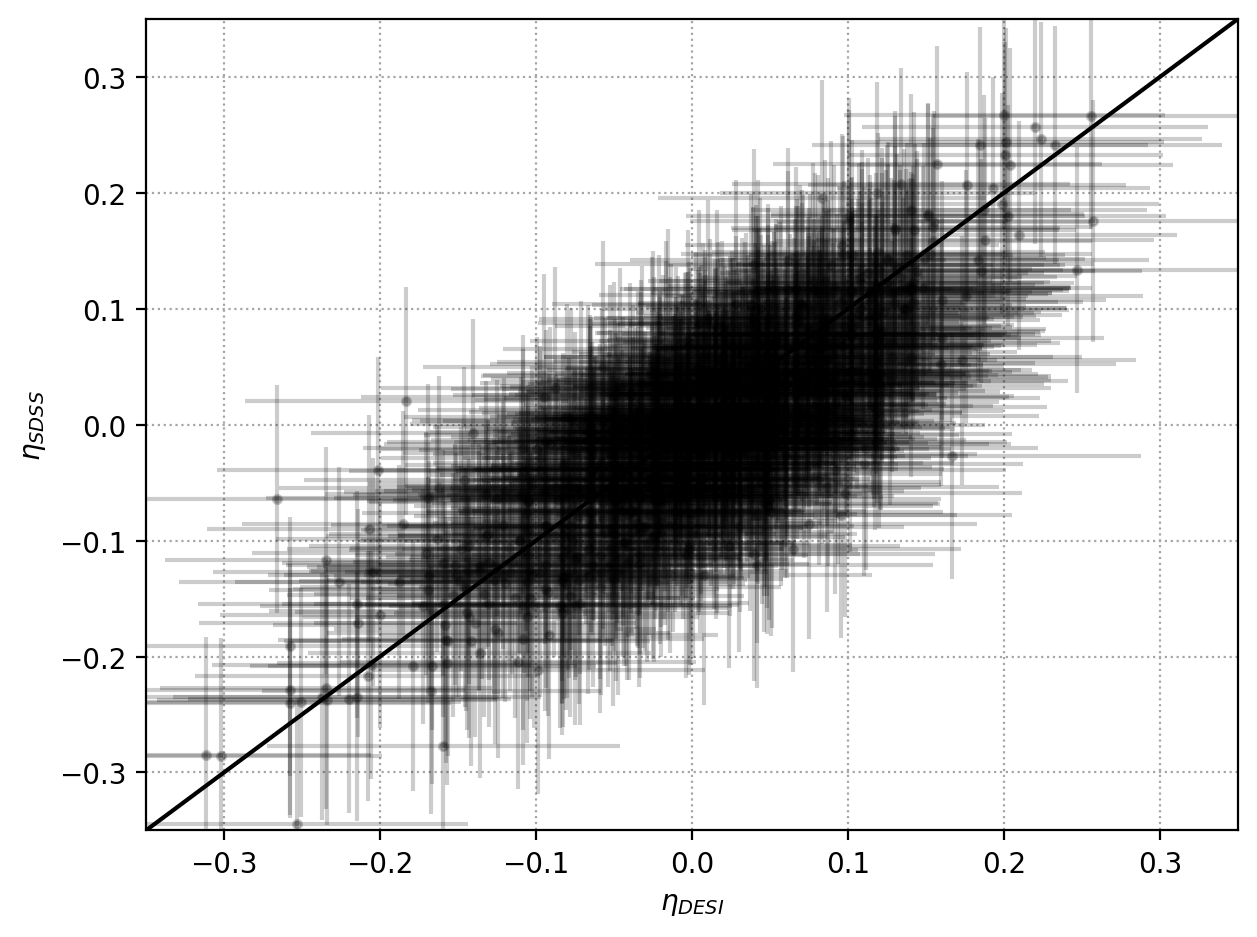

In [24]:
fig, ax = plt.subplots()
ax.set_ylim(-0.35,0.35)
ax.set_xlim(-0.35,0.35)
xxx=[-0.4,0.4];yyy=[-0.4,0.4]
ax.errorbar(fuji_sdss.logdist_x,fuji_sdss.logdist_y,xerr=fuji_sdss.logdist_err_x,yerr=fuji_sdss.logdist_err_y,fmt=".k",alpha=0.2)
ax.scatter(fuji_sdss.logdist_x,fuji_sdss.logdist_y,color='black',alpha=0.2,edgecolor='none',s=3.5)
ax.plot(xxx,yyy,color="black")
#ax.set_aspect(1)
ax.set_xlabel(r'$\eta_{DESI}$')
ax.set_ylabel(r'$\eta_{SDSS}$')
plt.grid(visible=True, which='both', color='0.65',linestyle=':')
#plt.legend()#,frameon=False)
plt.tight_layout()
plt.savefig('fuji_vs_sdss_logdist.png')
plt.savefig('fuji_vs_sdss_logdist.pdf')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


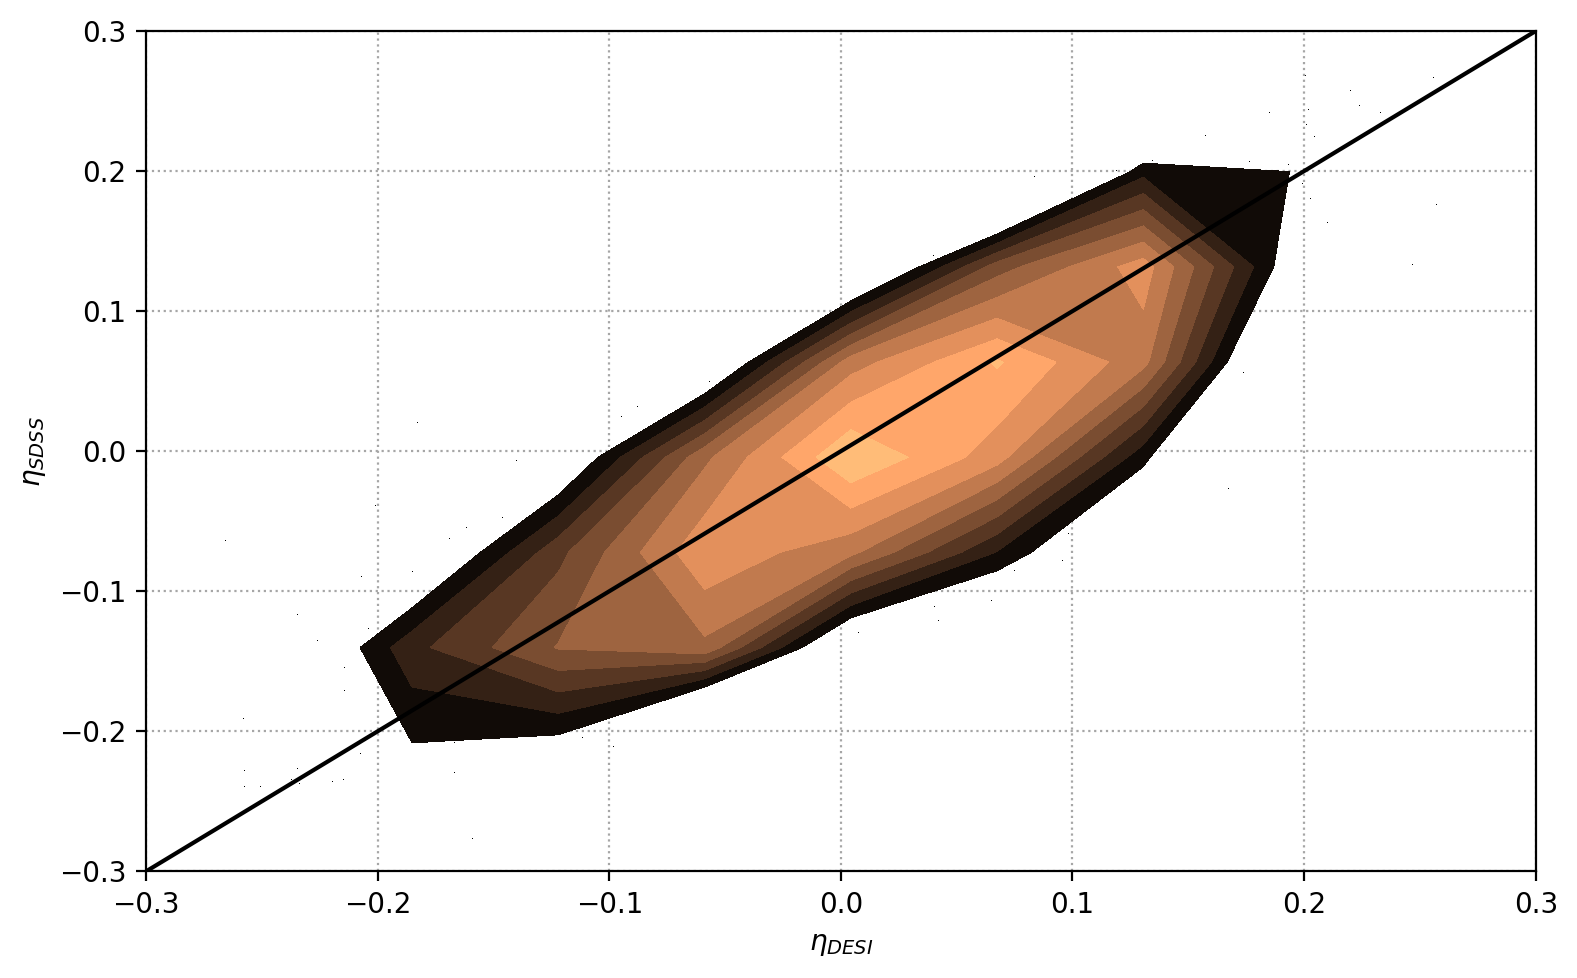

In [25]:
xfit = np.linspace(-0.3, 0.3)
# sfit = np.linspace(1.5,3.0)
# ifit = np.linspace(0.8,4.5)
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(-0.3,0.3)
ax.set_ylim(-0.3,0.3)
scatter_contour(fuji_sdss.logdist_x, fuji_sdss.logdist_y, threshold=10, log_counts=True, ax=ax,
                histogram2d_args=dict(bins=10),
                plot_args=dict(marker=',', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.copper))
ax.plot(xfit,xfit,c='black')#,label='FP parameters (Said et al. 2020)')
#ax.plot(xfit, (1.32696*sfit) - (0.785787*ifit) - 0.467, '-r',label='3D Gaussian')
# ax.text(-0.35,1.125-0.2,"3D Gaussian fit for Fuji r-band Fundamental Plane using "+str(len(r_desi))+" galaxies:")
# ax.text(-0.35,1.0-0.2, r'$a = 1.097, b = -0.790, c = -0.004$')
# ax.text(-0.35,0.875-0.2, r'$\bar r=0.193, \bar s = 2.012, \bar i = 2.554$')
# ax.text(-0.35,0.75-0.2, r'$\sigma_1 = 0.044, \sigma_2 = 0.418, \sigma_3 = 0.342$')
ax.set_xlabel(r'$\eta_{DESI}$')
ax.set_ylabel(r'$\eta_{SDSS}$')
#plt.xticks(color='w')
#plt.yticks(color='w')
plt.legend(framealpha=0.0)
ax.grid(visible=True, which='both', color='0.65',linestyle=':')
plt.tight_layout()
plt.savefig('fuji_vs_sdss_contour.png')
#plt.savefig('FP_fuji.pdf')
plt.show()

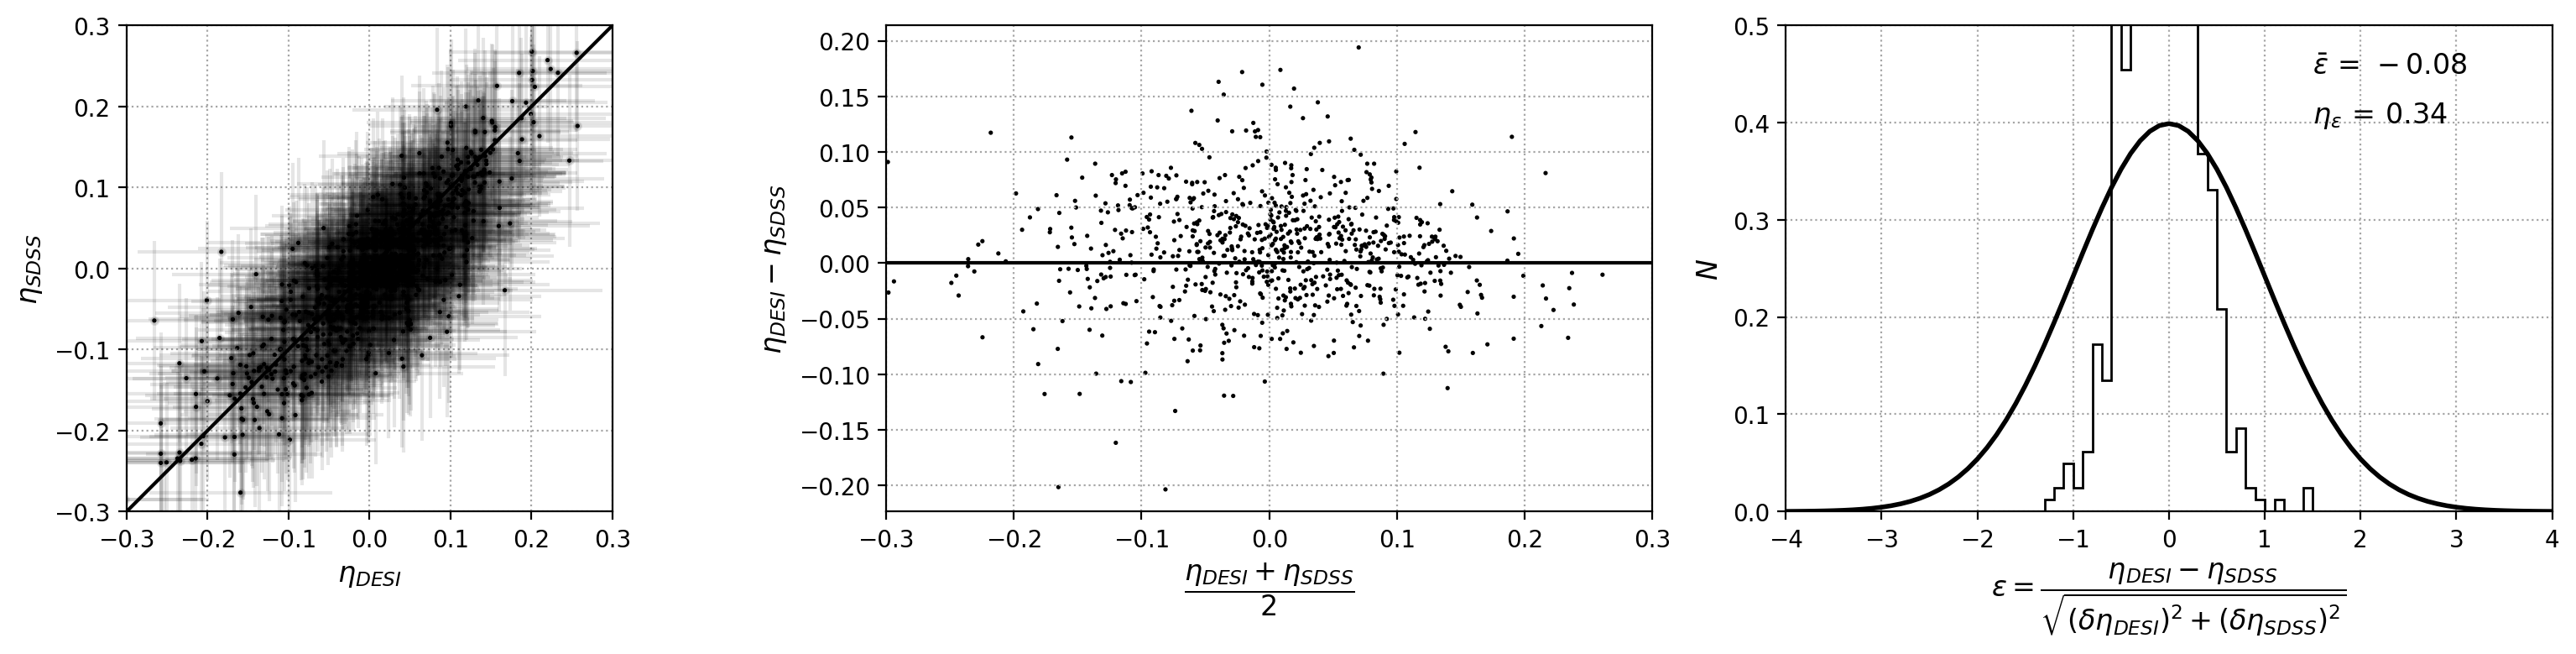

In [26]:
f_1, ((ax1, ax2, ax3)) = plt.subplots(nrows=1,ncols=3, figsize=(16, 4),sharex=False, sharey=False)
ax1.set_ylim(-0.3,0.3)
ax1.set_xlim(-0.3,0.3)
xxx=[-0.3,0.3];yyy=[-0.3,0.3]
ax1.errorbar(fuji_sdss.logdist_x,fuji_sdss.logdist_y,xerr=fuji_sdss.logdist_err_x,yerr=fuji_sdss.logdist_err_y,fmt=".k",alpha=0.1)
ax1.scatter(fuji_sdss.logdist_x,fuji_sdss.logdist_y,color='black',edgecolor='none',s=3.5)
ax1.plot(xxx,yyy,color="black")
ax1.grid(visible=True, which='both', color='0.65',linestyle=':')
ax1.set_aspect(1)
ax1.set_xlabel(r'$\eta_{DESI}$',size=12)
ax1.set_ylabel(r'$\eta_{SDSS}$',size=12)

#ax2.set_ylim(-200,200)
ax2.set_xlim(-0.3,0.3)
ax2.scatter(((fuji_sdss.logdist_x+fuji_sdss.logdist_y)/2.),fuji_sdss.logdist_x-fuji_sdss.logdist_y,color='black',edgecolor='none',s=3.5)
ax2.axhline(y=0.0,color="black")
ax2.grid(visible=True, which='both', color='0.65',linestyle=':')
ax2.set_xlabel(r'$\dfrac{\eta_{DESI} + \eta_{SDSS}}{2}$',size=12)
ax2.set_ylabel(r'$\eta_{DESI} - \eta_{SDSS}$',size=12)
#ax2.set_aspect(1)

ax3.set_ylim(0.0,0.5)
ax3.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = plt.hist(pull_pipe,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='etastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax3.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\eta$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax3.grid(visible=True, which='both', color='0.65',linestyle=':')
ax3.set_xlabel(r'$\epsilon = \dfrac{\eta_{DESI} - \eta_{SDSS}}{\sqrt{(\delta \eta_{DESI})^2 + (\delta \eta_{SDSS})^2}}$',size=12)
ax3.set_ylabel(r'$N$',size=12)
ax3.text(1.5,0.45,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe))+'$',size=12)#, fontname = 'Times New Roman',size=20)
ax3.text(1.5,0.4,r'$\eta_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe))+'$',size=12)

plt.tight_layout()
plt.savefig('fuji_pv_sdss.png')
plt.savefig('fuji_pv_sdss.pdf')
plt.show()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1877: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/opt/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1883: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(y=self.y, ax=self.ax_marg_y, **kwargs)
/var/folders/gm/yvqnp52d0dg0c6rgvbs833xh0000gp/T/ipykernel_2890/2294162658.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


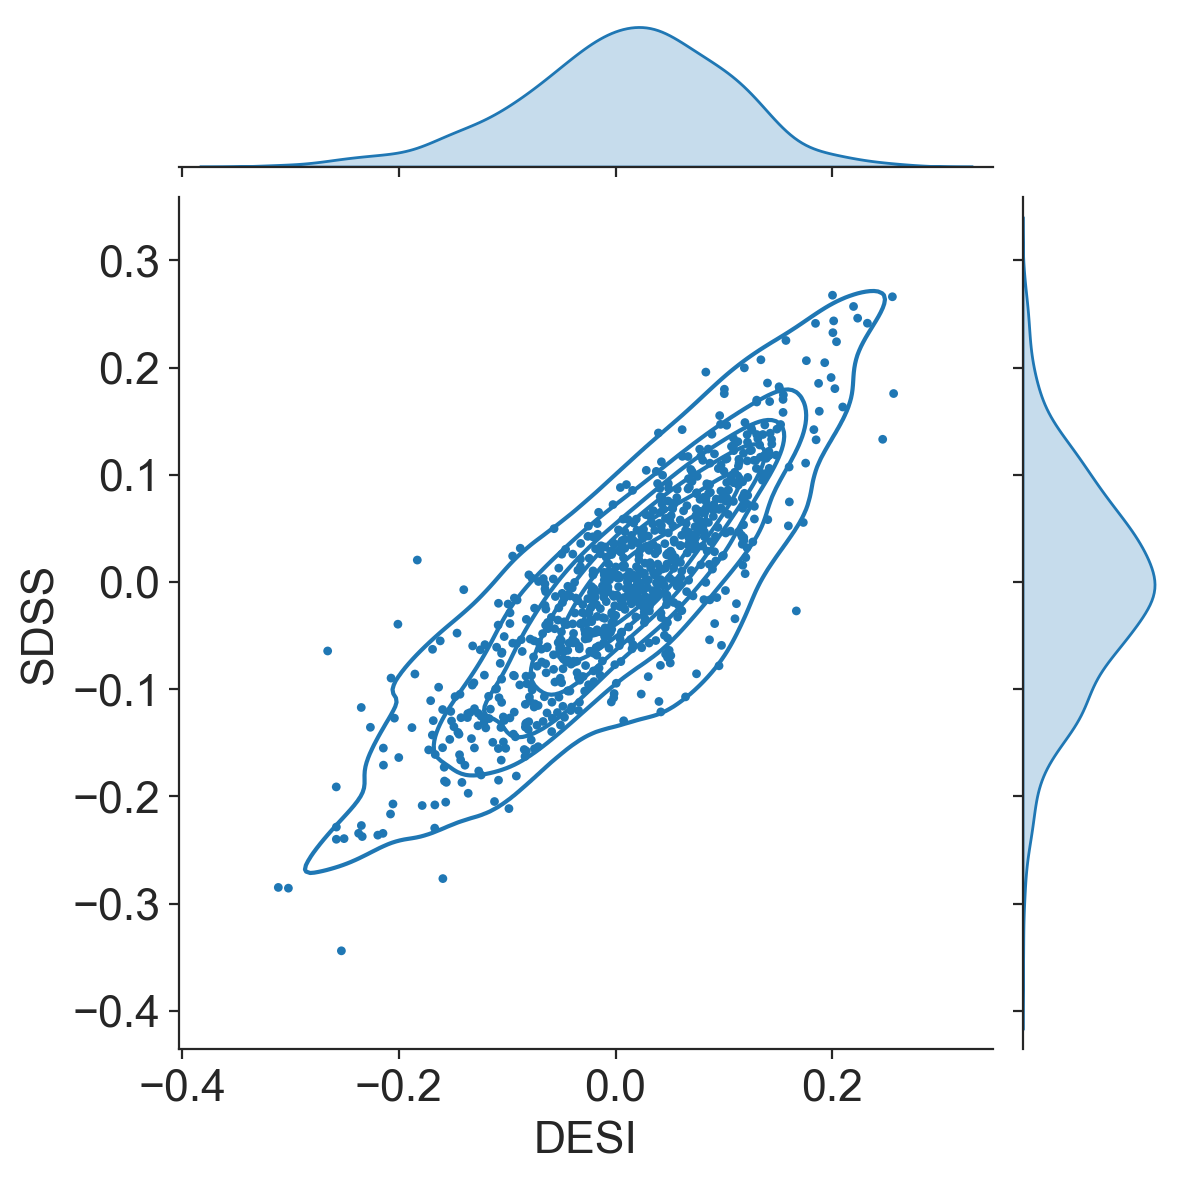

In [27]:
#sns.set(color_codes=True)
sns.set_style("ticks")
x = fuji_sdss.logdist_x
y = fuji_sdss.logdist_y
data = np.column_stack((x,y))
df = pd.DataFrame(data, columns=["x", "y"])
g = sns.JointGrid(x="x", y="y", data=df, space=-5.)
g = g.plot_joint(plt.scatter, s=10, edgecolor="None")
g = g.set_axis_labels(xlabel=r'DESI', ylabel=r'SDSS', fontsize = 16)
g = g.plot_joint(sns.kdeplot, zorder=10, levels=7)
g = g.plot_marginals(sns.kdeplot, shade=True)
#g = g.ax_joint.axhline(y=0.0,linestyle='--')
#g = sns.set(font_scale = 1.5)
#g = g.ax_marg_y.axhline(y=0.0)
plt.tick_params(axis="both", labelsize=16)
plt.tight_layout()
#plt.savefig('pv_method_1_vs_2_double_hist.png')
#plt.savefig('pv_method_1_vs_2_double_hist.pdf')
plt.show()

In [28]:
a = 1.17733397; b = -0.79312305
mean_r = 0.16471564; mean_s = 2.10226727; mean_i = 2.65269924
sigma1 = 0.05916213; sigma2 = 0.39165724; sigma3 = 0.25991061
c_fp = mean_r - a*mean_s - b*mean_i
c_fp

-0.20643811902868014

In [29]:
s_desi = fuji_pv.s
i_desi = fuji_pv.i
r_desi = fuji_pv.r
XFP_F_desi = (a*s_desi)+(b*i_desi)+c_fp

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


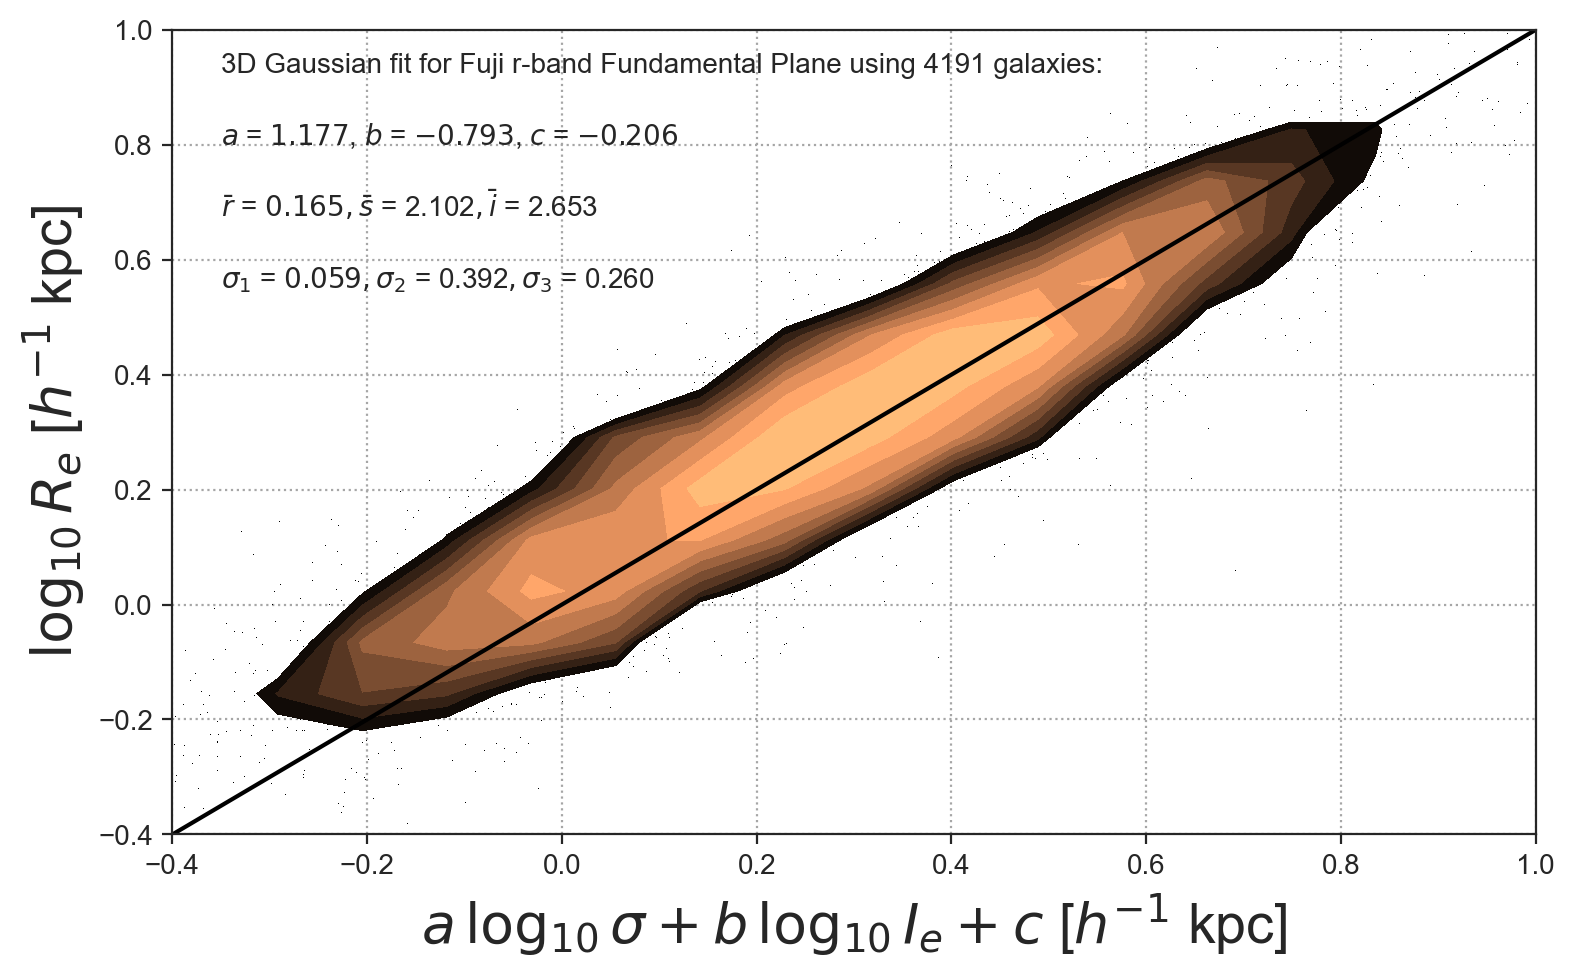

In [30]:
xfit = np.linspace(-0.5, 1.0)
sfit = np.linspace(1.5,3.0)
ifit = np.linspace(0.8,4.5)
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(-0.4,1.0)
ax.set_ylim(-0.4,1.0)
scatter_contour(XFP_F_desi, r_desi, threshold=25, log_counts=True, ax=ax,
               histogram2d_args=dict(bins=25),
               plot_args=dict(marker=',', linestyle='none', color='black'),
               contour_args=dict(cmap=plt.cm.copper))

#ax.scatter(XFP_F_desi, r_desi,c=sprob00,cmap="Reds")
ax.plot(xfit,xfit,c='black')#,label='FP parameters (Said et al. 2020)')
#ax.plot(xfit, (1.32696*sfit) - (0.785787*ifit) - 0.467, '-r',label='3D Gaussian')
ax.text(-0.35,1.125-0.2,"3D Gaussian fit for Fuji r-band Fundamental Plane using "+str(len(r_desi))+" galaxies:")
ax.text(-0.35,1.0-0.2, r'$a$ = '+'${0:.3f}$'.format(a)+', $b$ = '+'${0:.3f}$'.format(b)+', $c$ = '+'${0:.3f}$'.format(c_fp))
ax.text(-0.35,0.875-0.2, r'$\bar r$ = '+'${0:.3f}$'.format(mean_r)+r'$, \bar s$ = '+'{0:.3f}'.format(mean_s)+r'$, \bar i$ = '+'{0:.3f}'.format(mean_i))
ax.text(-0.35,0.75-0.2, r'$\sigma_1$ = '+'${0:.3f}$'.format(sigma1)+r'$, \sigma_2$ = '+'{0:.3f}'.format(sigma2)+r'$, \sigma_3$ = '+'{0:.3f}'.format(sigma3))
ax.set_xlabel(r'$a \/\log_{10} \sigma + b\/ \log_{10} I_e + c$ [$h^{-1}$ kpc]',size=20)
ax.set_ylabel(r'$\log_{10} R_e$ [$h^{-1}$ kpc]',size=20)
#plt.xticks(color='w')
#plt.yticks(color='w')
#ax.tick_params(axis='both', which='both',  labelleft=False, labelbottom=False)    # ticks along the bottom edge are off
plt.legend(framealpha=0.0)
#ax.set_aspect(1)
ax.grid(visible=True, which='both', color='0.65',linestyle=':')
plt.tight_layout()
plt.savefig('FP_fuji_pro.png', transparent=True ,dpi=300)
plt.savefig('FP_fuji_pro.pdf')
plt.show()

In [31]:
#print(fuji_pv)
print(np.log10(0.714), np.log10(0.045))

-0.14630178822382564 -1.3467874862246563


In [32]:
r_t_1 = r_desi - fuji_pv['logdist']
r_t_2 = a*s_desi + b*i_desi + c_fp #this one doesn't have pv 
r_theta = np.log10(fuji_pv.circ_radius) + np.log10(np.pi/648.)
mu_a = r_t_1 - r_theta
#mu_a = 10.*np.log10(fuji_pv.zcmb) + 5.*mu_a + 25.



#SBF
little_h = np.log10(0.7142552976791121)
little_h_err = 0.04540739161989308/(np.log(10.0)*0.7142552976791121) # see Coma_distance_v02


#SBF No spirals anywhere
# little_h = np.log10(0.7302078708375379)
# little_h_err = 0.046712289313872/(np.log(10.0)*0.7302078708375379) # see Coma_distance_v02

#TRGB
#little_h = np.log10(0.6981152494758825)
#little_h_err = 0.017329739652672993/(np.log(10.0)*0.6981152494758825) # see Coma_distance_v02

#SBF 10% sigma
#little_h = np.log10(0.7389556004036328)

#SBF spirals in
#little_h = np.log10(0.748803229061554)

#SBF correcting to ppxf sigma
#little_h = np.log10(0.7117618567103936)

mu_a_cal = mu_a - little_h
mu_a_err = np.sqrt((fuji_pv['er'])**2 + (fuji_pv['logdist_err'])**2 + (fuji_pv['er'])**2)
zmod = czmod/299792.458
da_pred_all = cosmo.angular_diameter_distance(fuji_pv.zcmb)#.value
res = mu_a - np.log10(da_pred_all)
cosmo_cal = FlatLambdaCDM(H0=73. * u.km / u.s / u.Mpc, Om0=0.31)
da_pred_cal_all = cosmo_cal.angular_diameter_distance(fuji_pv.zcmb)#.value
res_cal = mu_a_cal - np.log10(da_pred_cal_all)
# da_pred = cosmo.angular_diameter_distance(zmod).value
# res = mu_a - da_pred
mu_test = 5.*np.log10(cosmo.luminosity_distance(fuji_pv.zcmb)) - 5.*fuji_pv['logdist'] + 25.
mu_test_cal = 5.*np.log10(cosmo_cal.luminosity_distance(fuji_pv.zcmb)) - 5.*fuji_pv['logdist'] + 25.
diff_r = r_t_1 - r_t_2
diff_mu = mu_test_cal - mu_a
# print (r_t_1[0], r_t_2[0], r_t_1[0] - r_t_2[0])
# print(np.mean(diff_r))
# print(da_pred_all)
# print(res)
print(da_pred_all)

0        74.298477
1        83.223683
2        89.777557
3        38.479059
4        71.635457
           ...    
4186    265.288081
4187    126.763229
4188    140.500921
4189    197.994045
4190    151.068851
Name: zcmb, Length: 4191, dtype: float64


In [33]:
fuji_pv["mu_a"] = mu_a
fuji_pv["mu_a_err"] = mu_a_err
fuji_pv["mu_a_cal"] = mu_a_cal
fuji_pv["da_pred_all"] = da_pred_all
fuji_pv["res"] = res
fuji_pv["da_pred_cal_all"] = da_pred_cal_all
fuji_pv["res_cal"] = res_cal
fuji_pv["zmod"] = zmod
fuji_pv

#fibermap_targetid  fibermap_i        ra_1      dec_1  \
0      39628417112478213         400  192.260477  26.893112   
1      39628417133447721         426  193.579225  27.068031   
2      39627769709071900         191  184.913600  -0.750861   
3      39633076111803113          63  119.188267  39.927879   
4      39628422523128777         203  193.922076  27.250763   
...                  ...         ...         ...        ...   
4186   39632986789905375         570  252.485796  35.198279   
4187   39627652587330772          44   36.125245  -5.566223   
4188   39627628545578443          30   36.097224  -6.412998   
4189   39633307725466372         337  173.525018  53.919783   
4190   39627586577372913         174   35.756452  -8.314618   

               targetid    id  healpix survey program         targetid.1  ...  \
0     39628417112478213  1301    28148    sv1  bright  39628417112478213  ...   
1     39628417133447721  1304    28149    sv1  bright  39628417133447721  ...   
2     39627769709071900  1516    26254    sv1  bright  39627769709071900  ...   
3     39633076111803113   996     6541    sv1  bright  39633076111803113  ...   
4     39628422523128777  1304    28149    sv1  bright  39628422523128777  ...   
...                 ...   ...      ...    ...     ...                ...  ...   
4186  39632986789905375  3347     9429    sv3  bright  39632986789905375  ...   
4187  39627652587330772   933    17683    sv1  bright  39627652587330772  ...   
4188  39627628545578443   922    17680    sv1  bright  39627628545578443  ...   
4189  39633307725466372  2657     5976    sv2  bright  39633307725466372  ...   
4190  39627586577372913  1187    36782    sv1  bright  39627586577372913  ...   

           pv_corr    pverr_corr      mu_a  mu_a_err  mu_a_cal  da_pred_all  \
0       524.165632   1769.285380  1.830560  0.100876  1.976706    74.298477   
1      3414.854109   1980.173823  1.736384  0.100492  1.882531    83.223683   
2     -2365.838643   2159.647080  2.053817  0.101379  2.199963    89.777557   
3       -77.188733    939.990915  1.583120  0.104726  1.729266    38.479059   
4     -1284.695449   1708.061104  1.920637  0.101095  2.066784    71.635457   
...            ...           ...       ...       ...       ...          ...   
4186    838.296840  12316.086652  2.400224  0.184584  2.546370   265.288081   
4187  -1942.917085   3495.093250  2.155527  0.114780  2.301673   126.763229   
4188  -5627.991997   4004.705590  2.302411  0.118116  2.448558   140.500921   
4189 -12207.362099   9768.983616  2.536658  0.200605  2.682805   197.994045   
4190   1052.065223   4140.029611  2.139138  0.113165  2.285285   151.068851   

           res  da_pred_cal_all   res_cal      zmod  
0    -0.040420       101.778736 -0.030951  0.026067  
1    -0.183863       114.005045 -0.174393  0.029380  
2     0.100649       122.982954  0.110118  0.031838  
3    -0.002105        52.711039  0.007365  0.013172  
4     0.065509        98.130764  0.074979  0.025086  
...        ...              ...       ...       ...  
4186 -0.023494       363.408330 -0.014024  0.107005  
4187  0.052534       173.648259  0.062003  0.046143  
4188  0.154732       192.467015  0.164201  0.051648  
4189  0.240006       271.224719  0.249476  0.075899  
4190 -0.040037       206.943632 -0.030567  0.055957  

[4191 rows x 133 columns]

In [34]:
def linear(x, a, b):
    return a * x + b

params, covariance = curve_fit(linear, fuji_pv.zcmb, mu_a, sigma=mu_a_err, absolute_sigma=True)
a_fit, b_fit = params
a_error, b_error = np.sqrt(np.diag(covariance))
print(f"Fit results:")
print(f"a = {a_fit:.3f} +/- {a_error:.3f}")
print(f"b = {b_fit:.3f} +/- {b_error:.3f}")

Fit results:
a = 7.009 +/- 0.077
b = 1.742 +/- 0.005


In [35]:
params_cal, covariance_cal = curve_fit(linear, fuji_pv.zcmb, mu_a_cal, sigma=mu_a_err, absolute_sigma=True)
a_fit_cal, b_fit_cal = params_cal
a_error_cal, b_error_cal = np.sqrt(np.diag(covariance_cal))
print(f"Fit results:")
print(f"a_cal = {a_fit_cal:.3f} +/- {a_error_cal:.3f}")
print(f"b_cal = {b_fit_cal:.3f} +/- {b_error_cal:.3f}")

Fit results:
a_cal = 7.009 +/- 0.077
b_cal = 1.888 +/- 0.005


In [36]:
print(10**b_fit_cal)

77.27732657984976


In [37]:
params1, covariance1 = curve_fit(linear, fuji_pv.zcmb, res, sigma=fuji_pv.logdist_err, absolute_sigma=True)
a_fit1, b_fit1 = params1
a_error1, b_error1 = np.sqrt(np.diag(covariance1))
print(f"Fit results:")
print(f"a = {a_fit1:.3f} +/- {a_error1:.3f}")
print(f"b = {b_fit1:.3f} +/- {b_error1:.3f}")

Fit results:
a = -0.540 +/- 0.077
b = 0.012 +/- 0.005


In [38]:
degree = 3
coefficients, cov_matrix = np.polyfit(fuji_pv.zcmb, fuji_pv.mu_a_cal, degree, w=1.0/fuji_pv.mu_a_err, cov=True)
y_fit_p = np.poly1d(coefficients)

In [39]:
print(coefficients)

[195.29464417 -96.65158489  16.36786974   1.66529775]


In [40]:
10**1.66529553

46.26957708898337

/var/folders/gm/yvqnp52d0dg0c6rgvbs833xh0000gp/T/ipykernel_2890/1334476383.py:12: RuntimeWarning: divide by zero encountered in log10
  ax.plot(x_fit, np.log10(da_pred),'b--',label=f'Prediction')


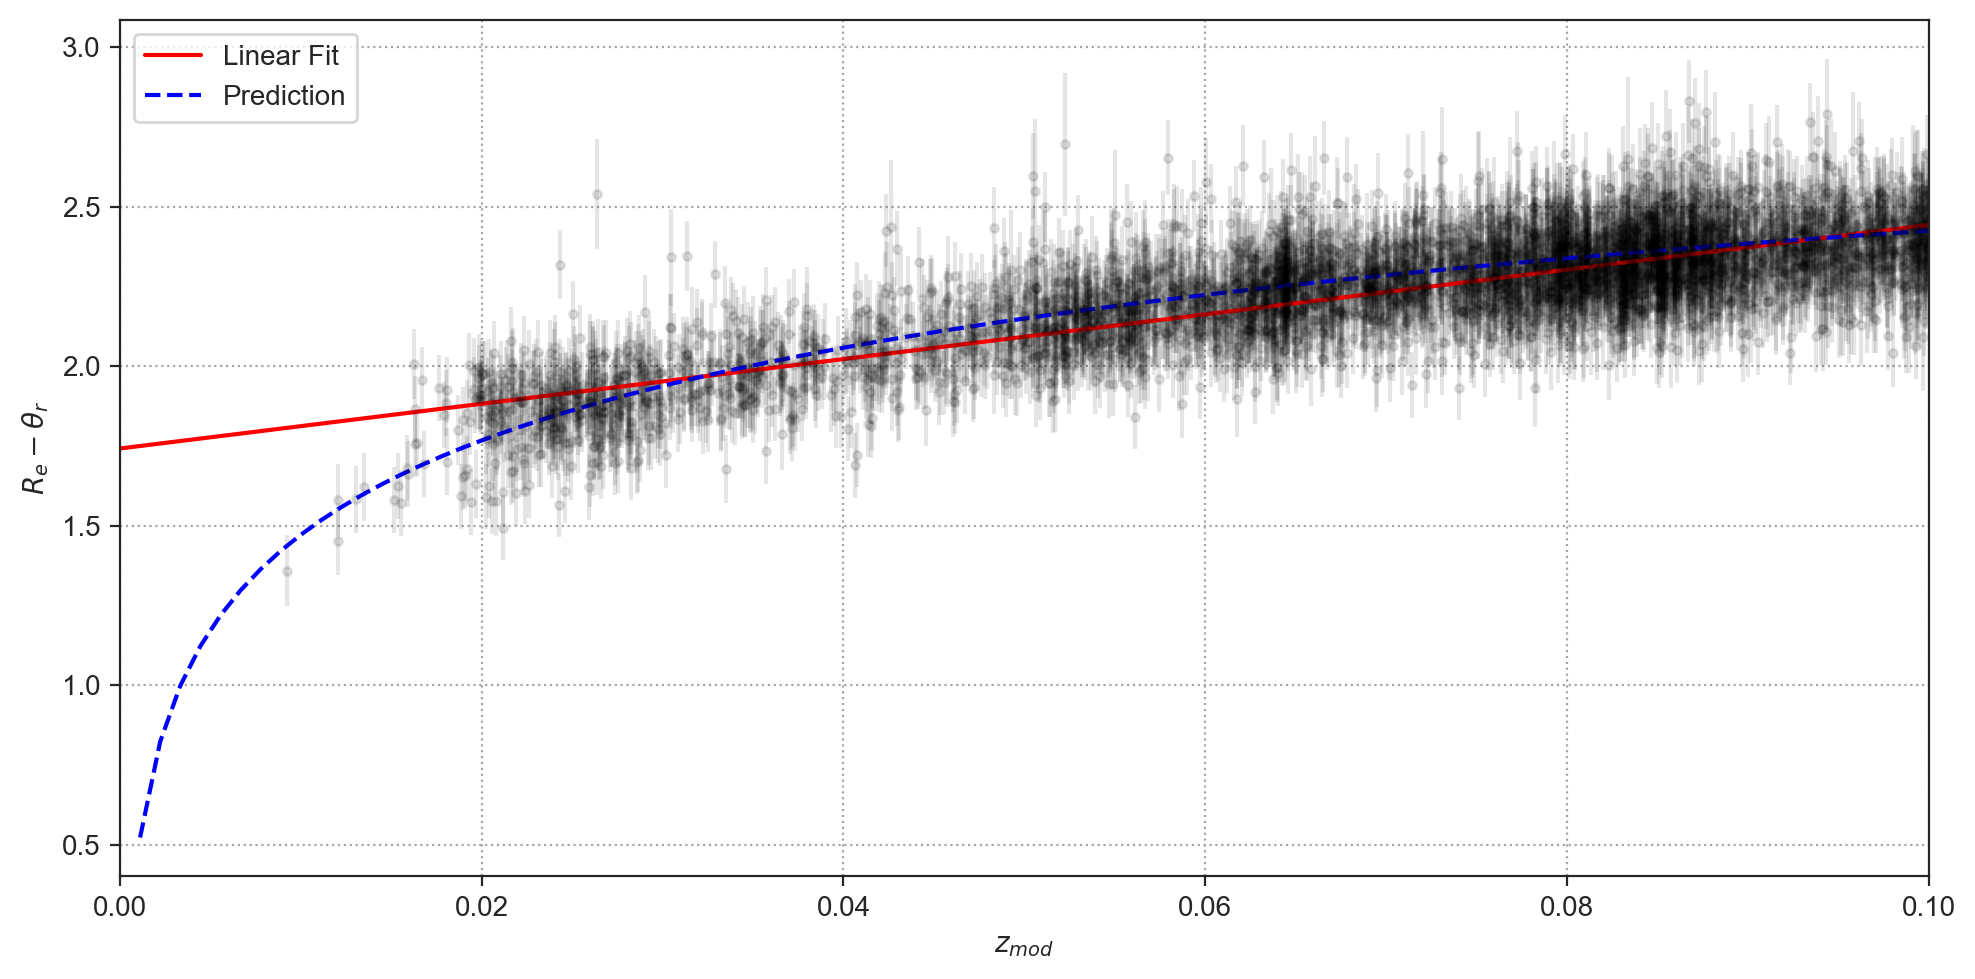

In [41]:
cosmo = FlatLambdaCDM(H0=100. * u.km / u.s / u.Mpc, Om0=0.31)
fig, ax = plt.subplots(figsize=(10, 5))
#plt.xscale('log')
ax.set_xlim(0.0,0.1)
ax.errorbar(fuji_pv.zcmb,mu_a,yerr=mu_a_err,fmt=".k",alpha=0.1)
ax.grid(visible=True, which='both', color='0.65',linestyle=':')
x_fit = np.linspace(0.0,0.11,100)
y_fit = linear(x_fit, a_fit,b_fit)
ax.plot(x_fit,y_fit,'r-',label='Linear Fit')
#ax.plot(x_fit, y_fit_p(x_fit),'b--', label=f'Polynomial Fit (Degree {degree})')
da_pred = cosmo.angular_diameter_distance(x_fit).value
ax.plot(x_fit, np.log10(da_pred),'b--',label=f'Prediction')
plt.xlabel(r'$z_{mod}$')
plt.ylabel(r'$R_e - \theta_r$')
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
print(np.log10(np.pi/648.))

-2.3144251331764596


In [43]:
print(np.pi/648.)

0.0048481368110953596


In [44]:
print(np.log10(0.67))

-0.17392519729917355


In [45]:
print(1./10**b_fit)

0.018117340226828465


/var/folders/gm/yvqnp52d0dg0c6rgvbs833xh0000gp/T/ipykernel_2890/1290426862.py:12: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(x_fit, np.log10(da_pred),'b--',label=f'Prediction')


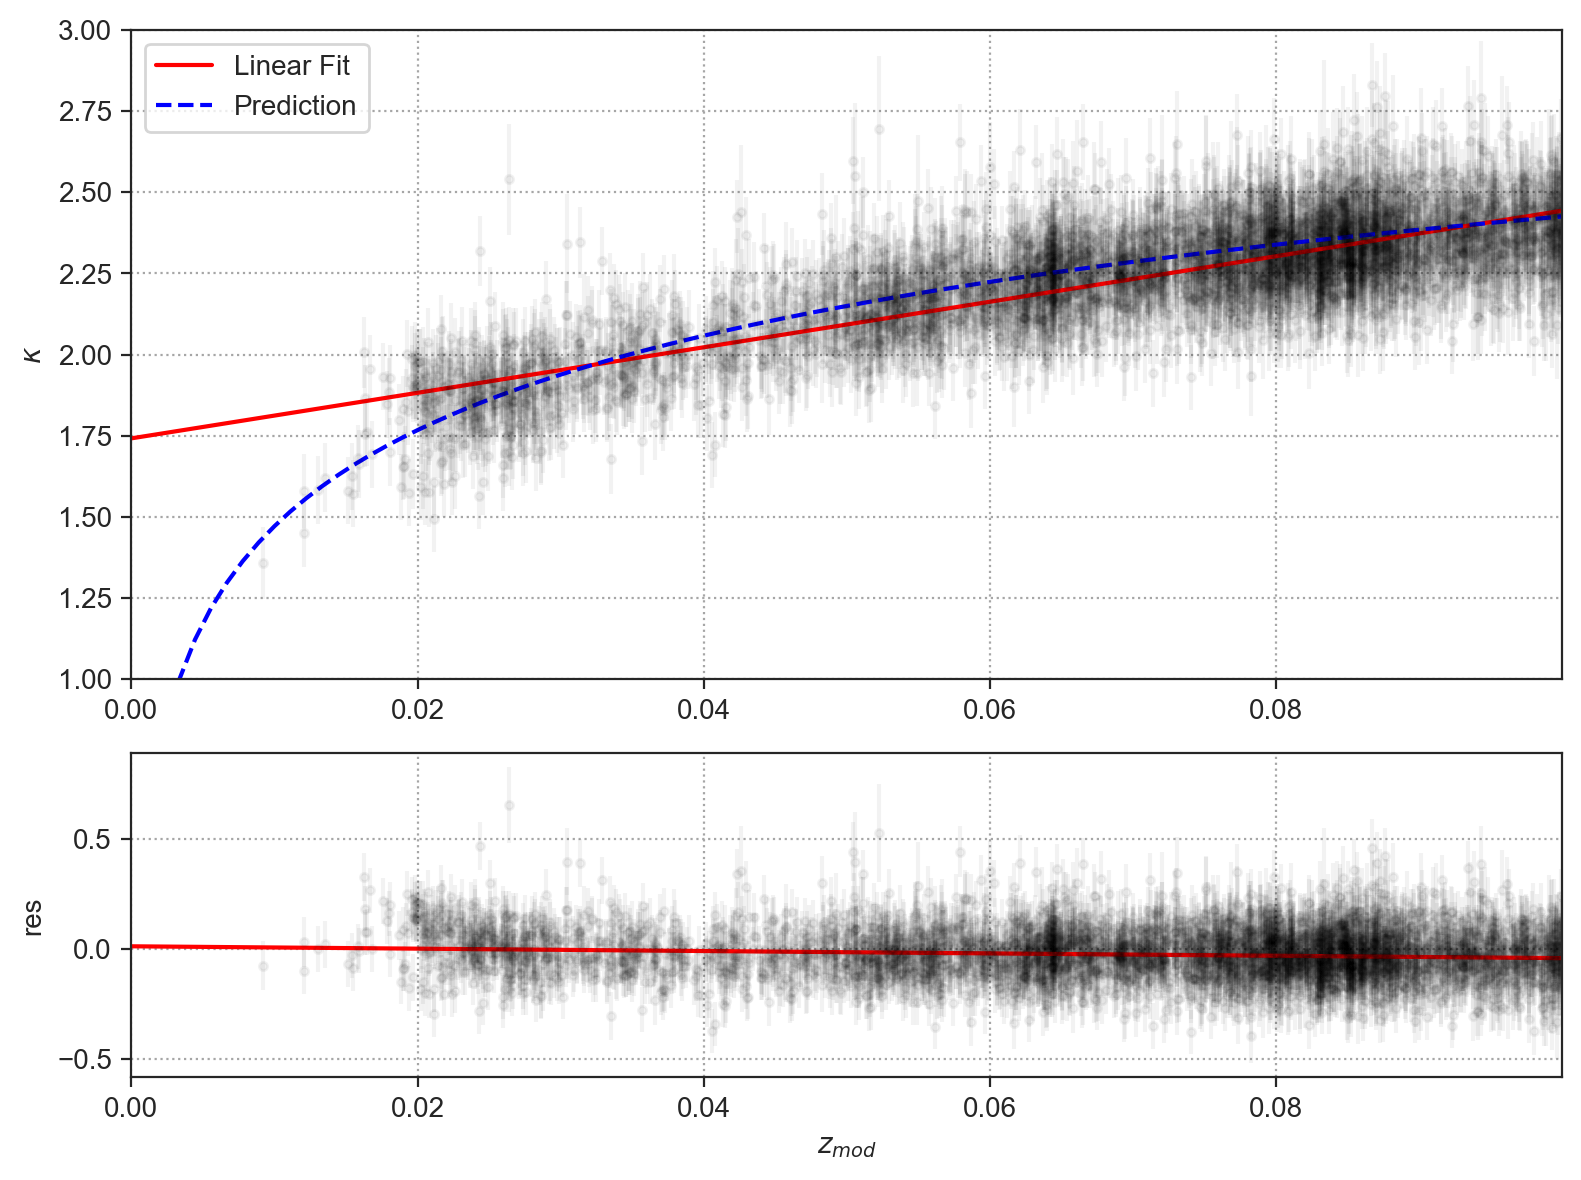

In [46]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])  # Adjust the height ratio here

# Upper subplot for the Hubble diagram
ax1 = plt.subplot(gs[0])
ax1.errorbar(fuji_pv.zcmb,mu_a,yerr=mu_a_err,fmt=".k",alpha=0.05)
ax1.grid(visible=True, which='both', color='0.65',linestyle=':')
x_fit = np.linspace(0.0,0.11,100)
y_fit = linear(x_fit, a_fit,b_fit)
ax1.plot(x_fit,y_fit,'r-',label='Linear Fit')
#ax1.plot(x_fit, y_fit_p(x_fit),'b--', label=f'Polynomial Fit (Degree {degree})')
ax1.plot(x_fit, np.log10(da_pred),'b--',label=f'Prediction')
#plt.xlabel(r'$z_{mod}$')
ax1.set_ylabel(r'$\kappa$')
ax1.legend()
ax1.set_xlim(0.0,np.max(fuji_pv.zcmb))
ax1.set_ylim(1.0,3.0)

# Lower subplot for residuals
ax2 = plt.subplot(gs[1])
ax2.errorbar(fuji_pv.zcmb, res,yerr=mu_a_err,fmt=".k",alpha=0.05)
ax2.grid(visible=True, which='both', color='0.65',linestyle=':')
# x_fit = np.linspace(0.0,0.11,100)
y_fit1 = linear(x_fit, a_fit1,b_fit1)
ax2.plot(x_fit,y_fit1,'r-',label='Linear Fit')
# ax.plot(x_fit, y_fit_p(x_fit),'b--', label=f'Polynomial Fit (Degree {degree})')

ax2.set_xlabel(r'$z_{mod}$')
ax2.set_ylabel(r'res')
ax2.set_xlim(0.0,np.max(fuji_pv.zcmb))
#ax2.legend()
plt.tight_layout()
#plt.suptitle('Hubble Diagram and Residuals')
plt.show()


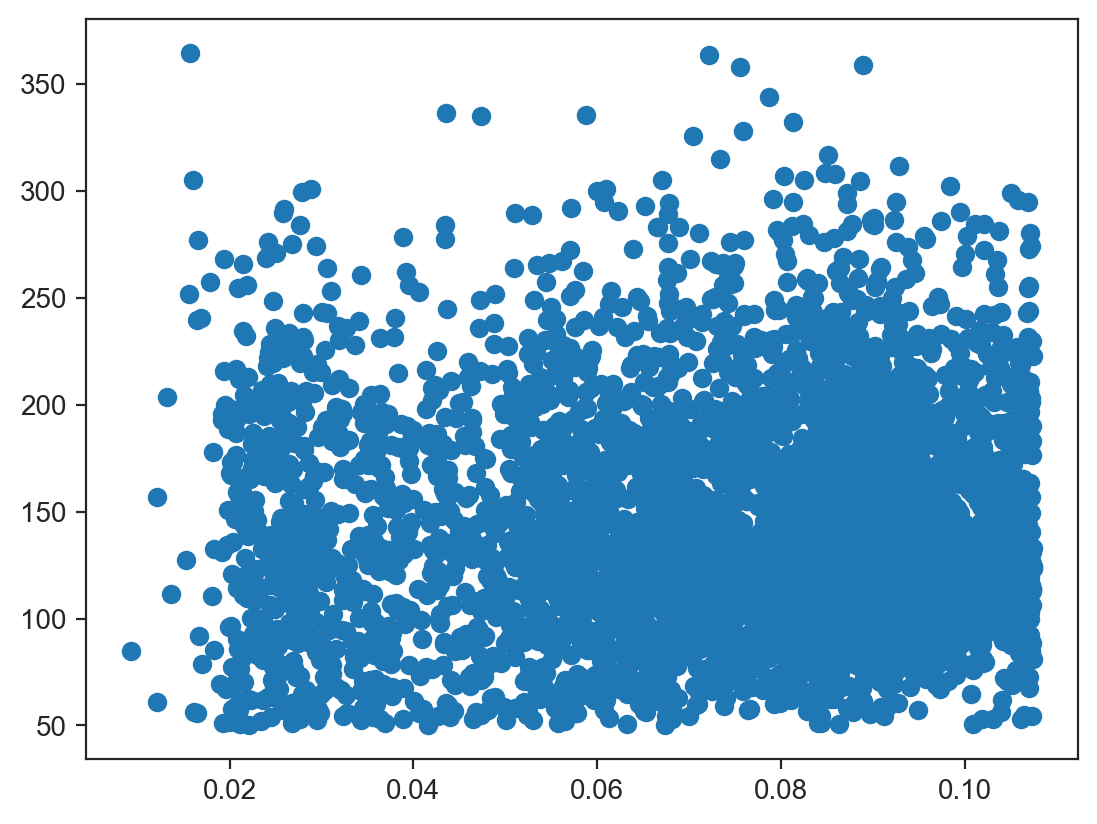

In [47]:
plt.scatter(zmod,fuji_pv.ppxf_sigma)
plt.show()

get all fp
calibrate using coma
Minimum z excuding coma
measaure H0


In [48]:
# little_h = np.log10(0.7142552976791121)
# print(little_h)

/var/folders/gm/yvqnp52d0dg0c6rgvbs833xh0000gp/T/ipykernel_2890/318506383.py:14: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(x_fit, np.log10(da_pred_cal),'b--',label=f'Prediction')


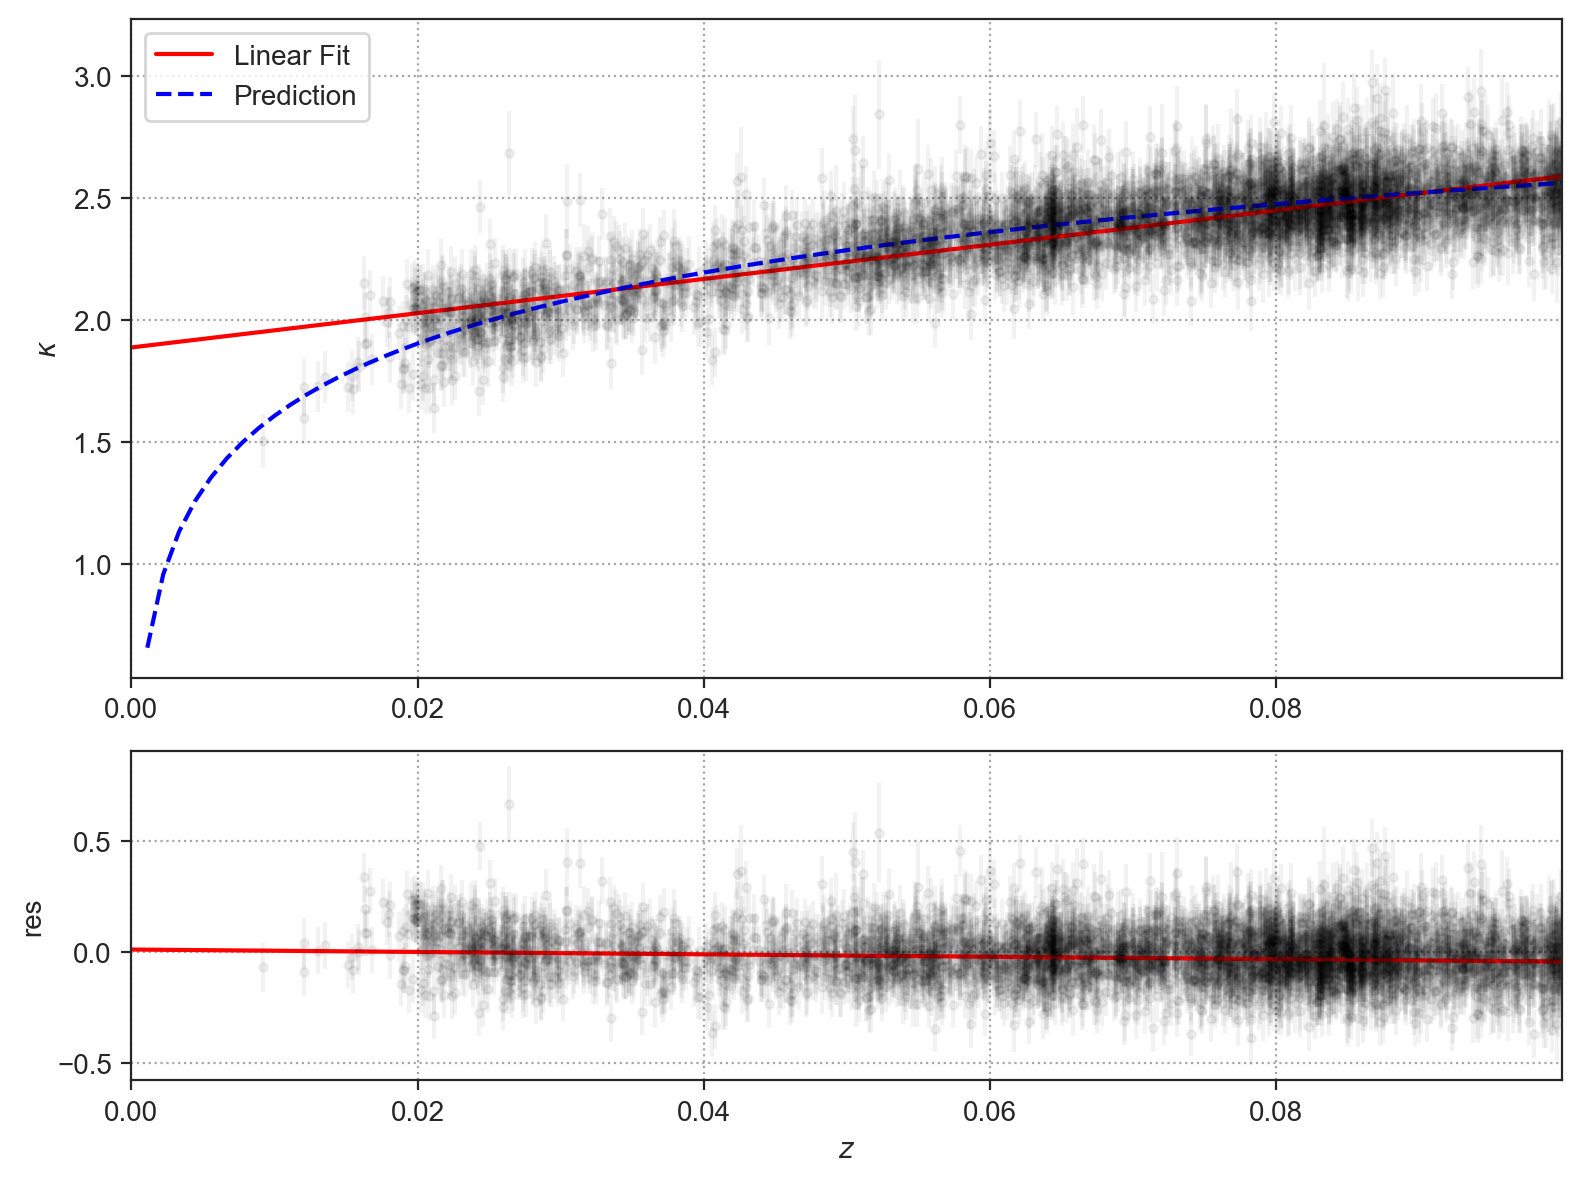

In [49]:
cosmo_cal = FlatLambdaCDM(H0=73. * u.km / u.s / u.Mpc, Om0=0.31)
da_pred_cal = cosmo_cal.angular_diameter_distance(x_fit).value
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])  # Adjust the height ratio here

# Upper subplot for the Hubble diagram
ax1 = plt.subplot(gs[0])
ax1.errorbar(fuji_pv.zcmb,mu_a_cal,yerr=mu_a_err,fmt=".k",alpha=0.05)
ax1.grid(visible=True, which='both', color='0.65',linestyle=':')
x_fit = np.linspace(0.0,0.11,100)
y_fit_cal = linear(x_fit, a_fit_cal,b_fit_cal)
ax1.plot(x_fit,y_fit_cal,'r-',label='Linear Fit')
#ax1.plot(x_fit, y_fit_p(x_fit),'b--', label=f'Polynomial Fit (Degree {degree})')
ax1.plot(x_fit, np.log10(da_pred_cal),'b--',label=f'Prediction')
#plt.xlabel(r'$z_{mod}$')
ax1.set_ylabel(r'$\kappa$')
ax1.legend()
ax1.set_xlim(0.0,np.max(fuji_pv.zcmb))
#ax1.set_ylim(1.0,3.0)

# Lower subplot for residuals
ax2 = plt.subplot(gs[1])
ax2.errorbar(fuji_pv.zcmb, res_cal,yerr=mu_a_err,fmt=".k",alpha=0.05)
ax2.grid(visible=True, which='both', color='0.65',linestyle=':')
# x_fit = np.linspace(0.0,0.11,100)
y_fit1 = linear(x_fit, a_fit1,b_fit1)
ax2.plot(x_fit,y_fit1,'r-',label='Linear Fit')
# ax.plot(x_fit, y_fit_p(x_fit),'b--', label=f'Polynomial Fit (Degree {degree})')

ax2.set_xlabel(r'$z$')
ax2.set_ylabel(r'res')
ax2.set_xlim(0.0,np.max(fuji_pv.zcmb))
#ax2.legend()
plt.tight_layout()
#plt.suptitle('Hubble Diagram and Residuals')
plt.show()

In [50]:
fuji_pv

#fibermap_targetid  fibermap_i        ra_1      dec_1  \
0      39628417112478213         400  192.260477  26.893112   
1      39628417133447721         426  193.579225  27.068031   
2      39627769709071900         191  184.913600  -0.750861   
3      39633076111803113          63  119.188267  39.927879   
4      39628422523128777         203  193.922076  27.250763   
...                  ...         ...         ...        ...   
4186   39632986789905375         570  252.485796  35.198279   
4187   39627652587330772          44   36.125245  -5.566223   
4188   39627628545578443          30   36.097224  -6.412998   
4189   39633307725466372         337  173.525018  53.919783   
4190   39627586577372913         174   35.756452  -8.314618   

               targetid    id  healpix survey program         targetid.1  ...  \
0     39628417112478213  1301    28148    sv1  bright  39628417112478213  ...   
1     39628417133447721  1304    28149    sv1  bright  39628417133447721  ...   
2     39627769709071900  1516    26254    sv1  bright  39627769709071900  ...   
3     39633076111803113   996     6541    sv1  bright  39633076111803113  ...   
4     39628422523128777  1304    28149    sv1  bright  39628422523128777  ...   
...                 ...   ...      ...    ...     ...                ...  ...   
4186  39632986789905375  3347     9429    sv3  bright  39632986789905375  ...   
4187  39627652587330772   933    17683    sv1  bright  39627652587330772  ...   
4188  39627628545578443   922    17680    sv1  bright  39627628545578443  ...   
4189  39633307725466372  2657     5976    sv2  bright  39633307725466372  ...   
4190  39627586577372913  1187    36782    sv1  bright  39627586577372913  ...   

           pv_corr    pverr_corr      mu_a  mu_a_err  mu_a_cal  da_pred_all  \
0       524.165632   1769.285380  1.830560  0.100876  1.976706    74.298477   
1      3414.854109   1980.173823  1.736384  0.100492  1.882531    83.223683   
2     -2365.838643   2159.647080  2.053817  0.101379  2.199963    89.777557   
3       -77.188733    939.990915  1.583120  0.104726  1.729266    38.479059   
4     -1284.695449   1708.061104  1.920637  0.101095  2.066784    71.635457   
...            ...           ...       ...       ...       ...          ...   
4186    838.296840  12316.086652  2.400224  0.184584  2.546370   265.288081   
4187  -1942.917085   3495.093250  2.155527  0.114780  2.301673   126.763229   
4188  -5627.991997   4004.705590  2.302411  0.118116  2.448558   140.500921   
4189 -12207.362099   9768.983616  2.536658  0.200605  2.682805   197.994045   
4190   1052.065223   4140.029611  2.139138  0.113165  2.285285   151.068851   

           res  da_pred_cal_all   res_cal      zmod  
0    -0.040420       101.778736 -0.030951  0.026067  
1    -0.183863       114.005045 -0.174393  0.029380  
2     0.100649       122.982954  0.110118  0.031838  
3    -0.002105        52.711039  0.007365  0.013172  
4     0.065509        98.130764  0.074979  0.025086  
...        ...              ...       ...       ...  
4186 -0.023494       363.408330 -0.014024  0.107005  
4187  0.052534       173.648259  0.062003  0.046143  
4188  0.154732       192.467015  0.164201  0.051648  
4189  0.240006       271.224719  0.249476  0.075899  
4190 -0.040037       206.943632 -0.030567  0.055957  

[4191 rows x 133 columns]

In [51]:
fuji_pv_highz = fuji_pv.drop(fuji_pv[fuji_pv.zcmb < 0.023].index)
fuji_pv_highz

#fibermap_targetid  fibermap_i        ra_1      dec_1  \
0      39628417112478213         400  192.260477  26.893112   
1      39628417133447721         426  193.579225  27.068031   
2      39627769709071900         191  184.913600  -0.750861   
4      39628422523128777         203  193.922076  27.250763   
6      39628430307758844         265  355.735958  27.470694   
...                  ...         ...         ...        ...   
4186   39632986789905375         570  252.485796  35.198279   
4187   39627652587330772          44   36.125245  -5.566223   
4188   39627628545578443          30   36.097224  -6.412998   
4189   39633307725466372         337  173.525018  53.919783   
4190   39627586577372913         174   35.756452  -8.314618   

               targetid    id  healpix survey program         targetid.1  ...  \
0     39628417112478213  1301    28148    sv1  bright  39628417112478213  ...   
1     39628417133447721  1304    28149    sv1  bright  39628417133447721  ...   
2     39627769709071900  1516    26254    sv1  bright  39627769709071900  ...   
4     39628422523128777  1304    28149    sv1  bright  39628422523128777  ...   
6     39628430307758844  1031    20359    sv1  bright  39628430307758844  ...   
...                 ...   ...      ...    ...     ...                ...  ...   
4186  39632986789905375  3347     9429    sv3  bright  39632986789905375  ...   
4187  39627652587330772   933    17683    sv1  bright  39627652587330772  ...   
4188  39627628545578443   922    17680    sv1  bright  39627628545578443  ...   
4189  39633307725466372  2657     5976    sv2  bright  39633307725466372  ...   
4190  39627586577372913  1187    36782    sv1  bright  39627586577372913  ...   

           pv_corr    pverr_corr      mu_a  mu_a_err  mu_a_cal  da_pred_all  \
0       524.165632   1769.285380  1.830560  0.100876  1.976706    74.298477   
1      3414.854109   1980.173823  1.736384  0.100492  1.882531    83.223683   
2     -2365.838643   2159.647080  2.053817  0.101379  2.199963    89.777557   
4     -1284.695449   1708.061104  1.920637  0.101095  2.066784    71.635457   
6      -626.948193   1683.867277  1.875427  0.101059  2.021573    70.668355   
...            ...           ...       ...       ...       ...          ...   
4186    838.296840  12316.086652  2.400224  0.184584  2.546370   265.288081   
4187  -1942.917085   3495.093250  2.155527  0.114780  2.301673   126.763229   
4188  -5627.991997   4004.705590  2.302411  0.118116  2.448558   140.500921   
4189 -12207.362099   9768.983616  2.536658  0.200605  2.682805   197.994045   
4190   1052.065223   4140.029611  2.139138  0.113165  2.285285   151.068851   

           res  da_pred_cal_all   res_cal      zmod  
0    -0.040420       101.778736 -0.030951  0.026067  
1    -0.183863       114.005045 -0.174393  0.029380  
2     0.100649       122.982954  0.110118  0.031838  
4     0.065509        98.130764  0.074979  0.025086  
6     0.026202        96.805966  0.035671  0.024731  
...        ...              ...       ...       ...  
4186 -0.023494       363.408330 -0.014024  0.107005  
4187  0.052534       173.648259  0.062003  0.046143  
4188  0.154732       192.467015  0.164201  0.051648  
4189  0.240006       271.224719  0.249476  0.075899  
4190 -0.040037       206.943632 -0.030567  0.055957  

[4063 rows x 133 columns]

In [52]:
#uncomment this cell to exclude spirals from the Hubble diagram
# fuji_pv_highz = fuji_pv_highz.drop(fuji_pv_highz[fuji_pv_highz["flag"] == 0].index)
# fuji_pv_highz

In [53]:
def linear(x, a, b):
    return a * x + b

params_highz, covariance_highz = curve_fit(linear, fuji_pv_highz.zcmb, fuji_pv_highz.mu_a_cal, sigma=fuji_pv_highz.mu_a_err, absolute_sigma=True)
a_fit_highz, b_fit_highz = params_highz
a_error_highz, b_error_highz = np.sqrt(np.diag(covariance_highz))
print(f"Fit results:")
print(f"a = {a_fit_highz:.3f} +/- {a_error_highz:.3f}")
print(f"b = {b_fit_highz:.3f} +/- {b_error_highz:.3f}")

Fit results:
a = 6.732 +/- 0.084
b = 1.909 +/- 0.006


In [54]:
print(10**b_fit_highz)

81.16433357432904


In [55]:
degree = 3
coefficients, cov_matrix = np.polyfit(fuji_pv_highz.zcmb, fuji_pv_highz.mu_a_cal, degree, w=1.0/fuji_pv_highz.mu_a_err, cov=True)
y_fit_p = np.poly1d(coefficients)
coefficients

array([131.97738602, -85.43895312,  15.7888833 ,   1.67289925])

In [56]:
print(10.**coefficients[3])

47.086807459904946


In [57]:
print(5.*np.log10(c))

27.384103514639637


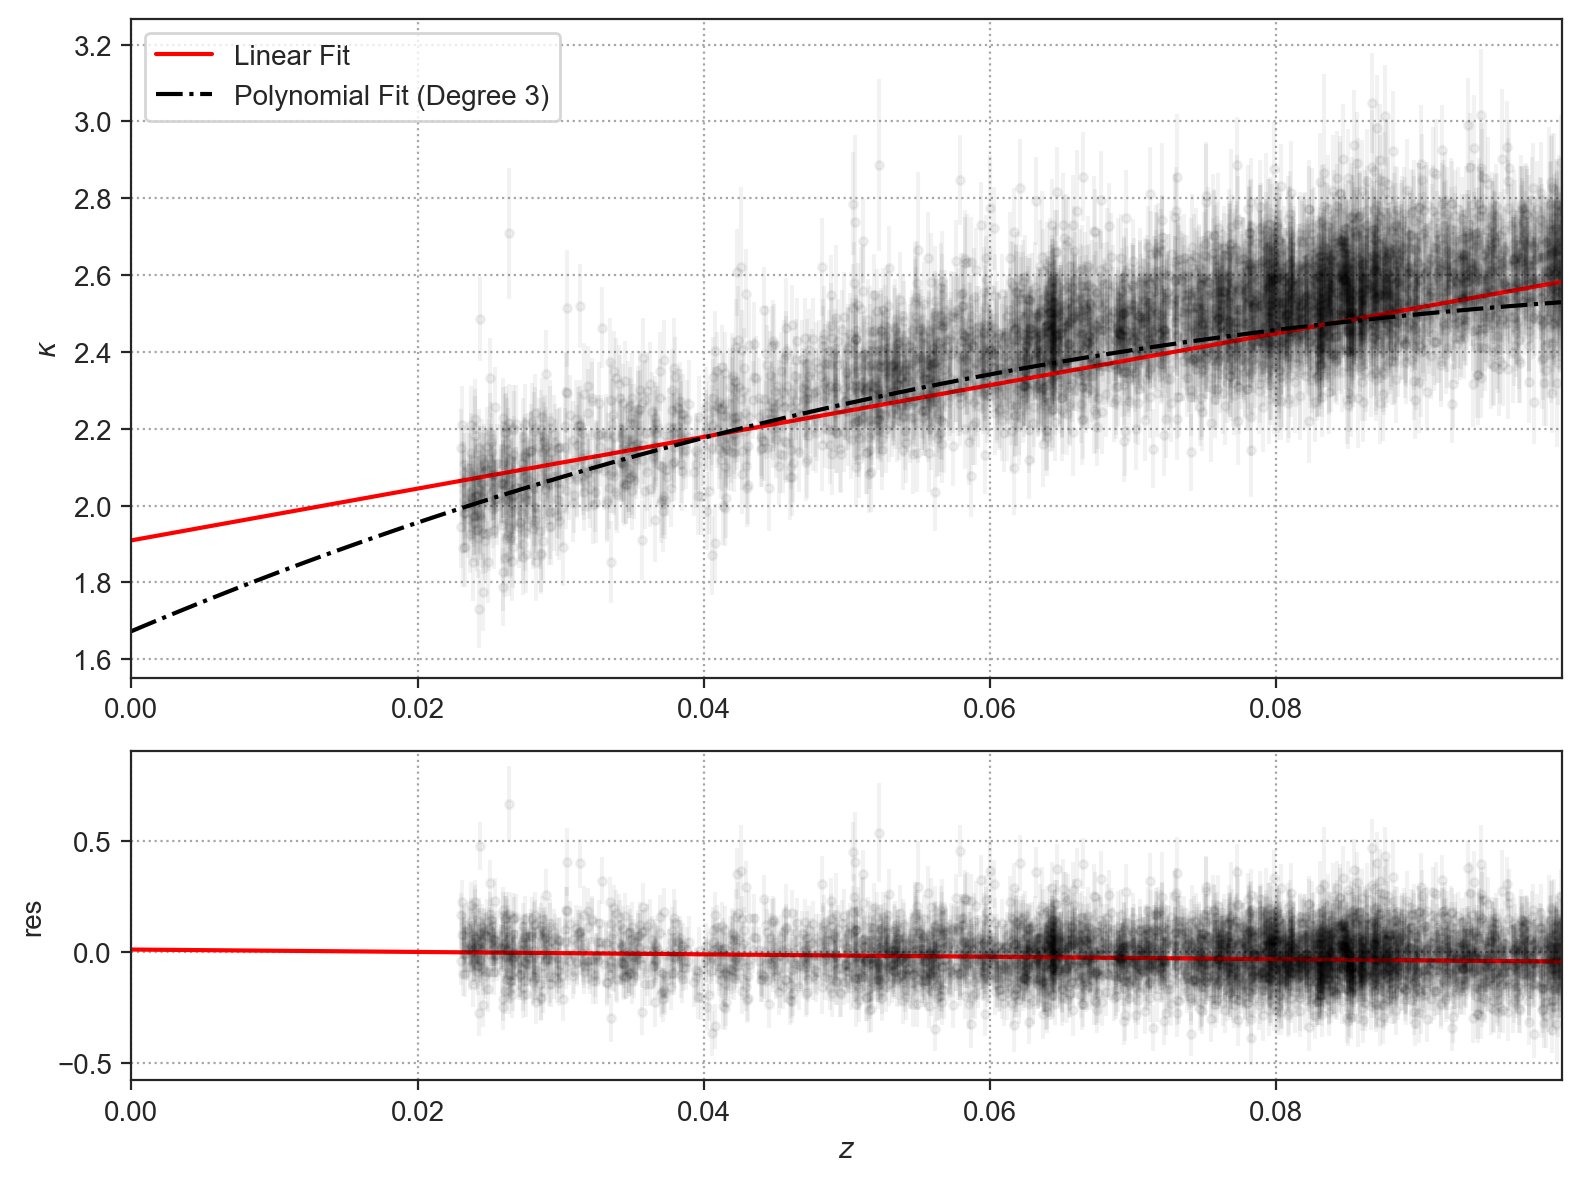

In [58]:
cosmo_cal = FlatLambdaCDM(H0=73. * u.km / u.s / u.Mpc, Om0=0.31)
da_pred_cal = cosmo_cal.angular_diameter_distance(x_fit).value
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])  # Adjust the height ratio here

# Upper subplot for the Hubble diagram
ax1 = plt.subplot(gs[0])
ax1.errorbar(fuji_pv_highz.zcmb,fuji_pv_highz.mu_a_cal + 2.*np.log10(1.+fuji_pv_highz.zcmb),yerr=fuji_pv_highz.mu_a_err,fmt=".k",alpha=0.05)
ax1.grid(visible=True, which='both', color='0.65',linestyle=':')
x_fit = np.linspace(0.0,0.11,100)
y_fit_highz = linear(x_fit, a_fit_highz,b_fit_highz)
ax1.plot(x_fit,y_fit_highz,'r-',label='Linear Fit')
ax1.plot(x_fit, y_fit_p(x_fit),'k-.', label=f'Polynomial Fit (Degree {degree})')
#ax1.plot(x_fit, np.log10(da_pred_cal),'b--',label=f'Prediction')
#plt.xlabel(r'$z_{mod}$')
ax1.set_ylabel(r'$\kappa$')
ax1.legend()
ax1.set_xlim(0.0,np.max(fuji_pv.zcmb))
#ax1.set_ylim(1.0,3.0)

# Lower subplot for residuals
ax2 = plt.subplot(gs[1])
ax2.errorbar(fuji_pv_highz.zcmb, fuji_pv_highz.res_cal,yerr=fuji_pv_highz.mu_a_err,fmt=".k",alpha=0.05)
ax2.grid(visible=True, which='both', color='0.65',linestyle=':')
# x_fit = np.linspace(0.0,0.11,100)
y_fit1 = linear(x_fit, a_fit1,b_fit1)
ax2.plot(x_fit,y_fit1,'r-',label='Linear Fit')
# ax.plot(x_fit, y_fit_p(x_fit),'b--', label=f'Polynomial Fit (Degree {degree})')

ax2.set_xlabel(r'$z$')
ax2.set_ylabel(r'res')
ax2.set_xlim(0.0,np.max(fuji_pv.zcmb))
#ax2.legend()
plt.tight_layout()
#plt.suptitle('Hubble Diagram and Residuals')
plt.show()

Now it is time to check the relation between d_A and z
See Brout et al 2022 as well as Hogg 2000

In [59]:
def k_modulus(z, H0, q0, j0):
    return np.log10(c * z * ((1.) + ((1./2.)*(1. - q0) * z) - ((1./6.) * (1. - q0 - 3. * q0**2 + j0) * z**2) ) ) - np.log10(H0) - 2. * np.log10(1 + z)

In [60]:
initial_guess = (100.,1.,1.)
x0 = fuji_pv_highz.zcmb #change this to zhd if you want the 2M++ correction applied
y0 = fuji_pv_highz.mu_a_cal #+ (2. * np.log10(1. + fuji_pv_highz["z_x"]))
err0 = fuji_pv_highz.mu_a_err
params_cos, covariance_cos = curve_fit(k_modulus, x0, y0, sigma=err0, p0 = initial_guess)
H0_fit, q0_fit, j0_fit = params_cos
H0_uncertainty, q0_uncertainty, j0_uncertainty = np.sqrt(np.diag(covariance_cos))

fitted_k_modulus = k_modulus(x0, H0_fit, q0_fit, j0_fit)
res_cal_fit = y0 - fitted_k_modulus
# Print the fitted parameters
print(f'Fitted Hubble Constant (H0): {H0_fit:.2f} km/s/Mpc ± {H0_uncertainty:.2f}')
print(f'Fitted Deceleration Parameter (q0): {q0_fit:.2f} ± {q0_uncertainty:.2f}')
print(f'Fitted Jerk Parameter (j0): {j0_fit:.2f} ± {j0_uncertainty:.2f}')

Fitted Hubble Constant (H0): 68.32 km/s/Mpc ± 2.31
Fitted Deceleration Parameter (q0): 4.79 ± 2.14
Fitted Jerk Parameter (j0): -14.75 ± 16.40


In [61]:
Hubble_diagram = pd.DataFrame(np.column_stack((x0,y0,err0)),columns=['z','D_A','Err_D_A'])
Hubble_diagram.to_csv('fp_hubble_diagram.csv',index=False,header=True)
Hubble_diagram

z       D_A   Err_D_A
0     0.025570  1.976706  0.100876
1     0.028752  1.882531  0.100492
2     0.031104  2.199963  0.101379
3     0.024625  2.066784  0.101095
4     0.024283  2.021573  0.101059
...        ...       ...       ...
4058  0.099659  2.546370  0.184584
4059  0.044638  2.301673  0.114780
4060  0.049781  2.448558  0.118116
4061  0.072022  2.682805  0.200605
4062  0.053780  2.285285  0.113165

[4063 rows x 3 columns]

In [62]:
import emcee
from tqdm import tqdm

def log_likelihood(params, x, y, yerr):
    H0, q0, j0 = params
    model = k_modulus(x, H0, q0, j0)
    chi_squared = ((y - model) / yerr) ** 2
    return -0.5 * np.sum(chi_squared)

def log_prior(params):
    H0, q0, j0 = params
    if 50 <= H0 <= 100 and -10 <= q0 <= 10 and -20 <= j0 <= 20.:
        return 0.0
    return -np.inf

def log_posterior(params, x, y, yerr):
    log_prior_result = log_prior(params)
    if not np.isfinite(log_prior_result):
        return -np.inf
    return log_prior_result + log_likelihood(params, x, y, yerr)

nwalkers = 100
nsteps = 1000

initial_parameters = np.array([70., -0.55, 1.0])  # H0, q0, j0

p0 = [initial_parameters + 1e-3 * np.random.randn(3) for _ in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, 3, log_posterior, args=(x0, y0, err0))

# with tqdm(total=nsteps, desc="Running MCMC") as pbar:
#     for _ in sampler.sample(p0, iterations=nsteps):
#         pbar.update(1)

sampler.run_mcmc(p0, nsteps, progress=True)

samples = sampler.chain[:, 50:, :].reshape((-1, 3))
H0_fit_mc, q0_fit_mc, j0_fit_mc = np.median(samples, axis=0)
H0_uncertainty_mc, q0_uncertainty_mc, j0_uncertainty_mc = np.std(samples, axis=0)

print(f'Fitted Hubble Constant (H0): {H0_fit_mc:.2f} km/s/Mpc ± {H0_uncertainty_mc:.2f}')
print(f'Fitted Deceleration Parameter (q0): {q0_fit_mc:.2f} ± {q0_uncertainty_mc:.2f}')
print(f'Fitted Jerk Parameter (j0): {j0_fit_mc:.2f} ± {j0_uncertainty_mc:.2f}')

100%|██████████████████████████████████████████████████████████| 1000/1000 [01:50<00:00,  9.05it/s]

Fitted Hubble Constant (H0): 68.76 km/s/Mpc ± 2.09
Fitted Deceleration Parameter (q0): 4.07 ± 1.97
Fitted Jerk Parameter (j0): -6.58 ± 10.28


In [63]:
chain_df = pd.DataFrame(data=samples, columns=["H0","q0","j0"])
chain_df.to_csv("mcmc_chain_all_three.csv", index=False)

Removed no burn in


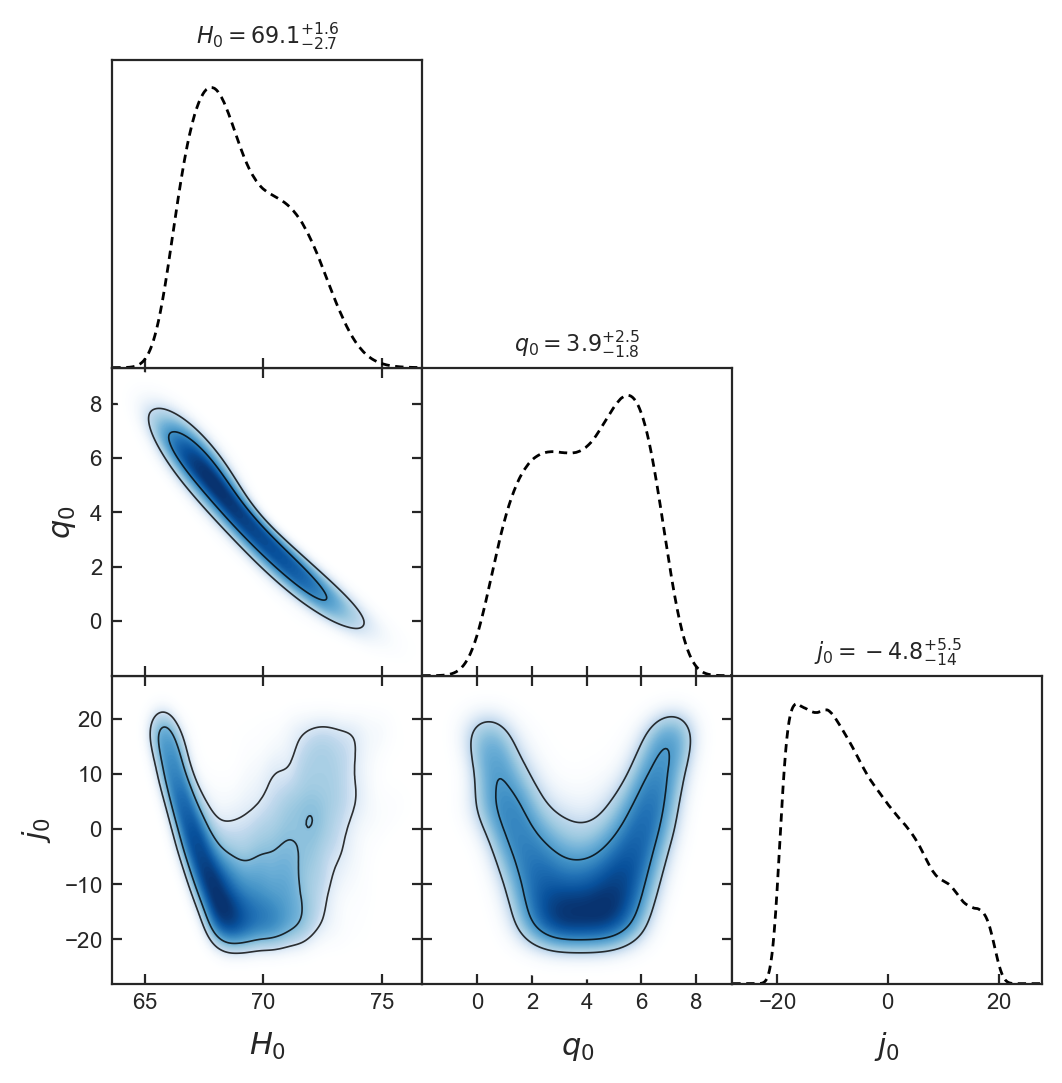

H0, q0, j0
68%
----------------------------
H_0 = 69.1^{+1.6}_{-2.7}
q_0 = 3.9^{+2.5}_{-1.8}
j_0 = -4.8^{+5.5}_{-14}
----------------------------
95%
----------------------------
H_0 = 69.1^{+4.0}_{-3.4}
q_0 = 3.9^{+3.2}_{-3.6}
j_0 = -5^{+20}_{-15}
----------------------------


In [64]:
full_chain_df = pd.read_csv("mcmc_chain_all_three.csv")
full_samples = getdist.mcsamples.MCSamples(
    samples=full_chain_df.to_numpy(),
    names=["H0", "q0", "j0"],
    labels=["H_0", "q_0", "j_0"],
)
# full_samples.updateSettings({'contours': [0.68, 0.95, 0.99]})
# g_full.settings.num_plot_contours = 3
g_full = gdplt.getSubplotPlotter()
g_full.triangle_plot(full_samples, filled=False,colors=["black"], contour_args={"alpha": 0.8},title_limit=1, shaded=True, line_args=[
               {'ls': '--','lw':1, 'color':'black'}])
#plt.grid(visible=True, which='both', color='0.65',linestyle=':')
g_full.export('chain_three.png')
g_full.export('chain_three.pdf')
plt.show()
print ("H0, q0, j0")
print ("68%")
print ("----------------------------")
print(full_samples.getInlineLatex('H0',limit=1))
print(full_samples.getInlineLatex('q0',limit=1))
print(full_samples.getInlineLatex('j0',limit=1))
print ("----------------------------")
print ("95%")
print ("----------------------------")
print(full_samples.getInlineLatex('H0',limit=2))
print(full_samples.getInlineLatex('q0',limit=2))
print(full_samples.getInlineLatex('j0',limit=2))
print ("----------------------------")

In [65]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(6000, 3)


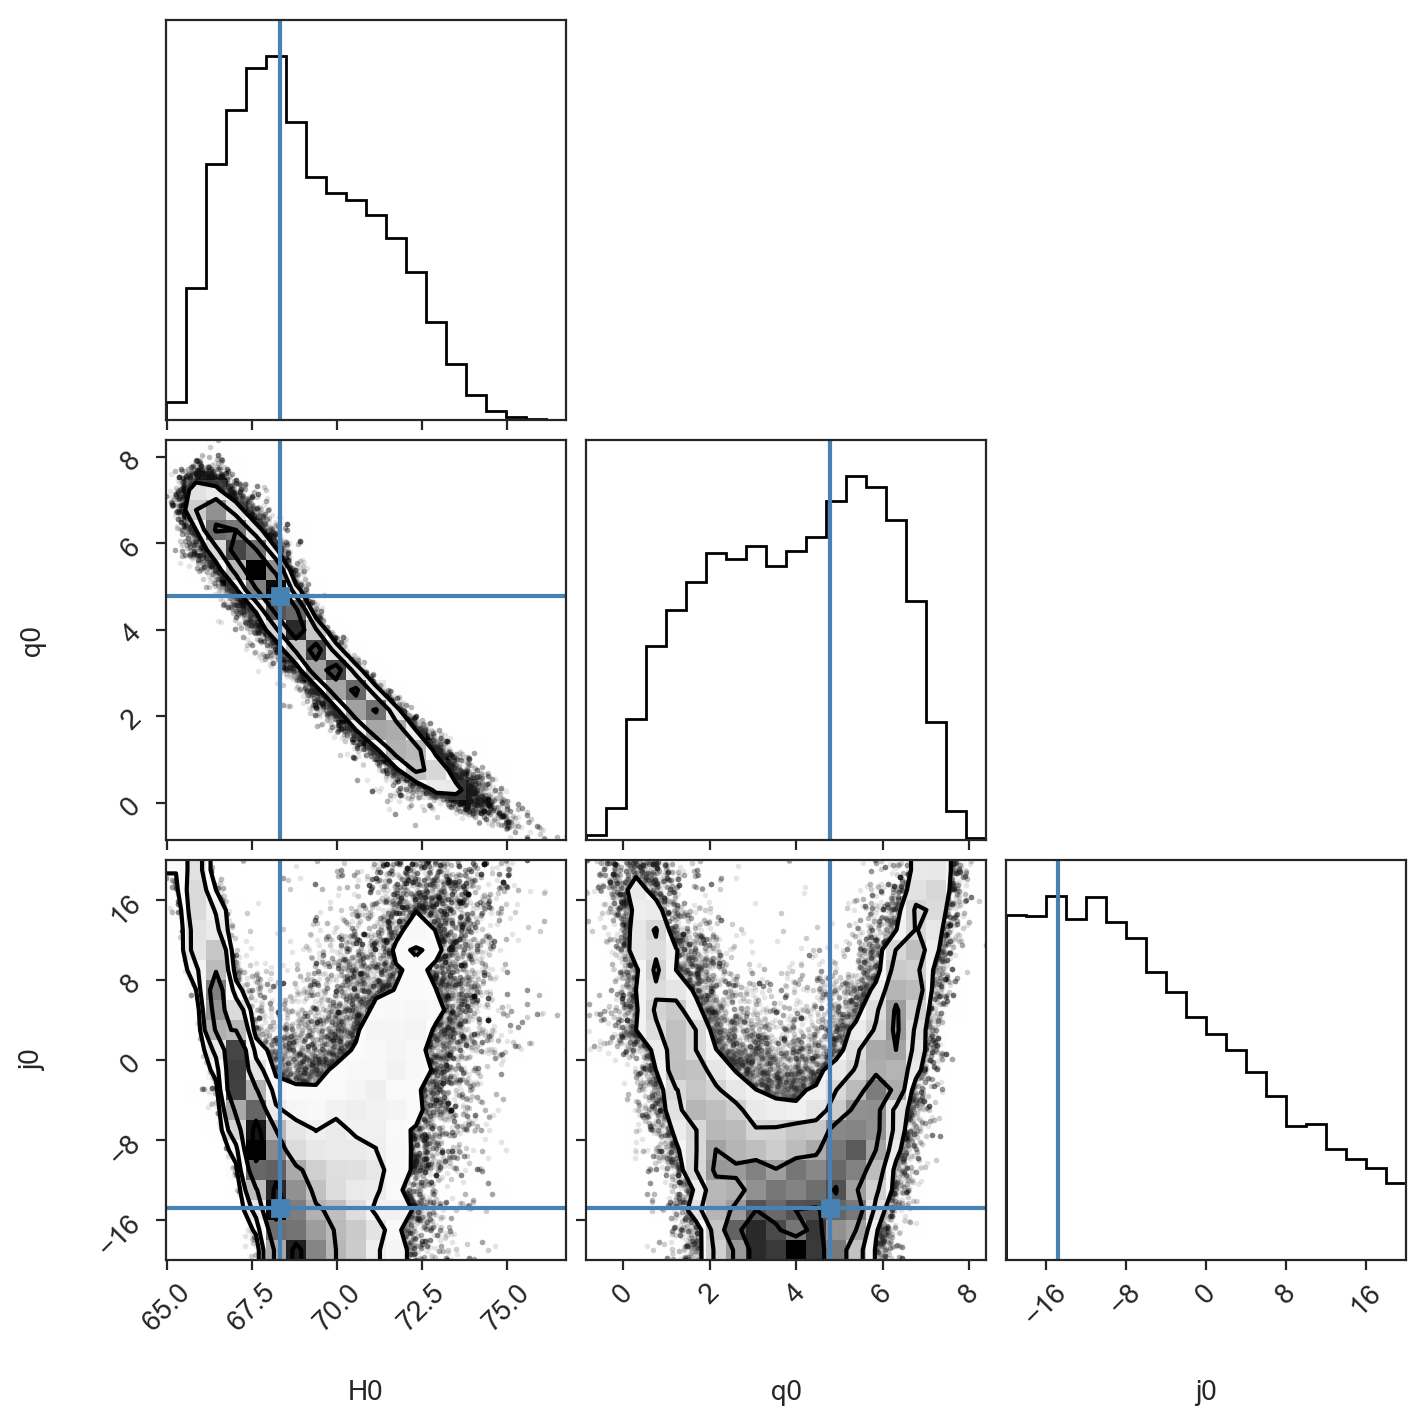

In [66]:
import corner

labels = ['H0', 'q0', 'j0']
corner_data = np.vstack((samples[:, 0], samples[:, 1], samples[:, 2])).T
fig = corner.corner(corner_data, labels=labels, truths=[H0_fit, q0_fit, j0_fit])

# Show the corner plot
plt.show()

In [67]:
for i in range(3):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

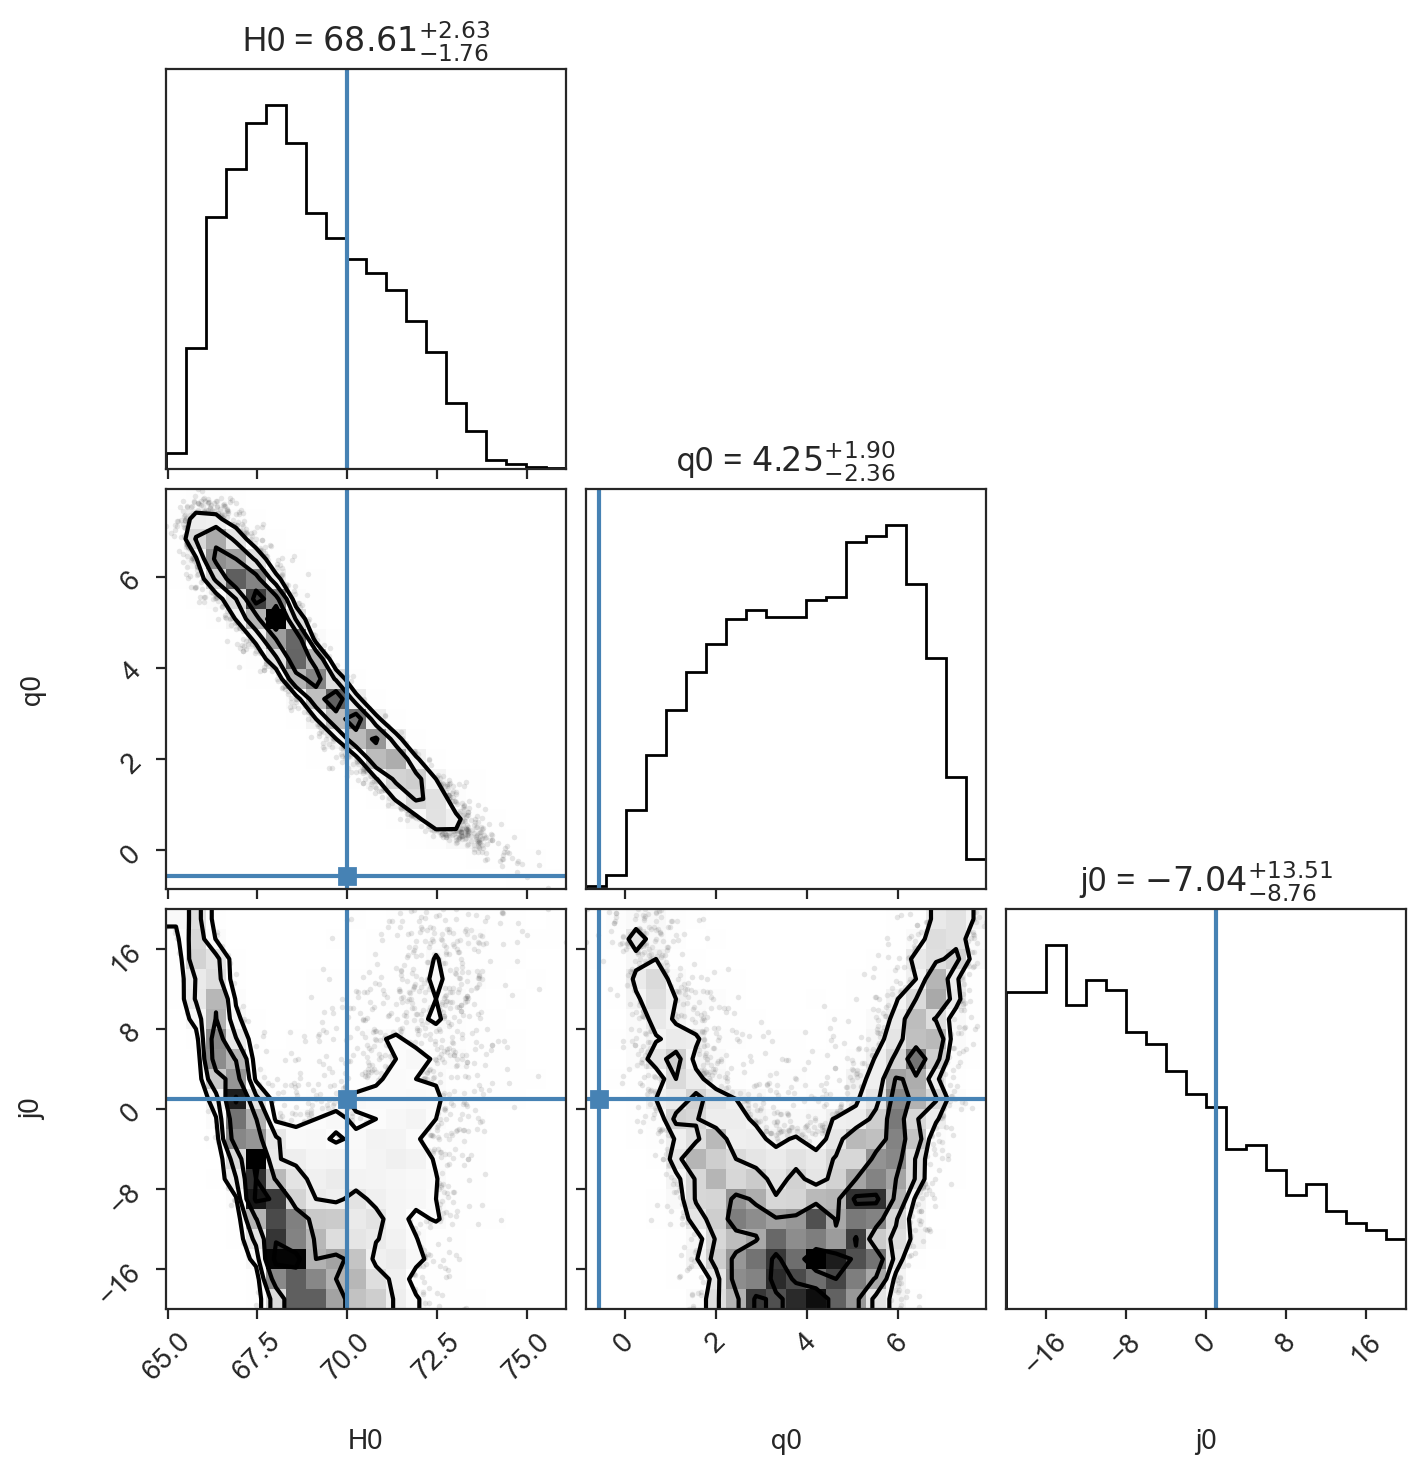

In [68]:
fig = corner.corner(
    flat_samples, labels=labels, truths=initial_parameters, show_titles=True,color='k')

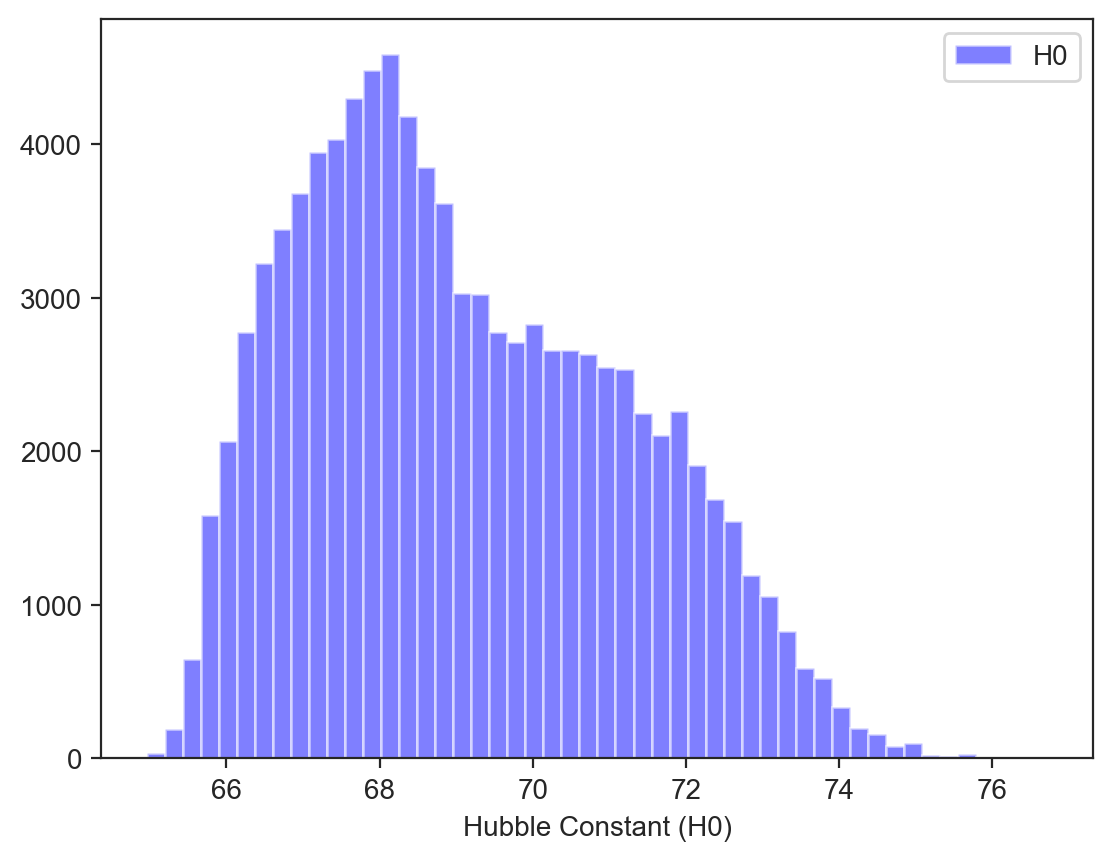

In [69]:
plt.figure()
plt.hist(samples[:, 0], bins=50, color="b", alpha=0.5, label="H0")
plt.xlabel("Hubble Constant (H0)")
plt.legend()
plt.show()

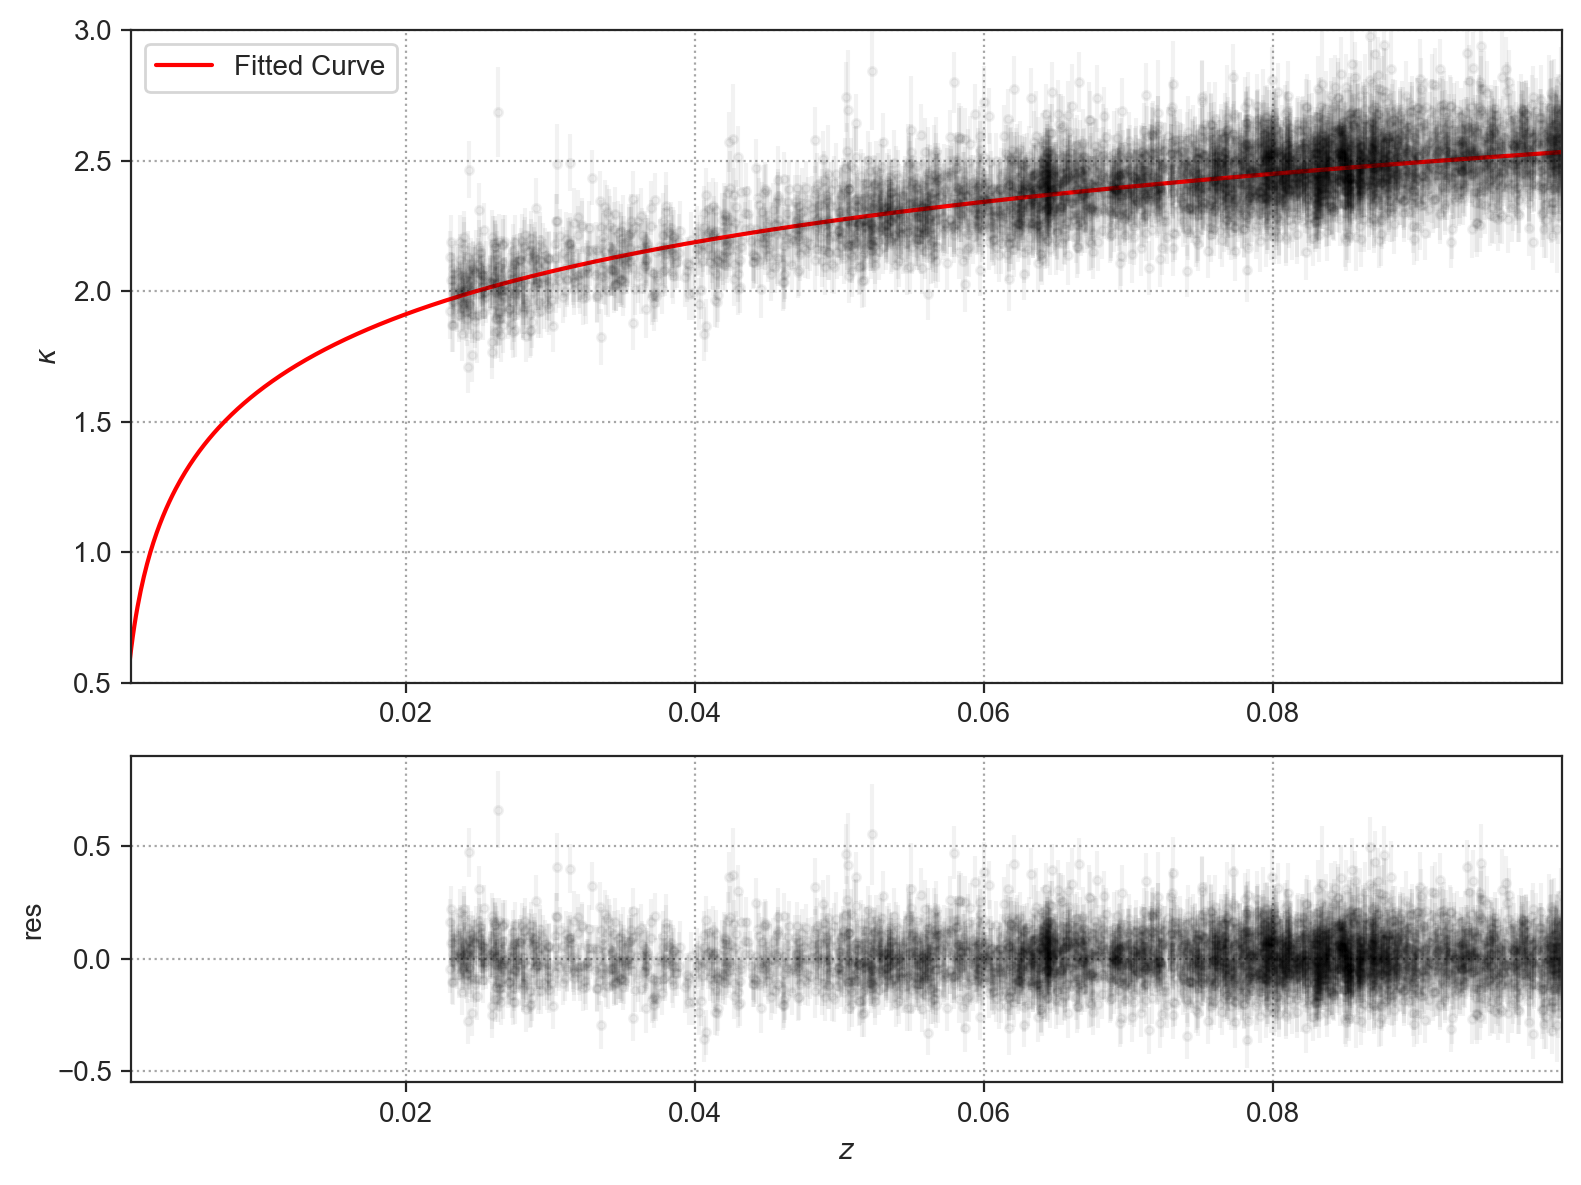

In [70]:
cosmo_cal = FlatLambdaCDM(H0=73. * u.km / u.s / u.Mpc, Om0=0.31)
da_pred_cal = cosmo_cal.angular_diameter_distance(x_fit).value
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])  # Adjust the height ratio here
#plt.xscale('log')
# Upper subplot for the Hubble diagram
ax1 = plt.subplot(gs[0])
#ax1.set_xscale('log')
ax1.errorbar(fuji_pv_highz.zcmb,fuji_pv_highz.mu_a_cal,yerr=fuji_pv_highz.mu_a_err,fmt=".k",alpha=0.05)
ax1.grid(visible=True, which='both', color='0.65',linestyle=':')
x_fit = np.linspace(0.0001,0.11,1000)
y_fit_highz = linear(x_fit, a_fit_highz,b_fit_highz)
#ax1.plot(x_fit,y_fit_highz,'r-',label='Linear Fit')
#ax1.plot(x_fit, y_fit_p(x_fit),'k-.', label=f'Polynomial Fit (Degree {degree})')

fitted_k_modulus = k_modulus(x_fit, H0_fit_mc, q0_fit_mc, j0_fit_mc)


res_fit_mcmc = fuji_pv_highz.mu_a_cal - k_modulus(fuji_pv_highz.zcmb, H0_fit_mc, q0_fit_mc, j0_fit_mc)
ax1.plot(x_fit, fitted_k_modulus, label='Fitted Curve', color='r')

#ax1.plot(x_fit, np.log10(da_pred_cal),'b--',label=f'Prediction')
#plt.xlabel(r'$z_{mod}$')
ax1.set_ylabel(r'$\kappa$')
ax1.legend()
ax1.set_xlim(0.001,np.max(fuji_pv.zcmb))
ax1.set_ylim(.5,3.0)

# Lower subplot for residuals
ax2 = plt.subplot(gs[1])
#ax2.set_xscale('log')
ax2.errorbar(fuji_pv_highz.zcmb, res_fit_mcmc,yerr=fuji_pv_highz.mu_a_err,fmt=".k",alpha=0.05)
ax2.grid(visible=True, which='both', color='0.65',linestyle=':')
# x_fit = np.linspace(0.0,0.11,100)
y_fit1 = linear(x_fit, a_fit1,b_fit1)
#ax2.plot(x_fit,y_fit1,'r-',label='Linear Fit')
# ax.plot(x_fit, y_fit_p(x_fit),'b--', label=f'Polynomial Fit (Degree {degree})')

ax2.set_xlabel(r'$z$')
ax2.set_ylabel(r'res')
ax2.set_xlim(0.001,np.max(fuji_pv.zcmb))
#ax2.legend()
#plt.xscale('log')
plt.tight_layout()
#plt.suptitle('Hubble Diagram and Residuals')
plt.show()

In [71]:
fixed_q0 = -0.535
fixed_j0 = 1.

def modified_k_modulus(z, H0):
    return k_modulus(z, H0, fixed_q0, fixed_j0)

initial_guess = [50.]

params_mod, cov_mod = curve_fit(modified_k_modulus, x0, y0, p0=initial_guess, sigma=err0)

H0_fit_mod = params_mod
H0_uncertainty_mod = cov_mod

print(np.round(H0_fit_mod[0],2),"+/-",np.round(H0_uncertainty_mod[0][0],2))

n = len(x0)
residuals = y0 - modified_k_modulus(x0, H0_fit_mod)
chi2_value = np.sum((residuals / err0) ** 2)
dof = n - 1 
alpha = 0.05

uncertainty = np.sqrt(np.sum(residuals**2) / dof)

reduced_chi2 = chi2_value / dof

print(f'Fitted Hubble Constant (H0): {np.round(H0_fit_mod,2)} km/s/Mpc')
print(f'Uncertainty (standard error): {uncertainty:.2f}')
print(f'Reduced Chi-squared: {reduced_chi2:.2f}')

76.02 +/- 0.09
Fitted Hubble Constant (H0): [76.02] km/s/Mpc
Uncertainty (standard error): 0.12
Reduced Chi-squared: 1.02


In [72]:
def log_likelihood(params, x, y, yerr):
    H0 = params
    model = k_modulus(x, H0, fixed_q0, fixed_j0)
    chi_squared = ((y - model) / yerr) ** 2
    return -0.5 * np.sum(chi_squared)

def log_prior(params):
    H0 = params
    if 50 <= H0 <= 100:
        return 0.0
    return -np.inf

def log_posterior(params, x, y, yerr):
    log_prior_result = log_prior(params)
    if not np.isfinite(log_prior_result):
        return -np.inf
    return log_prior_result + log_likelihood(params, x, y, yerr)

nwalkers = 100
nsteps = 1000

fixed_q0 = -0.55
fixed_j0 = 1.0

initial_parameters = np.array([70.])  # H0

p0 = [initial_parameters + 1e-3 * np.random.randn(1) for _ in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, 1, log_posterior, args=(x0, y0, err0))

with tqdm(total=nsteps, desc="Running MCMC") as pbar:
    for _ in sampler.sample(p0, iterations=nsteps):
        pbar.update(1)

samples = sampler.chain[:, 50:, :].reshape((-1, 1))
H0_fit_mc_only = np.median(samples)
H0_uncertainty_mc_only = np.std(samples)

print(f'Fitted Hubble Constant (H0): {H0_fit_mc_only:.2f} km/s/Mpc ± {H0_uncertainty_mc_only:.2f}')


Running MCMC: 100%|████████████████████████████████████████████| 1000/1000 [02:05<00:00,  7.99it/s]

Fitted Hubble Constant (H0): 76.06 km/s/Mpc ± 0.37


In [73]:
chain_df = pd.DataFrame(data=samples, columns=["H0"])
chain_df.to_csv("mcmc_chain_only_H0.csv", index=False)

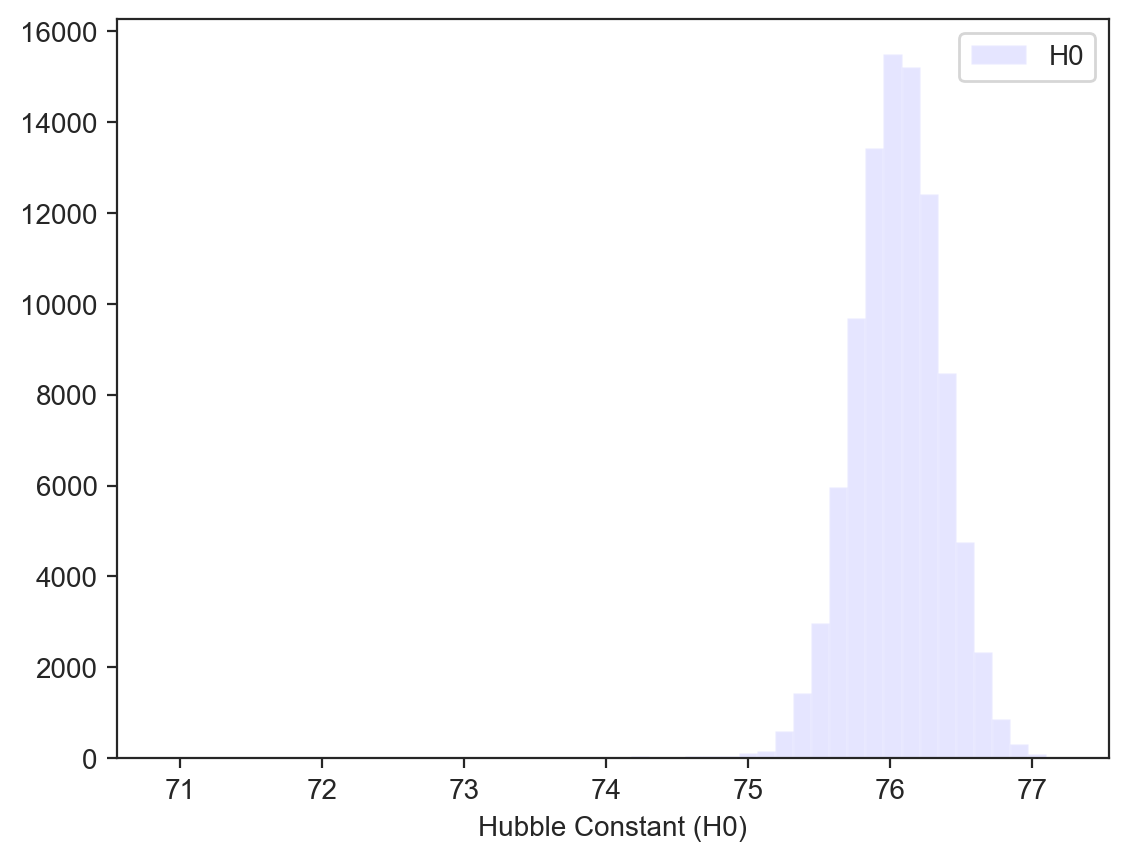

In [74]:
plt.figure()
plt.hist(samples[:, 0], bins=50, color="b", alpha=0.1, label="H0")
plt.xlabel("Hubble Constant (H0)")
plt.legend()
plt.show()

In [75]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
for i in range(1):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

In [76]:
H0_fitted = mcmc[1]

Removed no burn in


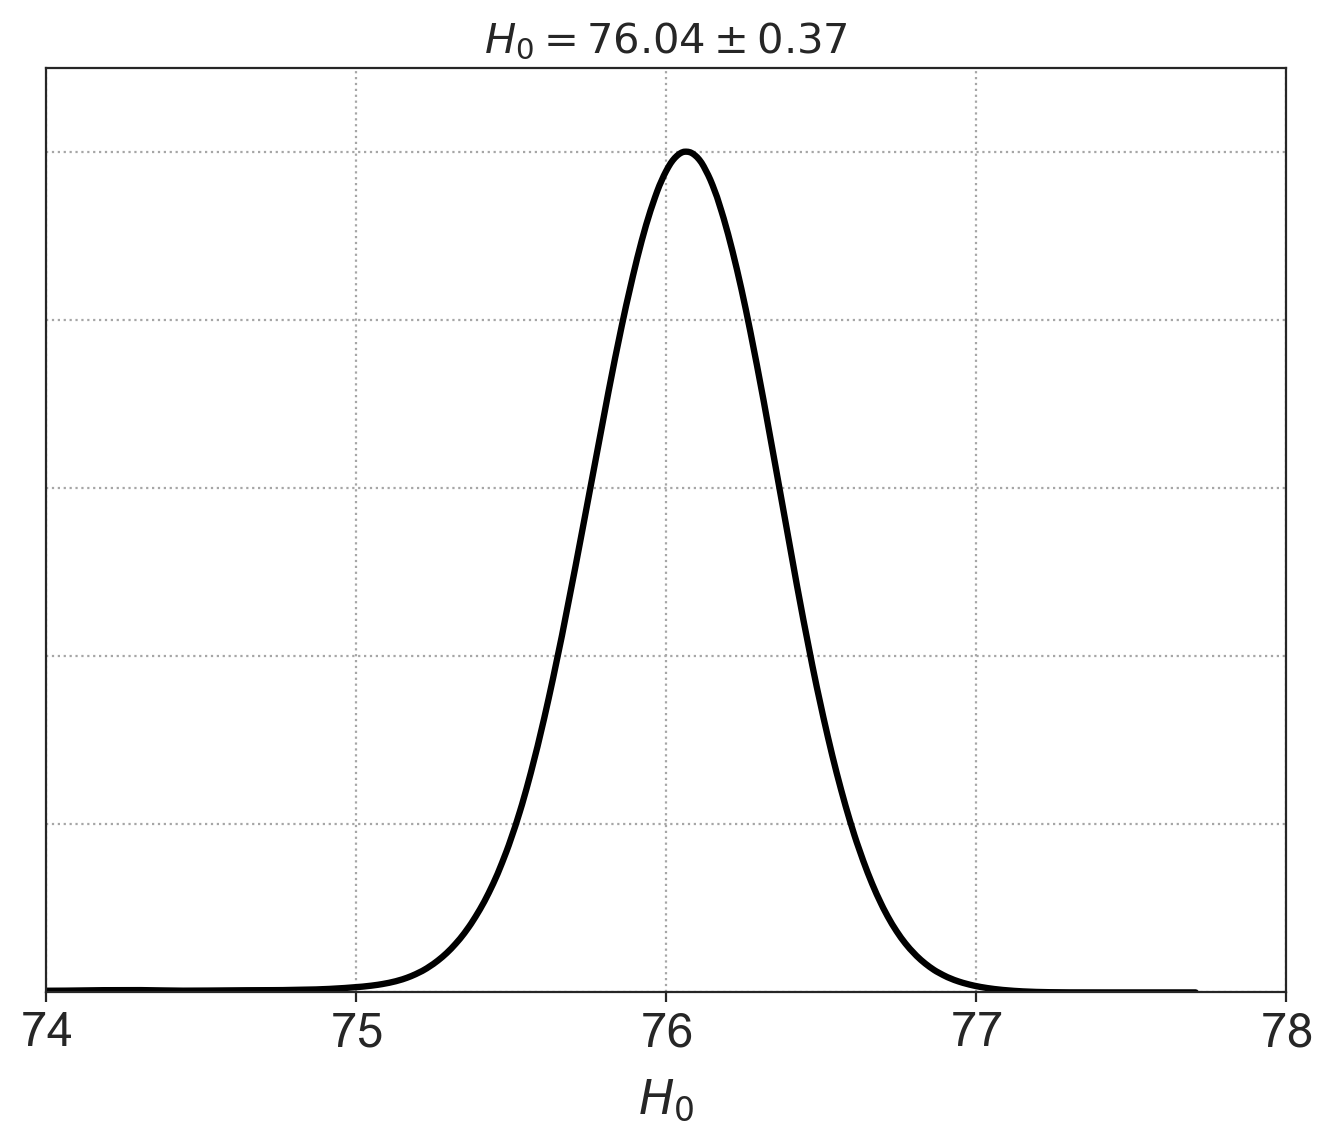

In [77]:
chain = pd.read_csv("mcmc_chain_only_H0.csv")
samples = getdist.mcsamples.MCSamples(
    samples=chain.to_numpy(),
    names=["H0"],
    labels=["H_0"],
)
g = gdplt.get_single_plotter(width_inch=8)
g.settings.title_limit_fontsize = 13
g.settings.legend_frac_subplot_margin =0.01
g.settings.axes_fontsize = 17
g.settings.lab_fontsize = 17
g.settings.title_limit_fontsize = 15
plt.grid(visible=True, which='both', color='0.65',linestyle=':')
g.plot_1d(samples, 'H0', title_limit=1,lims=[74.,78.])
g.export('H0_measured.pdf')

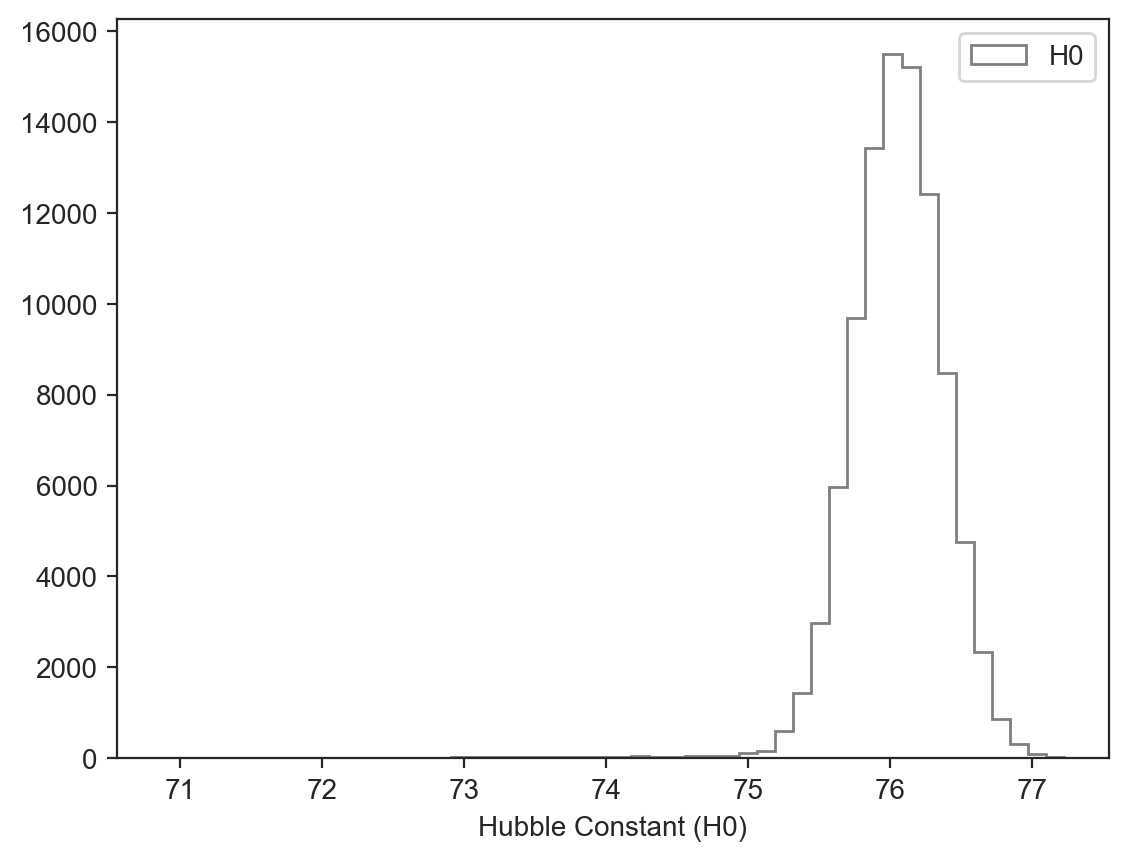

In [78]:
plt.figure()
plt.hist(chain['H0'], bins=50, color="black", alpha=0.5, histtype='step', label="H0")
plt.xlabel("Hubble Constant (H0)")
plt.legend()
plt.show()

In [79]:
print ("H0")
print ("68%")
print ("----------------------------")
print(samples.getInlineLatex('H0',limit=1))
print ("----------------------------")

H0
68%
----------------------------
H_0 = 76.04\pm 0.37
----------------------------


In [80]:
#H0_fitted = samples.getInlineLatex('H0',limit=1)[0]
print (H0_fitted)
res_fit_H0 = fuji_pv_highz.mu_a_cal - k_modulus(fuji_pv_highz.zcmb, H0_fitted, fixed_q0, fixed_j0)
params_H0, covariance_H0 = curve_fit(linear, fuji_pv_highz.zcmb, res_fit_H0, sigma=fuji_pv_highz.mu_a_err, absolute_sigma=True)
a_fit_H0, b_fit_H0 = params_H0
a_error_H0, b_error_H0 = np.sqrt(np.diag(covariance_H0))
print(f"Fit results:")
print(f"a = {a_fit_H0:.3f} +/- {a_error_H0:.3f}")
print(f"b = {b_fit_H0:.3f} +/- {b_error_H0:.3f}")

76.06378098923327
Fit results:
a = -0.338 +/- 0.084
b = 0.023 +/- 0.006


In [81]:
res_fit_H0_low = fuji_pv.mu_a_cal - k_modulus(fuji_pv.zcmb, H0_fitted, fixed_q0, fixed_j0)

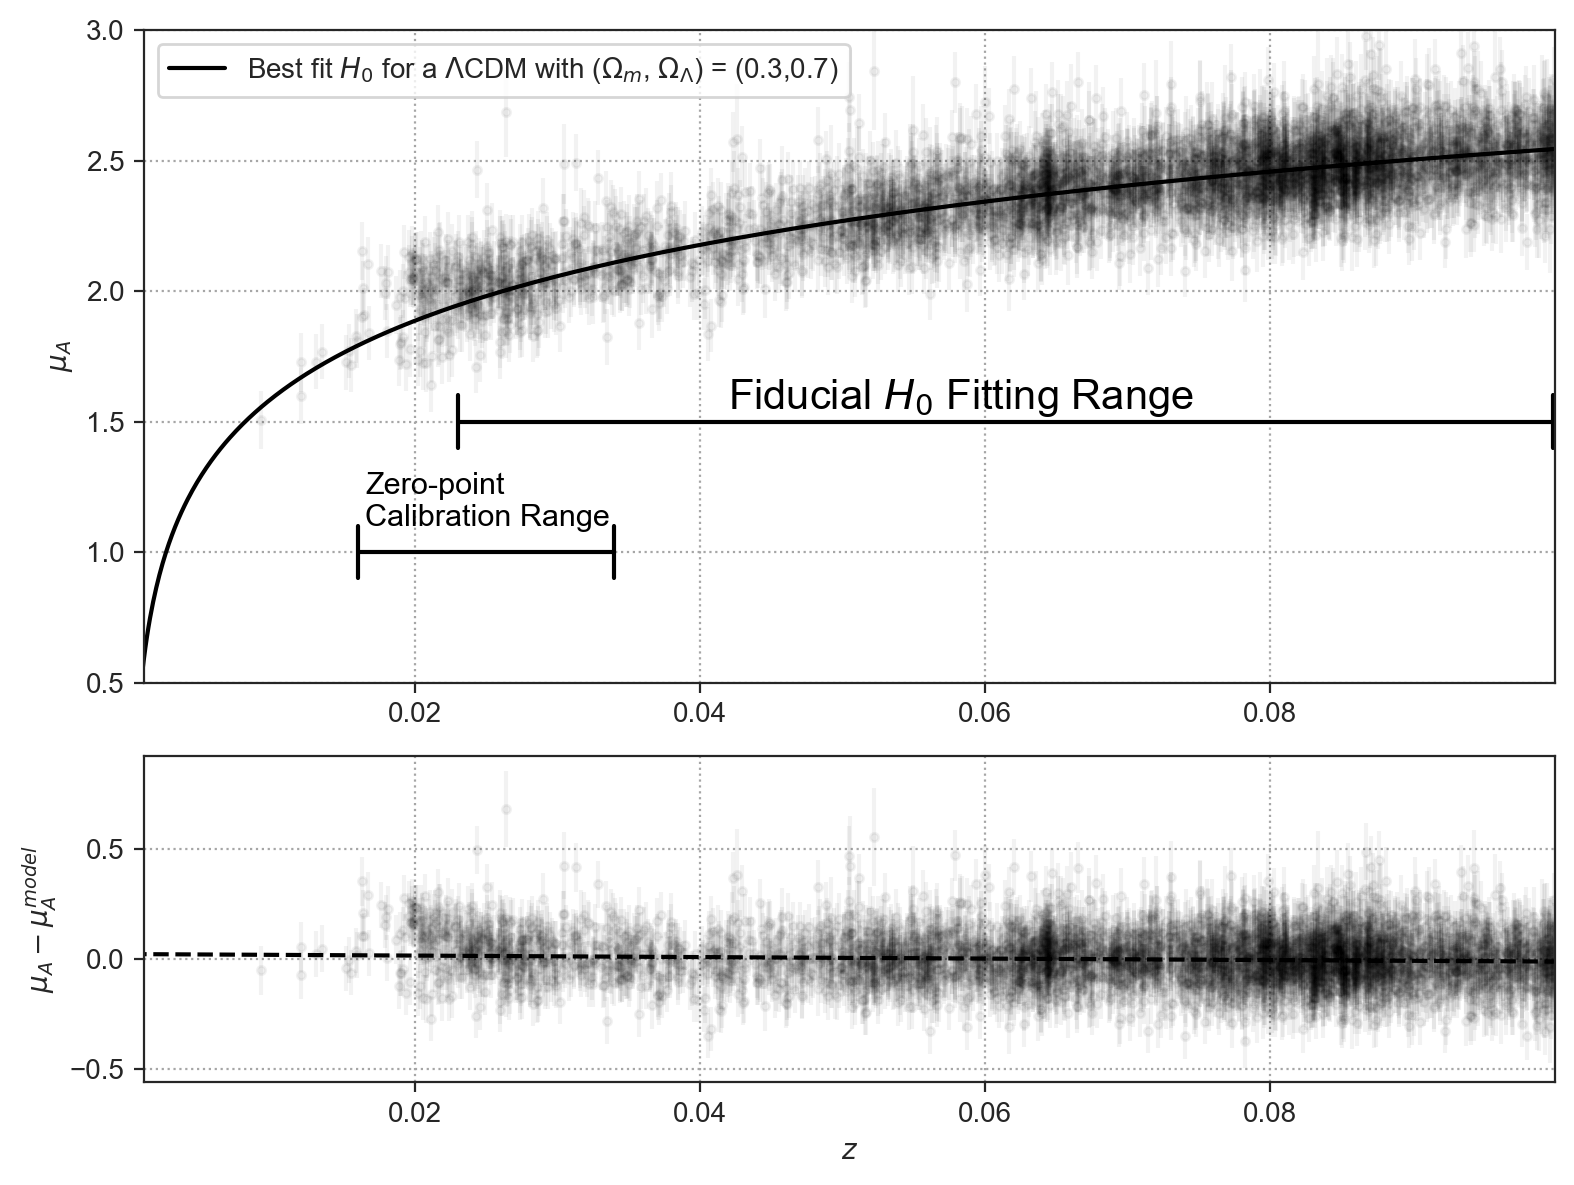

In [82]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])  # Adjust the height ratio here
ax1 = plt.subplot(gs[0])
#ax1.set_xscale('log')
ax1.errorbar(fuji_pv.zcmb,fuji_pv.mu_a_cal,yerr=fuji_pv.mu_a_err,fmt=".k",alpha=0.05)
ax1.grid(visible=True, which='both', color='0.65',linestyle=':')
x_fit = np.linspace(0.0001,0.11,1000)
y_fit_highz = linear(x_fit, a_fit_highz,b_fit_highz)
#ax1.plot(x_fit,y_fit_highz,'r-',label='Linear Fit')
#ax1.plot(x_fit, y_fit_p(x_fit),'k-.', label=f'Polynomial Fit (Degree {degree})')

fitted_k_modulus_only_H0 = k_modulus(x_fit, H0_fitted, fixed_q0, fixed_j0)

ax1.plot(x_fit, fitted_k_modulus_only_H0, label='Best fit $H_0$ for a $\Lambda$CDM with ($\Omega_m$, $\Omega_{\Lambda}$) = (0.3,0.7)', color='k')


fitted_k_modulus_all_three = k_modulus(x_fit, H0_fit_mc, q0_fit_mc, j0_fit_mc)
#ax1.plot(x_fit, fitted_k_modulus_all_three, label='Fitted all three parameters', color='b')

#ax1.plot(x_fit, np.log10(da_pred_cal),'b--',label=f'Prediction')
#plt.xlabel(r'$z_{mod}$')

ax1.plot([0.023,0.0999],[1.5,1.5],'-k',lw=1.5)
ax1.plot([0.023,0.023],[1.4,1.6],'-k',lw=1.5)
ax1.plot([0.0999,0.0999],[1.4,1.6],'-k',lw=1.5)
ax1.text(0.042,1.55,"Fiducial $H_0$ Fitting Range",color='k',size=15) #, fontname = 'Times New Roman'

ax1.plot([0.016,0.034],[1.0,1.0],'-k',lw=1.5)
ax1.plot([0.016,0.016],[0.9,1.1],'-k',lw=1.5)
ax1.plot([0.034,0.034],[0.9,1.1],'-k',lw=1.5)
ax1.text(0.0165,1.1,"Zero-point\nCalibration Range",color='k',size=11) #, fontname = 'Times New Roman'

ax1.set_ylabel(r'$\mu_{A}$')
ax1.legend()
ax1.set_xlim(0.001,np.max(fuji_pv.zcmb))
ax1.set_ylim(0.5,3.0)



# Lower subplot for residuals
ax2 = plt.subplot(gs[1])
#ax2.set_xscale('log')
ax2.errorbar(fuji_pv.zcmb, res_fit_H0_low,yerr=fuji_pv.mu_a_err,fmt=".k",alpha=0.05)
ax2.grid(visible=True, which='both', color='0.65',linestyle=':')
# x_fit = np.linspace(0.0,0.11,100)
y_fit1 = linear(x_fit, a_fit_H0,b_fit_H0)
ax2.plot(x_fit,y_fit1,'k--',label='Linear Fit')
# ax.plot(x_fit, y_fit_p(x_fit),'b--', label=f'Polynomial Fit (Degree {degree})')

ax2.set_xlabel(r'$z$')
ax2.set_ylabel(r'$\mu_{A} - \mu_{A}^{model}$')
ax2.set_xlim(0.001,np.max(fuji_pv.zcmb))
#ax2.legend()
#plt.xscale('log')
plt.tight_layout()
#plt.suptitle('Hubble Diagram and Residuals')
plt.savefig('Hubble_diagram.pdf')
plt.show()

In [83]:
print (H0_fitted, fixed_q0, fixed_j0)
print (H0_fit_mc, q0_fit_mc, j0_fit_mc)

76.06378098923327 -0.55 1.0
68.75522303714617 4.067252127550641 -6.579209026581701


In [84]:
n = len(fuji_pv.mu_a_err)
residuals = res_fit_H0_low
chi2_value = np.sum((residuals / fuji_pv.mu_a_err) ** 2)
dof = n - 1 

uncertainty = np.sqrt(np.sum(residuals**2) / dof)

reduced_chi2 = chi2_value / dof

print(f'Reduced Chi-squared: {reduced_chi2:.2f}')

Reduced Chi-squared: 1.05


In [85]:
chain_sbf = pd.read_csv("mcmc_chain_only_H0.csv")
samples_sbf = getdist.mcsamples.MCSamples(
    samples=chain_sbf.to_numpy(),
    names=["H0"],
    labels=["H_0"],
)


chain_trgb = pd.read_csv("mcmc_chain_only_H0_trgb.csv")
samples_trgb = getdist.mcsamples.MCSamples(
    samples=chain_trgb.to_numpy(),
    names=["H0"],
    labels=["H_0"],
)

# chain_10percentsigma = pd.read_csv("mcmc_chain_only_H0_10percentsigma.csv")
# samples_10percentsigma = getdist.mcsamples.MCSamples(
#     samples=chain_10percentsigma.to_numpy(),
#     names=["H0"],
#     labels=["H_0"],
# )

chain_spiralsinFP = pd.read_csv("mcmc_chain_only_H0_spiralsinFP.csv")
samples_spiralsinFP = getdist.mcsamples.MCSamples(
    samples=chain_spiralsinFP.to_numpy(),
    names=["H0"],
    labels=["H_0"],
)

chain_corr_sigma_to_sdss = pd.read_csv("mcmc_chain_only_H0_corr_sigma_to_sdss.csv")
samples_corr_sigma_to_sdss = getdist.mcsamples.MCSamples(
    samples=chain_corr_sigma_to_sdss.to_numpy(),
    names=["H0"],
    labels=["H_0"],
)

chain_z_0034 = pd.read_csv("mcmc_chain_only_H0_z_0034.csv")
samples_z_0034 = getdist.mcsamples.MCSamples(
    samples=chain_z_0034.to_numpy(),
    names=["H0"],
    labels=["H_0"],
)

chain_z_001 = pd.read_csv("mcmc_chain_only_H0_z_001.csv")
samples_z_001 = getdist.mcsamples.MCSamples(
    samples=chain_z_001.to_numpy(),
    names=["H0"],
    labels=["H_0"],
)

chain_sbf_w_cal_err = pd.read_csv("mcmc_chain_only_H0_w_cal_err.csv")
samples_sbf_w_cal_err = getdist.mcsamples.MCSamples(
    samples=chain_sbf_w_cal_err.to_numpy(),
    names=["H0"],
    labels=["H_0"],
)

chain_sbf_minus_cal_err = pd.read_csv("mcmc_chain_only_H0_minus_cal_err.csv")
samples_sbf_minus_cal_err = getdist.mcsamples.MCSamples(
    samples=chain_sbf_minus_cal_err.to_numpy(),
    names=["H0"],
    labels=["H_0"],
)

chain_sbf_plus_cal_err = pd.read_csv("mcmc_chain_only_H0_plus_cal_err.csv")
samples_sbf_plus_cal_err = getdist.mcsamples.MCSamples(
    samples=chain_sbf_plus_cal_err.to_numpy(),
    names=["H0"],
    labels=["H_0"],
)

chain_sbf_zhd = pd.read_csv("mcmc_chain_only_H0_zhd.csv")
samples_sbf_zhd = getdist.mcsamples.MCSamples(
    samples=chain_sbf_zhd.to_numpy(),
    names=["H0"],
    labels=["H_0"],
)



chain_spiralsinFP_no = pd.read_csv("mcmc_chain_only_H0_no_spirals_anywhere.csv")
samples_spiralsinFP_no = getdist.mcsamples.MCSamples(
    samples=chain_spiralsinFP_no.to_numpy(),
    names=["H0"],
    labels=["H_0"],
)



Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


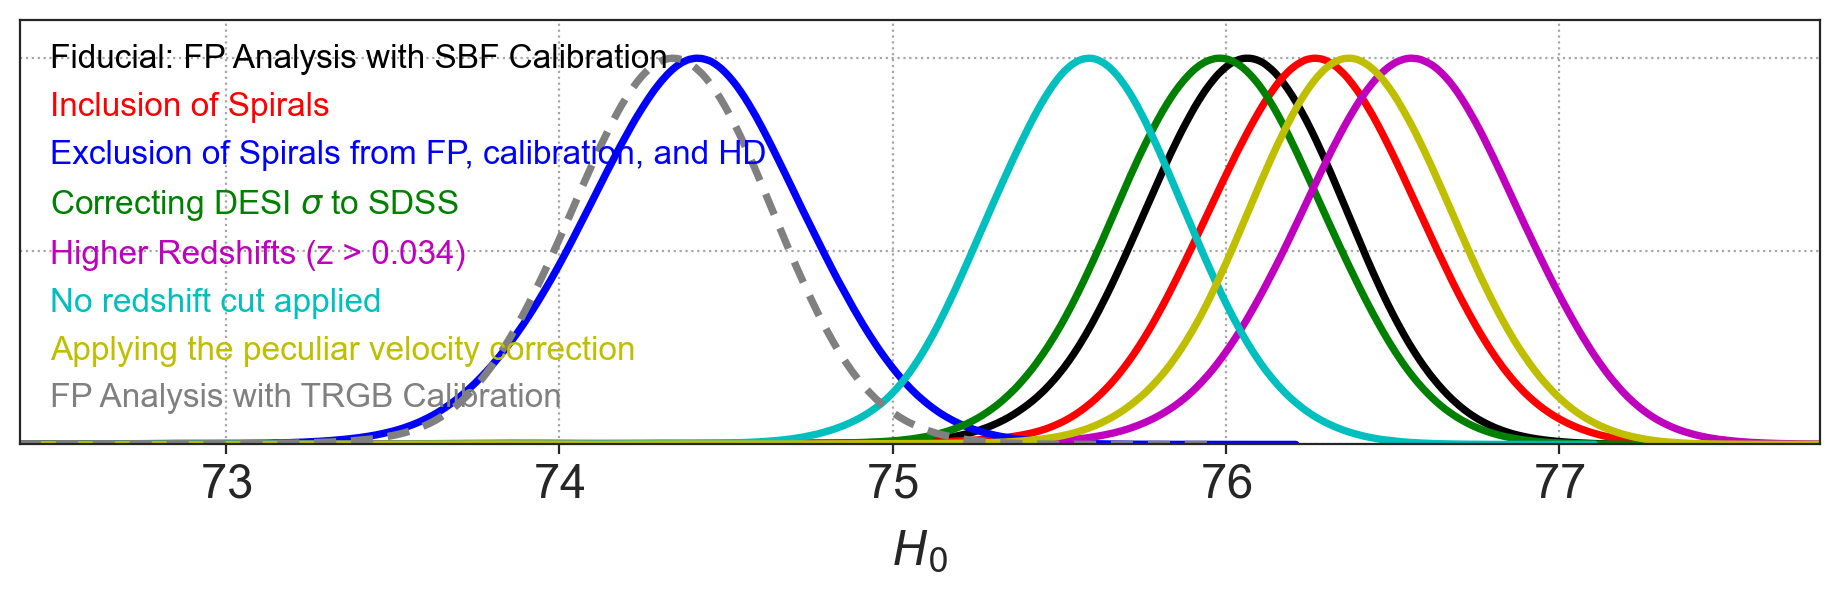

In [86]:
# 1D marginalized comparison plot
g = gdplt.get_single_plotter(width_inch=9.3,ratio=1. / 3.)
g.settings.title_limit_fontsize = 13
g.settings.legend_frac_subplot_margin =0.01

# g.settings.alpha_filled_add = 0.1
# #g.settings.figure_legend_frame = False
# g.settings.fig_width_inch = 20
# #g.settings.fig_ratio = 3
# g.settings.axes_fontsize = 17
# g.settings.lab_fontsize = 17
g.settings.axes_fontsize = 17
g.settings.lab_fontsize = 17
g.settings.title_limit_fontsize = 15
g.plot_1d([samples_sbf, samples_spiralsinFP, samples_spiralsinFP_no, samples_corr_sigma_to_sdss, samples_z_0034, samples_z_001, samples_sbf_zhd, samples_trgb], 'H0', colors=['','','','','','','','grey'], ls=['-','-','-','-','-','-','-','--'], title_limit=None)
g.add_legend(['Fiducial: FP Analysis with SBF Calibration', 'Inclusion of Spirals', 'Exclusion of Spirals from FP, calibration, and HD', 'Correcting DESI $\sigma$ to SDSS', 'Higher Redshifts (z > 0.034)', 'No redshift cut applied', 'Applying the peculiar velocity correction', 'FP Analysis with TRGB Calibration'], colored_text=True)
plt.grid(visible=True, which='both', color='0.65',linestyle=':')
g.export('H0_sys_FP.pdf')

add a plot for the trend with redshift see Riess et al.

In [87]:
print (chain_z_001["H0"])

0        75.507221
1        75.345478
2        75.328259
3        75.669448
4        75.437694
           ...    
94995    75.115901
94996    75.027752
94997    74.955709
94998    74.955709
94999    74.955709
Name: H0, Length: 95000, dtype: float64


In [88]:
fiducial_chain = chain_sbf["H0"]
chain_1 = chain_spiralsinFP["H0"]
chain_2 = chain_spiralsinFP_no["H0"]
chain_3 = chain_corr_sigma_to_sdss["H0"]
chain_4 = chain_z_0034["H0"]
chain_5 = chain_z_001["H0"]
#chain_5 = chain_trgb["H0"]
chain_6 = chain_sbf_zhd["H0"]
#chain_7 = chain_sbf_plus_cal_err["H0"]
#chain_7 = chain_spiralsinFP_no["H0"]

central_value = np.mean(fiducial_chain)
statistical_error = np.std(fiducial_chain)

systematic_errors = [np.std(chain - fiducial_chain) for chain in [chain_1, chain_2, chain_3, chain_4, chain_5, chain_6]]
print(systematic_errors)
systematic_error_combined = np.sqrt(np.mean(np.array(systematic_errors) ** 2))
print(np.mean(systematic_errors))
print(f"Central Value: {central_value:.4f}")
print(f"Statistical Error: {statistical_error:.4f}")
print(f"Systematic Error (Combined): {systematic_error_combined:.4f}")
print(f"Combined: {np.sqrt(statistical_error*statistical_error + systematic_error_combined*systematic_error_combined):.4f}")

[0.48446412875681477, 0.4934097651619208, 0.4716561682121841, 0.48782988135574357, 0.46640123235335734, 0.4697116782113735]
0.478912142341899
Central Value: 76.0387
Statistical Error: 0.3682
Systematic Error (Combined): 0.4790
Combined: 0.6042


In [89]:
central_value = np.mean(fiducial_chain)
statistical_error = np.std(fiducial_chain)

systematic_errors = [np.std(chain - fiducial_chain) for chain in [chain_1, chain_2, chain_3, chain_4, chain_5,chain_6]]

print(f"Central Value: {central_value:.4f}")
print(f"Statistical Error: {statistical_error:.4f}")
print("Systematic Errors:")
for i, error in enumerate(systematic_errors):
    print(f"Chain {i + 1}: {error:.4f}")

Central Value: 76.0387
Statistical Error: 0.3682
Systematic Errors:
Chain 1: 0.4845
Chain 2: 0.4934
Chain 3: 0.4717
Chain 4: 0.4878
Chain 5: 0.4664
Chain 6: 0.4697


In [90]:
sys_1 = (np.mean(fiducial_chain) - np.mean(chain_1))
sys_2 = (np.mean(fiducial_chain) - np.mean(chain_2))
sys_3 = (np.mean(fiducial_chain) - np.mean(chain_3))
sys_4 = (np.mean(fiducial_chain) - np.mean(chain_4))
sys_5 = (np.mean(fiducial_chain) - np.mean(chain_5))
sys_6 = (np.mean(fiducial_chain) - np.mean(chain_6))
#sys_7 = (np.mean(fiducial_chain) - np.mean(chain_7))
print(sys_1, sys_2, sys_3, sys_4, sys_5, sys_6)#, sys_7)
#print(np.sqrt(sys_1**2 + sys_2**2 + sys_3**2 + sys_4**2))

-0.20541760125141195 1.644773996904334 0.06848490291341136 -0.4991692465124231 0.45917889474576157 -0.32571878871972615


In [91]:
print(len(fuji_pv))

4191


In [92]:
print(np.min(fuji_pv.zcmb))

0.009221486530079


In [93]:
print((3.*0.3/2.)-1.)

-0.55


In [94]:
print ("H0")
print ("68%")
print ("----------------------------")
print(samples.getInlineLatex('H0',limit=1))
print(samples_spiralsinFP.getInlineLatex('H0',limit=1))
print(samples_corr_sigma_to_sdss.getInlineLatex('H0',limit=1))
print(samples_z_0034.getInlineLatex('H0',limit=1))
print(samples_z_001.getInlineLatex('H0',limit=1))
print(samples_sbf_zhd.getInlineLatex('H0',limit=1))
print(samples_trgb.getInlineLatex('H0',limit=1))
print ("----------------------------")

H0
68%
----------------------------
H_0 = 76.04\pm 0.37
H_0 = 76.24\pm 0.39
H_0 = 75.97\pm 0.34
H_0 = 76.54\pm 0.36
H_0 = 75.58\pm 0.32
H_0 = 76.36\pm 0.33
H_0 = 74.33\pm 0.31
----------------------------


In [95]:
print (0.04540739161989308/(np.log(10.0)*0.7142552976791121))

0.027609427164513735


In [96]:
# Assuming you have your chains stored as CSV files
fiducial_chain_file = 'mcmc_chain_only_H0.csv'  # Replace with the actual file name
systematic_chain_files = ['mcmc_chain_only_H0_spiralsinFP.csv', 'mcmc_chain_only_H0_no_spirals_anywhere.csv', 
                          'mcmc_chain_only_H0_corr_sigma_to_sdss.csv',
                           'mcmc_chain_only_H0_z_0034.csv', 'mcmc_chain_only_H0_z_001.csv', 'mcmc_chain_only_H0_zhd.csv']

# Load chains from CSV files
fiducial_chain = pd.read_csv(fiducial_chain_file)['H0'].values
systematic_chains = [pd.read_csv(file)['H0'].values for file in systematic_chain_files]

# Calculate statistical errors from fiducial chain
mean_fiducial = np.mean(fiducial_chain)
std_fiducial = np.std(fiducial_chain)

print(f"Statistical Errors from Fiducial Chain:")
print(f"Mean: {mean_fiducial}")
print(f"Standard Deviation: {std_fiducial}")

# Calculate systematic errors from other six chains
systematic_errors = []

for i, sys_chain in enumerate(systematic_chains, start=1):
    mean_sys_chain = np.mean(sys_chain)
    systematic_error = mean_sys_chain - mean_fiducial
    systematic_errors.append(systematic_error)

    print(f"\nSystematic Errors from Chain {i}:")
    print(f"Mean: {mean_sys_chain}")
    print(f"Systematic Error: {systematic_error}")

    
# Calculate combined systematic error (RMS of individual systematic errors)
combined_systematic_error = np.sqrt(np.sum(np.square(systematic_errors)))

print(f"\nCombined Systematic Error:")
print(f"Combined Systematic Error: {combined_systematic_error}")

# You can now use 'std_fiducial' for statistical errors and 'systematic_errors' for systematic errors.


Statistical Errors from Fiducial Chain:
Mean: 76.03867398331535
Standard Deviation: 0.36819898381680205

Systematic Errors from Chain 1:
Mean: 76.24409158456676
Systematic Error: 0.20541760125141195

Systematic Errors from Chain 2:
Mean: 74.39389998641101
Systematic Error: -1.644773996904334

Systematic Errors from Chain 3:
Mean: 75.97018908040194
Systematic Error: -0.06848490291341136

Systematic Errors from Chain 4:
Mean: 76.53784322982777
Systematic Error: 0.4991692465124231

Systematic Errors from Chain 5:
Mean: 75.57949508856959
Systematic Error: -0.45917889474576157

Systematic Errors from Chain 6:
Mean: 76.36439277203507
Systematic Error: 0.32571878871972615

Combined Systematic Error:
Combined Systematic Error: 1.8216135696388425


In [97]:
# import emcee
# from tqdm import tqdm

# def k_modulus_2(z, H0, q0):
#     return np.log10(c * z * ((1.) + ((1./2.)*(1. - q0) * z) ) ) - np.log10(H0) - 2. * np.log10(1 + z)

# def log_likelihood(params, x, y, yerr):
#     H0, q0 = params  # Remove j0 from the parameters
#     model = k_modulus_2(x, H0, q0)
#     chi_squared = ((y - model) / yerr) ** 2
#     return -0.5 * np.sum(chi_squared)

# def log_prior(params):
#     H0, q0 = params  # Remove j0 from the parameters
#     if 50 <= H0 <= 100 and -10 <= q0 <= 10:
#         return 0.0
#     return -np.inf

# def log_posterior(params, x, y, yerr):
#     log_prior_result = log_prior(params)
#     if not np.isfinite(log_prior_result):
#         return -np.inf
#     return log_prior_result + log_likelihood(params, x, y, yerr)

# nwalkers = 100
# nsteps = 1000

# initial_parameters = np.array([70., -0.55])  # H0, q0 without j0

# p0 = [initial_parameters + 1e-3 * np.random.randn(2) for _ in range(nwalkers)]

# sampler = emcee.EnsembleSampler(nwalkers, 2, log_posterior, args=(x0, y0, err0))

# sampler.run_mcmc(p0, nsteps, progress=True)

# samples = sampler.chain[:, 50:, :].reshape((-1, 2))
# H0_fit_mc_2, q0_fit_mc_2 = np.median(samples, axis=0)
# H0_uncertainty_mc_2, q0_uncertainty_mc_2 = np.std(samples, axis=0)

# print(f'Fitted Hubble Constant (H0): {H0_fit_mc_2:.2f} km/s/Mpc ± {H0_uncertainty_mc_2:.2f}')
# print(f'Fitted Deceleration Parameter (q0): {q0_fit_mc_2:.2f} ± {q0_uncertainty_mc_2:.2f}')

In [98]:
# chain_df = pd.DataFrame(data=samples, columns=["H0", "q0"])
# chain_df.to_csv("mcmc_chain_H0_q0.csv", index=False)

In [99]:
# chain = pd.read_csv("mcmc_chain_H0_q0.csv")

# import getdist.mcsamples
# samples = getdist.mcsamples.MCSamples(
#     samples=chain.to_numpy(),
#     names=["H0", "q0"],
#     labels=["H0", "q0"],
# )

# g = gdplt.getSubplotPlotter()
# g.triangle_plot(samples, filled=True, contour_args={"alpha": 0.8})
# plt.show()

Removed no burn in
Mean Value: 76.12244762311941
Statistical Error: 0.0006198242322366045


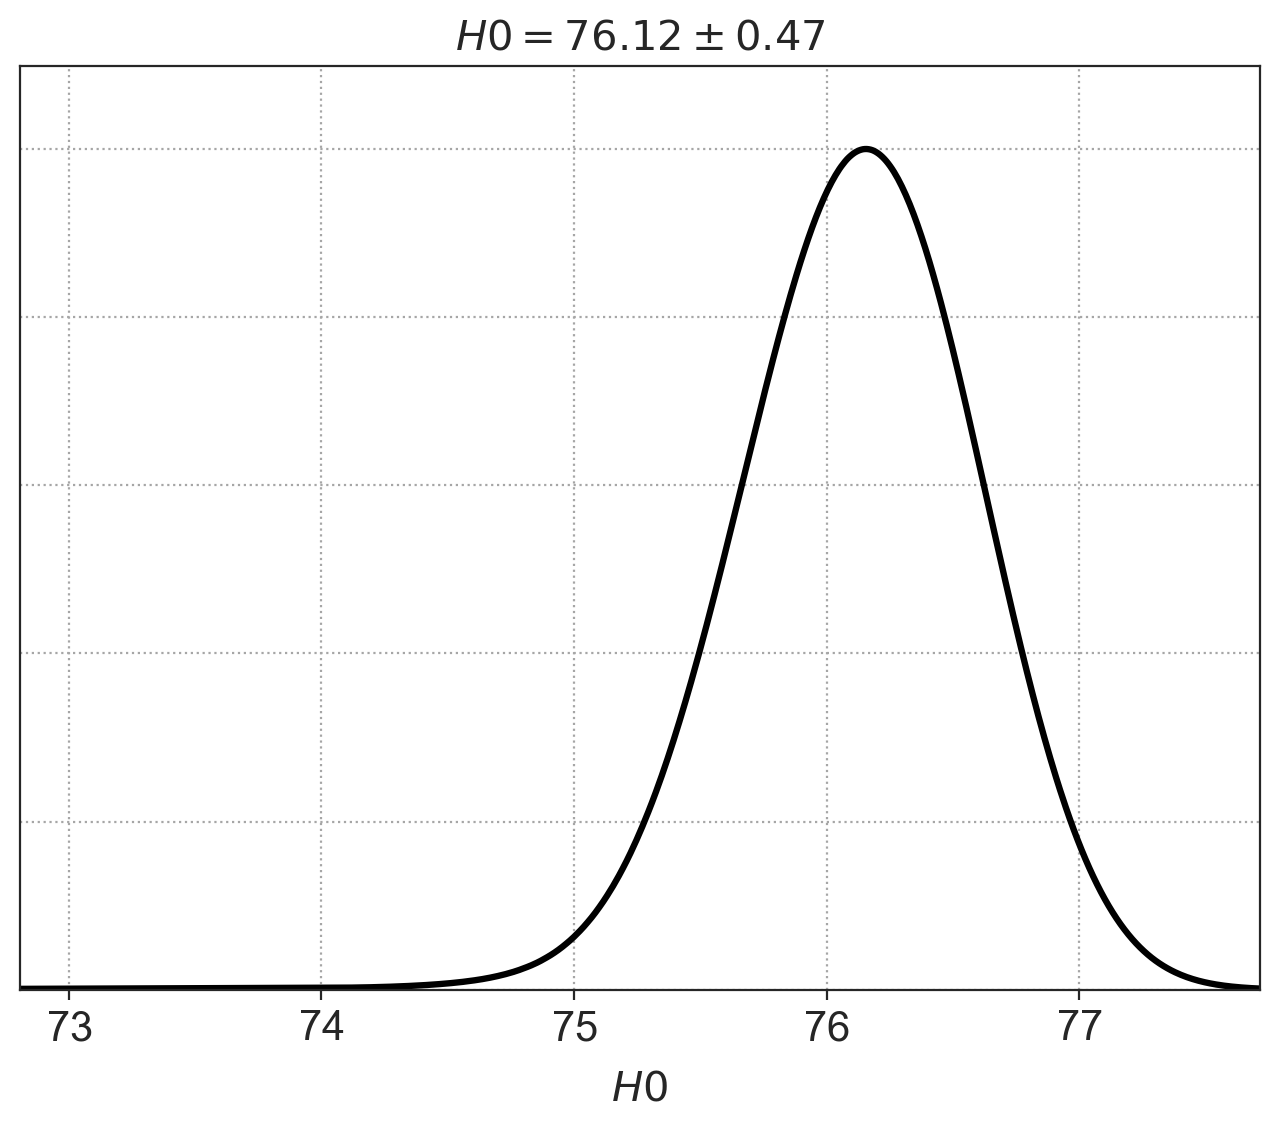

In [100]:
import numpy as np
import pandas as pd
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

# Function to read MCMC chains from CSV files
def read_chains(chain_files):
    chains = []
    for file_name in chain_files:
        chain_i = pd.read_csv(file_name)
        chains.append(chain_i)
    return chains

# Function to calculate statistical error using getdist
def calculate_statistical_error(chains):
    # Convert chains to numpy arrays
    chain_arrays = [chain['H0'].values for chain in chains]

    # Combine all chains into one
    combined_chain = pd.concat(chains, ignore_index=True)

    # Create MCSamples
    samples = MCSamples(samples=[combined_chain['H0'].values], names=['H0'], labels=['H0'])

    # Plot the 1D marginalized parameter distribution
    g = plots.get_single_plotter(width_inch=8)
    g.settings.axes_fontsize = 15
    g.settings.lab_fontsize = 15
    g.settings.title_limit_fontsize = 15
    plt.grid(visible=True, which='both', color='0.65', linestyle=':')
    g.plot_1d(samples, 'H0', title_limit=1)

    # Calculate the mean and standard deviation for the combined chain
    mean_value = np.mean(combined_chain['H0'])
    std_dev = np.std(combined_chain['H0'])

    # Calculate the statistical error (standard deviation of the mean)
    statistical_error = std_dev / np.sqrt(len(combined_chain))

    return mean_value, statistical_error

# Main function
def main():
    chain_files = ['mcmc_chain_only_H0.csv',
                   'mcmc_chain_only_H0_spiralsinFP.csv',
                   'mcmc_chain_only_H0_corr_sigma_to_sdss.csv',
                   'mcmc_chain_only_H0_z_0034.csv',
                   'mcmc_chain_only_H0_z_001.csv',
                   'mcmc_chain_only_H0_zhd.csv'] # 'mcmc_chain_only_H0_no_spirals_anywhere.csv',

    # Read individual chains
    chains = read_chains(chain_files)

    # Calculate statistical error and plot
    mean_value, statistical_error = calculate_statistical_error(chains)
    print(f"Mean Value: {mean_value}")
    print(f"Statistical Error: {statistical_error}")

    # Show the plot
    plt.show()

if __name__ == "__main__":
    main()


In [101]:
x00 = np.sqrt(0.47*0.47 - 0.35*0.35)
print (x00)

0.31368774282716244


In [102]:
y00 = np.sqrt(4.86*4.86 - 0.35*0.35)
print (y00)

4.847380736026416
